# Phần 1. Cài Đặt Cấu Hình

## 1.1 Thêm các thư viện cần thiết

In [1]:
!pip install contractions
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 12.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import re
import string
import math
import os
import warnings
import spacy
import seaborn as sns
from tqdm import tqdm
import spacy
import contractions
from spellchecker import SpellChecker
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize, RegexpTokenizer
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

stop_words_nltk = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")
stop_words_sklearn = ENGLISH_STOP_WORDS
regexp = RegexpTokenizer("[\w']+")
spell = SpellChecker()
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
stemmer = PorterStemmer()
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## 1.2* Kiểm tra lại đường dẫn

In [4]:
!ls /content/drive/MyDrive/DataA
path_root = '/content/drive/MyDrive/DataA'
name_data = 'Womens Clothing E-Commerce Reviews'
path_data = os.path.join(path_root, name_data + '.csv')
path_data_spell_check1 = os.path.join(path_root, name_data + '_SpellChecker1.csv')
path_data_stop_word = os.path.join(path_root, name_data + '_StopWords.csv')
path_data_lemma = os.path.join(path_root, name_data + '_Lemma.csv')
path_data_norm = os.path.join(path_root, name_data + '_Norm.csv')
print(path_data)
print(path_data_spell_check1)
print(path_data_stop_word)
print(path_data_lemma)
print(path_data_norm)


 data_3_exercise.csv		 'Womens Clothing E-Commerce Reviews.csv'
 data_4_exercise.csv		 'Womens Clothing E-Commerce Reviews_Lemma.csv'
 data_4_exercise_lemmatized.csv  'Womens Clothing E-Commerce Reviews_Norm.csv'
 Test.ipynb			 'Womens Clothing E-Commerce Reviews_SpellChecker1.csv'
 Tuan45.ipynb			 'Womens Clothing E-Commerce Reviews_StopWords.csv'
/content/drive/MyDrive/DataA/Womens Clothing E-Commerce Reviews.csv
/content/drive/MyDrive/DataA/Womens Clothing E-Commerce Reviews_SpellChecker1.csv
/content/drive/MyDrive/DataA/Womens Clothing E-Commerce Reviews_StopWords.csv
/content/drive/MyDrive/DataA/Womens Clothing E-Commerce Reviews_Lemma.csv
/content/drive/MyDrive/DataA/Womens Clothing E-Commerce Reviews_Norm.csv


# Phần 2. Tiền Xử Lý Dữ Liệu

## 2.1 Chuẩn bị và giới thiệu dữ liệu

### 2.1.1 Đọc dữ liệu

In [ ]:
df=pd.read_csv(path_data, index_col=0)
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### 2.1.2 Giới thiệu các biến và miền giá trị

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
for column in df.columns:
    # Kiểm tra nếu cột là dạng số (int hoặc float)
    if pd.api.types.is_numeric_dtype(df[column]):
        unique_values = df[column].unique()
        unique_values.sort()
        print(f" -- {column} ({len(unique_values)}): {unique_values}")
    else:
        unique_values = df[column].unique()
        if column not in ['Review Text', 'Title']:
          print(f" -- {column} ({len(unique_values)}): {unique_values}")
        else:
          print(f" -- {column} ({len(unique_values)})")

 -- Clothing ID (1206): [   0    1    2 ... 1203 1204 1205]
 -- Age (77): [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90
 91 92 93 94 99]
 -- Title (13994)
 -- Review Text (22635)
 -- Rating (5): [1 2 3 4 5]
 -- Recommended IND (2): [0 1]
 -- Positive Feedback Count (82): [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  61  64  65  66  68  69  71  77  78  81  82  84
  87  89  93  94  95  98  99 108 117 122]
 -- Division Name (4): ['Initmates' 'General' 'General Petite' nan]
 -- Department Name (7): ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
 -- Class Name (21): ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Kni

In [ ]:
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column   Clothing ID  Age  Title  Review Text  Rating  Recommended IND  \
Unique          1206   77  13994        22635       5                2   
Missing            0    0   3810          845       0                0   

Column   Positive Feedback Count  Division Name  Department Name  Class Name  
Unique                        82              4                7          21  
Missing                        0             14               14          14

Đây là một tập dữ liệu E-Commerce thời trang dành cho phụ nữ xoay quanh các đánh giá được viết bởi khách hàng. Tập dữ liệu này bao gồm 23486 hàng và 10 biến đặc điểm. Mỗi hàng tương ứng với một đánh giá của khách hàng và bao gồm các biến sau:



---




**Clothing ID**: Đây là một biến số nguyên phân loại, tham chiếu đến một món đồ cụ thể đang được đánh giá. Có 1206 món đồ [0 ... 1205]

**Age**: Đây là một biến số nguyên dương, biểu thị độ tuổi của người đánh giá. Có 77 độ tuổi [18 ... 99]

**Title**: Đây là một biến chuỗi, chứa tiêu đề của đánh giá. *Missing Value : 3810*

**Review Text**: Đây là một biến chuỗi, chứa nội dung của đánh giá. *Missing Value : 845*

**Rating**: Đây là một biến số nguyên xếp loại dương, thể hiện điểm số sản phẩm được đánh giá bởi khách hàng từ 1 (Tệ nhất) đến 5 (Tốt nhất).

**Recommended IND**: Đây là một biến nhị phân, chỉ ra liệu khách hàng có khuyến nghị sản phẩm không, với 1 là khuyến nghị và 0 là không khuyến nghị.

**Positive Feedback Count**: Đây là một biến số nguyên dương, ghi lại số lượng khách hàng khác đã tìm thấy đánh giá này tích cực. [0 ... 82]

**Division Name**: Đây là một biến phân loại, chỉ tên phân loại cao cấp của sản phẩm. ['Initmates' 'General' 'General Petite' nan], *Missing Value : 14*

**Department Name**: Đây là một biến phân loại, chỉ tên phòng ban của sản phẩm. ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan], *Missing Value : 14*

**Class Name**: Đây là một biến phân loại, chỉ tên lớp của sản phẩm. ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises'] . *Missing Value : 14*



## 2.2 Xử Lý Dữ Liệu

### 2.2.1 Loại bỏ dữ liệu thiếu và trùng lặp

In [ ]:
df_nonull = df.copy()
df_nonull.dropna(inplace=True)
df_nonull.drop_duplicates(inplace = True)
df_nonull.reset_index(drop = True, inplace = True)

df_clean = df_nonull.copy()


In [ ]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


### 2.2.2 Kiểm tra các ký tự đặc biệt có trong cột Tittle và Review Text

In [ ]:
# Đếm số ký tự character xuất hiện liên tục trong chuỗi
def count_consecutive_occurrences(input_string, character):
    consecutive_count = 0
    max_consecutive_count = 0
    for char in input_string:
        if char == character:
            consecutive_count += 1
            max_consecutive_count = max(max_consecutive_count, consecutive_count)
        else:
            consecutive_count = 0
    return max_consecutive_count

# Đếm các trường hợp số ký tự đặc biệt xuất hiện trong chuỗi
def count_consecutive_character_in_column(dataset, column_name, character):
    consecutive_count = {}
    for input_string in dataset[column_name]:
        if character in input_string:
          count_ch = count_consecutive_occurrences(input_string, character)
          if str(count_ch) in consecutive_count:
            consecutive_count[str(count_ch)] += 1
          else:
            consecutive_count[str(count_ch)] = 1
          if count_ch >2:
            #print(input_string)
            pass
    return consecutive_count

def find_non_alphanumeric_characters_in_dataset(dataset, name_col):
    non_alphanumeric_characters_set = set()
    for input_string in dataset[name_col]:
        for char in input_string:
            if not char.isalnum():
                non_alphanumeric_characters_set.add(char)
    return non_alphanumeric_characters_set

symbols = find_non_alphanumeric_characters_in_dataset(df_nonull, 'Title')
print(symbols)

symbols = find_non_alphanumeric_characters_in_dataset(df_nonull, 'Review Text')
print(symbols)

print(count_consecutive_character_in_column(df_nonull, 'Title', "'"))


{'>', '<', '*', ';', ' ', '.', '-', '=', '$', '|', ',', '/', '?', '(', '~', ')', '`', '{', '"', '!', '&', ':', "'", '#', '}', '+', '%'}
{'¨', '>', '<', '\n', '*', ';', ' ', ']', '.', '©', '-', '=', '$', ',', '[', '_', '\\', '/', '?', '\r', '(', '~', ')', '`', '@', '{', '"', '!', '&', ':', "'", '#', '+', '%', '\xa0'}
{'1': 489}


### 2.2.3 Chuyển đổi chữ hoa thành chữ thường (Lowercase the reviews)

In [ ]:
df_clean['Title']=df_clean['Title'].apply(lambda x: x.lower())
df_clean['Review Text']=df_clean['Review Text'].apply(lambda x: x.lower())

### 2.2.4 Xóa các khoảng trắng (Removal of Whitespaces)

In [ ]:
df_clean['Title']=df_clean['Title'].apply(lambda x: x.strip())
df_clean['Review Text']=df_clean['Review Text'].apply(lambda x: x.strip())

### 2.2.5 Xóa các dấu câu (Removal of Punctuations)

In [ ]:
# Giữ lại dấu ' để xử lý sau
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")
    text = text.translate(str.maketrans("", "", punct_str))
    text = re.sub('\n' , '', text)
    text = re.sub('\[.*?\]', '', text)
    return text

df_clean['Title']=df_clean['Title'].apply(lambda x: remove_punctuation(x))
df_clean['Review Text']=df_clean['Review Text'].apply(lambda x: remove_punctuation(x))

### 2.2.7 Xóa các liên kết trang web

In [ ]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def remove_http(text):
    http = "https?://\S+|www\.\S+"
    pattern = r"({})".format(http)
    return re.sub(pattern, "", text)


df_clean['Title']=df_clean['Title'].apply(lambda x: remove_html(x))
df_clean['Review Text']=df_clean['Review Text'].apply(lambda x: remove_html(x))
df_clean['Title']=df_clean['Title'].apply(lambda x: remove_http(x))
df_clean['Review Text']=df_clean['Review Text'].apply(lambda x: remove_http(x))

### 2.2.8 Sửa lỗi chính tả (Spell Checker)

2.2.8.1 * (Nếu chạy lần đầu thì phải chạy Spell Checker trước )

In [ ]:
def spellchecker_with_progress(df, input_column, output_column):
    progress_bar = tqdm(total=len(df), desc="Processing", position=0)

    def spellchecker(text):
      nonlocal progress_bar
      word_list = regexp.tokenize(text)
      word_list_corrected = []
      for word in word_list:
          if word in spell.unknown(word_list):
              word_corrected = spell.correction(word)
              if word_corrected == None:
                  word_list_corrected.append(word)
              else:
                  word_list_corrected.append(word_corrected)
          else:
              word_list_corrected.append(word)
      text_corrected = " ".join(word_list_corrected)
      progress_bar.update(1)
      return text_corrected

    df[output_column] = df[input_column].apply(spellchecker)
    progress_bar.close()
    return df

print("Kiểm tra chính tả cột Title")
df_clean = spellchecker_with_progress(df_clean, 'Title', 'Title')

print("Kiểm tra chính tả cột Review Text")
df_clean = spellchecker_with_progress(df_clean, 'Review Text', 'Review Text')

df_clean.to_csv(path_data_spell_check1, index=False)

Kiểm tra chính tả cột Title


Processing: 100%|██████████| 19662/19662 [10:15<00:00, 31.93it/s]


Kiểm tra chính tả cột Review Text


Processing: 100%|██████████| 19662/19662 [2:28:59<00:00,  2.20it/s]


2.2.8.2 Nếu đã có tập dữ liệu Speel Checker thì chạy lệnh sau

In [ ]:
df_spell = pd.read_csv(path_data_spell_check1)
df_spell.head()

Clothing ID  Age                    Title  \
0         1077   60  some major design flaws   
1         1049   50          my favorite buy   
2          847   47         flattering shirt   
3         1080   49  not for the very petite   
4          858   39     charcoal shimmer fun   

                                         Review Text  Rating  Recommended IND  \
0  i had such high hopes for this dress and reall...       3                0   
1  i love love love this jumpsuit it's fun flirty...       5                1   
2  this shirt is very flattering to all due to th...       5                1   
3  i love track geese dresses but this one is not...       2                0   
4  i add this in my basket at the last minute to ...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0         General         Dresses    Dresses  
1                        0  General Petite         Bottoms      Pants  
2                        6         General            Tops    Blouses  
3                        4         General         Dresses    Dresses  
4                        1  General Petite            Tops      Knits

### 2.2.9 Mở rộng từ viết tắt (Expand contractions)

In [ ]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have", "a'ight":"alright", "amn't":"am not", "daren't":"dare not", "daresn't":"dare not",
                     "dasn't":"dare not", "everybody's":"everybody is", "everyone's":"everyone is",
                     "giv'n":"given", "gonna":"going to", "gon't":"go not",  "gotta":"got to",
                     "had've":"had have", "he's":"he is", "here's":"here is", "how're":"how are",
                     "how's":"how is", "I'd'nt":"I would not", "I'd'nt've":"I would not have",
                     "it's":"it is", "may've":"may have", "she's":"she is", "somebody's":"somebody is",
                     "someone's":"someone is", "something's":"something is", "so're":"so are",
                     "so’s":"so is", "so’ve":"so have", "that'll":"that will",
                     "that're":"that are", "that's":"that is", "there'll":"there will",
                     "there're":"there are", "there's":"there is", "these're":"these are",
                     "these've":"these have", "this's":"this is", "those're":"those are",
                     "those've":"those have", "what'd":"what did", "what's":"what is",
                     "when's":"when is", "where'll":"where will", "where're":"where are",
                     "where's":"where is", "which'd":"which would", "which'll":"which will",
                     "which're":"which are", "which's":"which is", "which've":"which have",
                     "who'd":"who would", "who'd've":"who would have", "who're":"who are",
                     "who's":"who is", "why'd":"why did", "why're":"why are", "why's":"why is", "y'at":"you at",
                     "yes’m":"yes madam", "dind't": "did not", "wish'd": "wished", "cannot'": "can not"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)


df_spell['Title'] = df_spell['Title'].apply(lambda x:contractions.fix(x))
df_spell['Title'] = df_spell['Title'].apply(lambda x:expand_contractions(x))
df_spell['Review Text'] = df_spell['Review Text'].apply(lambda x:contractions.fix(x))
df_spell['Review Text'] = df_spell['Review Text'].apply(lambda x:expand_contractions(x))

print(count_consecutive_character_in_column(df_spell, 'Title', "'"))
print(count_consecutive_character_in_column(df_spell, 'Review Text', "'"))

Processing:  43%|████▎     | 8551/19662 [2:54:12<3:46:21,  1.22s/it]


{'1': 2}
{'1': 3524, '2': 111}


### 2.2.10 Loại bỏ từ dừng (Removal of Stop Words)

In [ ]:
def remove_stopword_with_progress(df, input_column, output_column):
    progress_bar = tqdm(total=len(df), desc="Processing", position=0)

    def remove_stopword(text):
      nonlocal progress_bar
      addstops = {"among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"}
      stop_words_nltk.update(addstops)
      tokens = word_tokenize(text)
      text = " ".join([word for word in tokens if word.lower() not in stop_words_nltk])
      doc = nlp(text)
      text = ' '.join([token.text for token in doc if not token.is_stop])
      tokens = text.split()
      text = ' '.join([word for word in tokens if word.lower() not in stop_words_sklearn])
      progress_bar.update(1)
      return text

    df[output_column] = df[input_column].apply(remove_stopword)
    progress_bar.close()
    return df

print("Xóa từ dừng cột Title")
df_spell = remove_stopword_with_progress(df_spell, 'Title', 'Title')

print("Xóa từ dừng cột Review Text")
df_spell = remove_stopword_with_progress(df_spell, 'Review Text', 'Review Text')

df_spell.to_csv(path_data_stop_word, index=False)

Xóa từ dừng cột Title


Processing: 100%|██████████| 19662/19662 [02:09<00:00, 151.73it/s]


Xóa từ dừng cột Review Text


Processing: 100%|██████████| 19662/19662 [03:48<00:00, 86.16it/s]


### 2.2.11 Cắt ngắn từ và chuẩn hóa từ (Stemming and Lemmatization)

#### ** Đọc lại tập dữ liệu đã tách từ dừng

In [ ]:
df_lemma = pd.read_csv(path_data_stop_word)
df_lemma.dropna(inplace=True)
df_lemma.drop_duplicates(inplace = True)
df_lemma.reset_index(drop = True, inplace = True)
df_lemma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19428 entries, 0 to 19427
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19428 non-null  int64 
 1   Age                      19428 non-null  int64 
 2   Title                    19428 non-null  object
 3   Review Text              19428 non-null  object
 4   Rating                   19428 non-null  int64 
 5   Recommended IND          19428 non-null  int64 
 6   Positive Feedback Count  19428 non-null  int64 
 7   Division Name            19428 non-null  object
 8   Department Name          19428 non-null  object
 9   Class Name               19428 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


#### Stemming and Lemmatization

In [ ]:
def stem_lemmatize_with_progress(df, input_column, output_column):
    # Khởi tạo thanh tiến độ
    progress_bar = tqdm(total=len(df), desc="Processing", position=0)

    def stem_lemmatize_text(text):
        nonlocal progress_bar
        # Cập nhật thanh tiến độ
        text = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
        text = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
        progress_bar.update(1)
        return text

    # Thêm cột mới vào DataFrame để lưu kết quả
    df[output_column] = df[input_column].apply(stem_lemmatize_text)

    # Đóng thanh tiến độ
    progress_bar.close()

    return df

print("Stemming and Lemmatization Title")
df_lemma = stem_lemmatize_with_progress(df_lemma, 'Title', 'Title_lemmatized')
print("Stemming and Lemmatization Review Text")
df_lemma = stem_lemmatize_with_progress(df_lemma, 'Review Text', 'Review Text_lemmatized')

df_lemma.to_csv(path_data_lemma, index=False)

Stemming and Lemmatization Title


Processing: 100%|██████████| 19428/19428 [01:09<00:00, 279.15it/s]


Stemming and Lemmatization Review Text


Processing: 100%|██████████| 19428/19428 [02:04<00:00, 156.51it/s]


### 2.2.12 Xóa số và các từ chứa số (Remove digits and words containing digits)

In [ ]:
df_norm = pd.read_csv(path_data_lemma)
df_norm['Title_lemmatized']=df_norm['Title_lemmatized'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_norm['Review Text_lemmatized']=df_norm['Review Text_lemmatized'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_norm['Title']=df_norm['Title'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_norm['Review Text']=df_norm['Review Text'].apply(lambda x: re.sub('\w*\d\w*','', x))

### 2.2.13 Loại bỏ các từ không quan trọng (Retainment of Relevant Parts of Speech)

In [ ]:
def RRPOS_process(df, input_column, output_column):
    # Khởi tạo thanh tiến độ
    progress_bar = tqdm(total=len(df), desc="Processing", position=0)

    def RRPOS(text):
        nonlocal progress_bar
        tokens = regexp.tokenize(text)
        tokens_tagged = nltk.pos_tag(tokens)
        #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
        keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
        keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
        progress_bar.update(1)
        return " ".join(keep_words)

    # Thêm cột mới vào DataFrame để lưu kết quả
    df[output_column] = df[input_column].apply(RRPOS)

    # Đóng thanh tiến độ
    progress_bar.close()

    return df

print("Retainment of Relevant Parts of Speech Title")
df_norm = RRPOS_process(df_norm, 'Title_lemmatized', 'Title_lemmatized')
print("Retainment of Relevant Parts of Speech Review Text")
df_norm = RRPOS_process(df_norm, 'Review Text_lemmatized', 'Review Text_lemmatized')


Retainment of Relevant Parts of Speech Title


Processing: 100%|██████████| 19428/19428 [00:05<00:00, 3541.89it/s]


Retainment of Relevant Parts of Speech Review Text


Processing: 100%|██████████| 19428/19428 [00:45<00:00, 424.89it/s]


### 2.2.14 Loại bỏ các từ dừng còn sót lại

In [ ]:
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

df_norm['Title_lemmatized']=df_norm['Title_lemmatized'].apply(lambda x: remove_additional_stopwords(x))
df_norm['Review Text_lemmatized']=df_norm['Review Text_lemmatized'].apply(lambda x: remove_additional_stopwords(x))
df_norm['Title']=df_norm['Title'].apply(lambda x: remove_additional_stopwords(x))
df_norm['Review Text']=df_norm['Review Text'].apply(lambda x: remove_additional_stopwords(x))

### 2.2.15 Loại bỏ ký tự đặc biệt còn sót lại

In [ ]:
# xóa các khoảng trắng thừa liên tiếp
def remove_extra_spaces(input_string):
    cleaned_string = ''
    previous_char_is_space = False
    for char in input_string:
        if char != ' ':
            cleaned_string += char
            previous_char_is_space = False
        else:
            if not previous_char_is_space:
                cleaned_string += char
            previous_char_is_space = True
    return cleaned_string

#xóa ký tự tự đặc biệt chỉ định trong 1 chuỗi
def remove_special_characters(input_string, special_characters):
    cleaned_string = ''.join(char for char in input_string if char not in special_characters)
    return remove_extra_spaces(cleaned_string)

# Xóa ký tự đặc biệt trong 1 cột của dataframe
def remove_special_characters_from_column(df, column_name, special_characters):
    df_new = df.copy()
    df_new[column_name] = df_new[column_name].apply(lambda x: remove_special_characters(x, special_characters))
    return df_new

special_characters = '!@#$%^&*()_+={}[]:;<>,./?~-""|`\\"' + "'"

df_norm = remove_special_characters_from_column(df_norm, 'Title', special_characters)
df_norm = remove_special_characters_from_column(df_norm, 'Title_lemmatized', special_characters)
df_norm = remove_special_characters_from_column(df_norm, 'Review Text', special_characters)
df_norm = remove_special_characters_from_column(df_norm, 'Review Text_lemmatized', special_characters)
df_norm.dropna(inplace=True)
df_norm.drop_duplicates(inplace = True)
df_norm.reset_index(drop = True, inplace = True)


symbols1 = find_non_alphanumeric_characters_in_dataset(df_norm, 'Title_lemmatized')
print(symbols1)

symbols2 = find_non_alphanumeric_characters_in_dataset(df_norm, 'Review Text_lemmatized')
print(symbols2)



{' '}
{' '}


### 2.2.16 Thêm các cột phân loại cho data (Sentiment Analysis)

In [ ]:
df_norm["Review Text_lemmatized"]= df_norm["Review Text_lemmatized"].astype(str)

# Word Length
df_norm["Word Count"] = df_norm['Review Text_lemmatized'].str.split().apply(len)
# Character Length
df_norm["Character Count"] = df_norm['Review Text_lemmatized'].apply(len)

df_norm['Polarity']=df_norm["Review Text_lemmatized"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df_norm['Neutral']=df_norm["Review Text_lemmatized"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df_norm['Negative']=df_norm["Review Text_lemmatized"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df_norm['Positive']=df_norm["Review Text_lemmatized"].apply(lambda x:SIA.polarity_scores(x)['pos'])

df_norm['Sentiment'] = ''
conditions = [
    (df_norm['Polarity'] > 0),
    (df_norm['Polarity'] == 0),
    (df_norm['Polarity'] < 0)
]
choices = ['Positive', 'Neutral', 'Negative']
df_norm['Sentiment'] = np.select(conditions, choices, default='')

df_norm.to_csv(path_data_norm, index=False)

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19428 entries, 0 to 19427
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19428 non-null  int64 
 1   Age                      19428 non-null  int64 
 2   Title                    19428 non-null  object
 3   Review Text              19428 non-null  object
 4   Rating                   19428 non-null  int64 
 5   Recommended IND          19428 non-null  int64 
 6   Positive Feedback Count  19428 non-null  int64 
 7   Division Name            19428 non-null  object
 8   Department Name          19428 non-null  object
 9   Class Name               19428 non-null  object
 10  Title_lemmatized         19428 non-null  object
 11  Review Text_lemmatized   19428 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.8+ MB


## 2.3* Tổng kết các bộ dữ liệu sau khi xử lý

In [5]:
# Tập dữ liệu ban đầu (df)
df=pd.read_csv(path_data, index_col=0)

# Tập dữ liệu không có null (df_nonull)
df_nonull = df.copy()
df_nonull.dropna(inplace=True)
df_nonull.drop_duplicates(inplace = True)
df_nonull.reset_index(drop = True, inplace = True)

# Tập dữ liệu chỉ loại bỏ các giá trị thiếu ở 3 cột:  Division Name, Department Name, Class Name
df_no14null = df.copy()
df_no14null.dropna(subset=['Division Name', 'Department Name', 'Class Name', 'Review Text'], inplace=True)
df_no14null.drop_duplicates(inplace = True)
df_no14null.reset_index(drop = True, inplace = True)
# Word Length
df_no14null["Word Count"] = df_no14null['Review Text'].str.split().apply(len)
# Character Length
df_no14null["Character Count"] = df_no14null['Review Text'].apply(len)

# Tập dữ liệu đã chuẩn hóa (df_norm)
df_norm=pd.read_csv(path_data_norm)

# Phần 3. Thống Kê Dữ Liệu

## 3.1 Phân tích thống kê đơn biến

### 3.1.1* Các hàm có liên quan trong phân tích thông kê đơn biến

In [19]:
# Định nghĩa hàm để vẽ biểu đồ và tính độ lệch của cột dữ liệu
def plot_distribution(data, col):

    # Tạo DataFrame để lưu thông tin về độ lệch của các cột dữ liệu
    columns = ['Column', 'Skewness']
    distribution_info = pd.DataFrame(columns=columns)

    # Tính độ lệch của cột dữ liệu và làm tròn đến 2 chữ số thập phân
    skewness = round(data[col].skew(), 2)
    plt.figure(figsize=(15, 4))

    # Vẽ biểu đồ histogram ở ô đầu tiên của lưới 1x2
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')

    # Vẽ biểu đồ boxplot ở ô thứ hai của lưới 1x2
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()
    return distribution_info.append({'Column': col, 'Skewness': skewness}, ignore_index=True)


def plot_categorical_count(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Cột '{column_name}' không tồn tại trong DataFrame.")
    df_sorted = df[column_name].value_counts().reset_index()
    df_sorted.columns = [column_name, 'Count']
    df_sorted = df_sorted.sort_values(by='Count', ascending=False)
    percentages = (df_sorted['Count'] / len(df)) * 100
    plt.figure(figsize=(8, 6))
    if len(df[column_name].unique()) <= 10:
        sns.countplot(data=df, x=column_name, order=df_sorted[column_name], palette='pastel')
        plt.title(f'Số lượng giá trị theo từng {column_name}')
        for i, (index, row) in enumerate(df_sorted.iterrows()):
            plt.text(i, row['Count'] + 0.1, f'{percentages[index]:.1f}%', ha='center', va='bottom', fontsize=8)
    else:
        ax = df_sorted.plot(kind='bar', x=column_name, y='Count', color='skyblue', legend=None)
        plt.title(f'Số lượng giá trị theo từng {column_name}')
        for i, (index, row) in enumerate(df_sorted.iterrows()):
            plt.text(i, row['Count'] + 0.1, f'{percentages[index]:.1f}%', ha='center', va='bottom', fontsize=8)

    plt.xlabel(column_name)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df_sorted['percentages'] = (df_sorted['Count'] / len(df)) * 100
    print(df_sorted)


def get_age_df(df):
  age = df.Age.value_counts().sort_index()
  age_range = [10*i for i in range(1,10)]
  store = []
  age_df = pd.DataFrame(columns=['count','age'])
  for idx,count in enumerate(age_range):
      store.append([age[num] for idx, num in enumerate(age.index) if num >=count and num<=count+9])
  age = [str(num)+' - '+str(num+9) for num in age_range]
  age_df['count'] = [sum(num) for num in store]
  age_df['age'] = age
  return age_df

def plot_age_hist(age_df):
  fig2 = px.bar(x = age_df['age'],
              y = age_df['count'],
              text = age_df['count'], color = age_df['age'],
              template = "simple_white",
              title = 'Các mức tuổi')

  fig2.update_traces(width=0.7)
  idx = [num for num in range(2,5)]
  for index in idx:
      fig2.data[index].marker.line.width = 2
      fig2.data[index].marker.line.color = "black"
  fig2.update_layout(
    xaxis_title="Các độ tuổi",
    yaxis_title="count")
  fig2.show()

### 3.1.2 Thống kê mô tả

In [ ]:
df_no14null.describe().T.drop("count",axis=1)

mean         std   min    25%    50%     75%  \
Clothing ID              919.691386  201.687114   1.0  861.0  936.0  1078.0   
Age                       43.283157   12.328378  18.0   34.0   41.0    52.0   
Rating                     4.183056    1.115923   1.0    4.0    5.0     5.0   
Recommended IND            0.818756    0.385228   0.0    1.0    1.0     1.0   
Positive Feedback Count    2.631900    5.787621   0.0    0.0    1.0     3.0   
Word Count                60.212755   28.533427   2.0   36.0   59.0    88.0   
Character Count          308.765722  143.935928   9.0  186.0  302.0   459.0   

                            max  
Clothing ID              1205.0  
Age                        99.0  
Rating                      5.0  
Recommended IND             1.0  
Positive Feedback Count   122.0  
Word Count                115.0  
Character Count           508.0

### 3.1.3+ Thống kê phân phối các mặt hàng Clothing ID

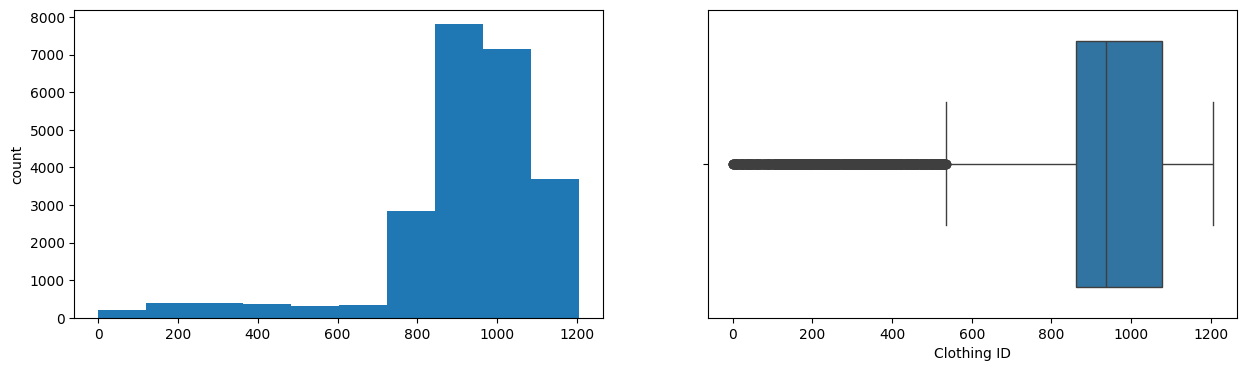

        Column  Skewness
0  Clothing ID     -2.09


In [ ]:
print(plot_distribution(df_no14null, 'Clothing ID'))


**Nhận xét:**

- Số lượng mẫu (count): Có tổng cộng 23,451 mẫu trong cột "Clothing ID".

- Trung bình (mean): Giá trị trung bình của các mẫu là khoảng 919.69.

- Độ lệch chuẩn (std): Độ lệch chuẩn của các mẫu là khoảng 202.79, chỉ ra mức độ biến động của dữ liệu xung quanh giá trị trung bình.

- Phần tư thứ nhất (25%): 25% số mẫu có giá trị nhỏ hơn hoặc bằng 861.

- Median (50%): 50% số mẫu có giá trị nhỏ hơn hoặc bằng 936. Đây là giá trị trung vị, tức là giá trị ở giữa của dữ liệu khi được sắp xếp.

- Phần tư thứ ba (75%): 75% số mẫu có giá trị nhỏ hơn hoặc bằng 1078.

***Từ các thông tin trên, chúng ta có thể nhận thấy:***

- Giá trị trung bình của "Clothing ID" là khoảng 919.69, nhưng độ lệch chuẩn là 201.68, cho thấy sự biến động khá lớn trong phân bố dữ liệu.

- Giá trị trung vị (936) cũng khá gần với giá trị trung bình, cho thấy phân phối của dữ liệu có vẻ không bị lệch nhiều.

- Số lượng các mặt hàng có ID > 730 được bình luận đánh giá nhiều hơn các mặt hàng có ID < 730.  

- Số lượng các mặt hàng có ID nằm trong khoảng từ 861:1078 có lượt đánh giá nhiều vượt trội nhất trong cửa hàng.

**Kết luận**

1. Đối với các sản phẩm có ID vượt quá 730, chủ doanh nghiệp nên thực hiện một đánh giá tổng quan về tỷ lệ mua hàng và phản hồi tích cực từ phía khách hàng. Nếu phát hiện các phản hồi tiêu cực, việc kiểm tra kỹ lưỡng và đưa ra giải pháp phù hợp là cần thiết để bảo đảm chất lượng sản phẩm và sự hài lòng của khách hàng.

2. Trong khi đó, đối với các mặt hàng có ID nhỏ hơn 730, chủ doanh nghiệp cần xem xét việc triển khai các chiến lược quảng bá và khuyến mãi nhằm mở rộng thị trường và thu hút khách hàng mới. Cần chú ý đặc biệt đến việc xử lý sản phẩm cũ kỹ hoặc có vấn đề, nhằm tránh tình trạng tồn kho không mong muốn. Đối với các sản phẩm được đánh giá tích cực, việc nhập hàng một cách có mục đích và hợp lý sẽ giúp tăng cường sự đa dạng của danh mục sản phẩm của doanh nghiệp.

### 3.1.4+ Thống kê phân phối độ tuổi (Age)

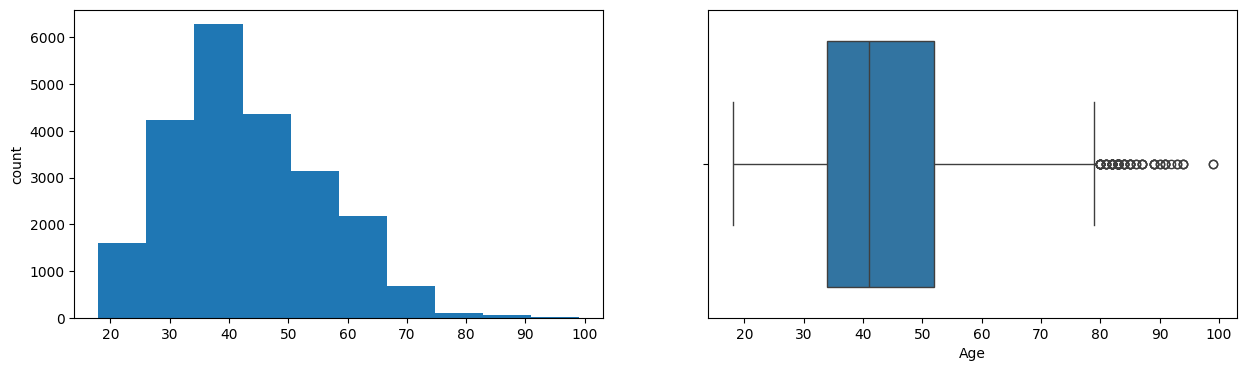

  Column  Skewness
0    Age      0.52


In [ ]:
print(plot_distribution(df_no14null, 'Age'))
age_df = get_age_df(df_no14null)
plot_age_hist(age_df)

**Nhận xét:**

- Số lượng mẫu (count): Có tổng cộng 23,451 mẫu trong cột "Age".

- Trung bình (mean): Tuổi trung bình của các mẫu là khoảng 43.20 tuổi.

- Độ lệch chuẩn (std): Độ lệch chuẩn của các mẫu là khoảng 12.28 tuổi, chỉ ra mức độ biến động của dữ liệu xung quanh giá trị trung bình.

- Giá trị nhỏ nhất (min): Tuổi nhỏ nhất trong dữ liệu là 18 tuổi.

- Phần tư thứ nhất (25%): 25% số mẫu có tuổi nhỏ hơn hoặc bằng 34 tuổi.

- Median (50%): 50% số mẫu có tuổi nhỏ hơn hoặc bằng 41 tuổi. Đây là giá trị trung vị, tức là giá trị ở giữa của dữ liệu khi được sắp xếp.

- Phần tư thứ ba (75%): 75% số mẫu có tuổi nhỏ hơn hoặc bằng 52 tuổi.

- Giá trị lớn nhất (max): Tuổi lớn nhất trong dữ liệu là 99 tuổi.

**Từ các thông tin trên, chúng ta có thể nhận thấy:**

- Phân bố tuổi của các mẫu khá đa dạng từ 18 đến 99 tuổi.

- Tuổi trung bình là khoảng 43 tuổi, nhưng độ lệch chuẩn là 12.28 tuổi, cho thấy sự biến động khá lớn trong phân bố tuổi của dữ liệu.

- Giá trị trung vị (41 tuổi) thấp hơn so với giá trị trung bình (43.20 tuổi), điều này cho thấy rằng phân phối của dữ liệu có thể lệch về bên trái (độ tuổi trung bình bị ảnh hưởng bởi các giá trị cao hơn).

**Kết Luận:**

- Đa dạng tuổi tác của khách hàng: Phân bố tuổi từ 18 đến 99 tuổi cho thấy rằng doanh nghiệp đang tiếp xúc với một đối tượng khách hàng rất đa dạng về độ tuổi. Điều này có thể đòi hỏi doanh nghiệp phải thiết kế và tiếp cận thị trường một cách linh hoạt để đáp ứng nhu cầu của mọi nhóm tuổi khách hàng.

- Độ biến động của phân bố tuổi: Độ lệch chuẩn khá lớn (12.28 tuổi) cho thấy có sự biến động đáng kể trong phân bố tuổi của khách hàng. Điều này có thể yêu cầu doanh nghiệp cần phải tùy chỉnh chiến lược tiếp thị và sản phẩm để phù hợp với các nhóm khách hàng có đặc điểm tuổi tác khác nhau.

- Sự lệch trái của phân phối tuổi: Giá trị trung vị (41 tuổi) thấp hơn so với giá trị trung bình (43.20 tuổi), cho thấy rằng có một số lượng lớn các mẫu có tuổi tác cao hơn so với giá trị trung bình, gây ra hiện tượng lệch trái trong phân phối. Do đó, doanh nghiệp có thể muốn tập trung nhiều hơn vào các phân đoạn khách hàng trung niên và cao tuổi để tối ưu hóa chiến lược tiếp thị và sản phẩm.

- Đa dạng hóa sản phẩm và dịch vụ: Phát triển các sản phẩm và dịch vụ phù hợp với nhu cầu và sở thích của các nhóm tuổi khác nhau.

- Tùy chỉnh chiến lược tiếp thị: Tạo ra các chiến lược tiếp thị linh hoạt và đa dạng để tiếp cận và tương tác với mọi nhóm tuổi khách hàng.

- Nghiên cứu thêm về đặc điểm của các nhóm tuổi: Thực hiện nghiên cứu thêm về các nhóm tuổi khác nhau để hiểu rõ hơn về nhu cầu và mong muốn của họ, từ đó tối ưu hóa sản phẩm và dịch vụ cũng như chiến lược tiếp thị.


--> Những đề xuất và tư vấn trên có thể giúp doanh nghiệp tận dụng được đa dạng tuổi tác của khách hàng và tối ưu hóa chiến lược kinh doanh của mình để đáp ứng nhu cầu của mọi nhóm tuổi khác nhau.

### 3.1.5+ Thống kê phân phối đánh giá (Rating)

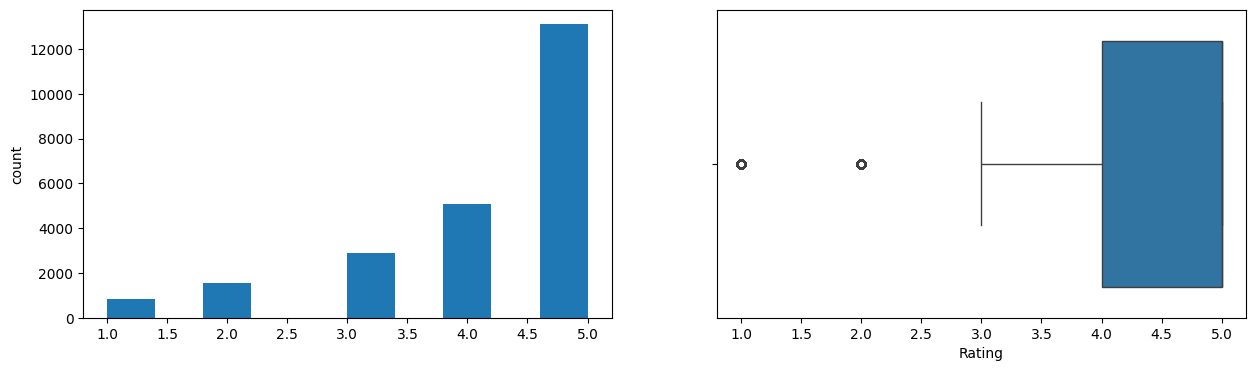

   Column  Skewness
0  Rating     -1.31


In [ ]:
print(plot_distribution(df_no14null, 'Rating'))

**Nhận Xét:**

- Số lượng mẫu (count): Có tổng cộng 23,451 mẫu trong cột "Rating".

- Trung bình (mean): Điểm số trung bình của các mẫu là khoảng 4.19.

- Độ lệch chuẩn (std): Độ lệch chuẩn của các mẫu là khoảng 1.11, chỉ ra mức độ biến động của dữ liệu xung quanh giá trị trung bình.

- Phần tư thứ nhất (25%): 25% số mẫu có điểm số nhỏ hơn hoặc bằng 4.

- Median (50%): 50% số mẫu có điểm số nhỏ hơn hoặc bằng 5. Đây là giá trị trung vị, tức là giá trị ở giữa của dữ liệu khi được sắp xếp.

- Phần tư thứ ba (75%): 75% số mẫu có điểm số nhỏ hơn hoặc bằng 5.


**Từ các thông tin trên, chúng ta có thể nhận thấy:**

- Điểm số trung bình là khoảng 4.19, có vẻ như đa số các mẫu đều nhận được điểm cao (gần 5).
- Độ lệch chuẩn là khoảng 1.11, cho thấy sự biến động khá nhỏ trong phân bố điểm số của dữ liệu.


**Kết luận**

- Phân phối điểm số chủ yếu ở mức cao: Với điểm số trung bình là 4.19 và phần tư thứ ba cũng như median đều là 5, có vẻ như đa số các mẫu đều nhận được điểm cao. Điều này có thể chỉ ra rằng sản phẩm của doanh nghiệp thường được khách hàng đánh giá cao và có sự hài lòng cao từ phía người tiêu dùng.

- Độ biến động của phân bố điểm số: Độ lệch chuẩn khá nhỏ (1.11), cho thấy sự biến động trong phân bố điểm số không quá lớn. Điều này có thể cho thấy rằng sản phẩm của doanh nghiệp nhận được mức độ đồng nhất trong các đánh giá từ khách hàng.

- Tiếp tục duy trì chất lượng sản phẩm: Do sản phẩm của doanh nghiệp đã nhận được các đánh giá tích cực từ phía khách hàng, doanh nghiệp nên tiếp tục duy trì và nâng cao chất lượng sản phẩm để giữ vững sự hài lòng của khách hàng.

- Tăng cường thu thập ý kiến từ khách hàng: Mặc dù điểm số trung bình cao, nhưng vẫn cần tiếp tục lắng nghe ý kiến phản hồi từ khách hàng để hiểu rõ hơn về những yếu điểm của sản phẩm hoặc dịch vụ, từ đó cải thiện và phát triển chất lượng hơn.

- Chú trọng vào việc xây dựng thương hiệu và danh tiếng: Được đánh giá cao có thể giúp doanh nghiệp xây dựng một hình ảnh tích cực trong tâm trí của khách hàng và tạo ra một lợi thế cạnh tranh trong ngành thời trang.

- Những đề xuất và tư vấn trên có thể giúp doanh nghiệp duy trì và tăng cường sự thành công của mình trên thị trường bằng cách tối ưu hóa chất lượng sản phẩm và mối quan hệ với khách hàng.


### 3.1.6+ Thống kê phân phối khuyến nghị (Recommended IND)

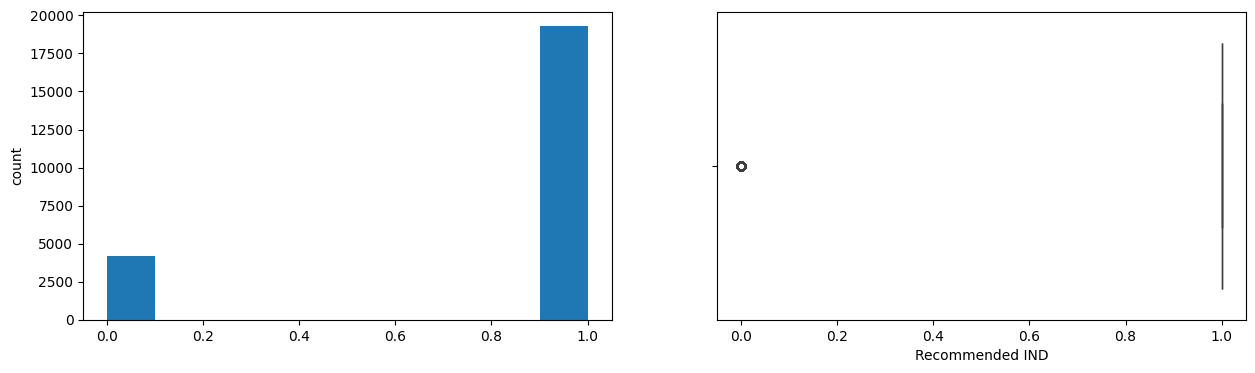

            Column  Skewness
0  Recommended IND     -1.68


In [ ]:
print(plot_distribution(df_no14null, 'Recommended IND'))

**Nhận xét:**

- Số lượng mẫu (count): Có tổng cộng 23,451 mẫu trong cột "Recommended IND".

- Trung bình (mean): Giá trị trung bình của các mẫu là khoảng 0.82.

- Độ lệch chuẩn (std): Độ lệch chuẩn của các mẫu là khoảng 0.38, chỉ ra mức độ biến động của dữ liệu xung quanh giá trị trung bình.

- Phần tư thứ nhất (25%): 25% số mẫu có giá trị nhỏ hơn hoặc bằng 1.

- Median (50%): 50% số mẫu có giá trị nhỏ hơn hoặc bằng 1. Đây là giá trị trung vị, tức là giá trị ở giữa của dữ liệu khi được sắp xếp.

- Phần tư thứ ba (75%): 75% số mẫu có giá trị nhỏ hơn hoặc bằng 1.

**Từ các thông tin trên, chúng ta có thể nhận thấy:**

- Cột "Recommended IND" có giá trị chỉ nhận 0 hoặc 1, có thể đại diện cho việc liệu người dùng có đề xuất sản phẩm cho người khác không (1 là đề xuất, 0 là không đề xuất).
- Đa số mẫu trong dữ liệu có giá trị là 1, chỉ ra rằng có một phần lớn người dùng đã đề xuất sản phẩm cho người khác.
- Độ lệch chuẩn là khá thấp, chỉ ra rằng dữ liệu có sự biến động nhỏ quanh giá trị trung bình, đồng nghĩa với việc phần lớn mẫu có giá trị gần bằng nhau.

**Kết luận**

- Đa số người dùng đề xuất sản phẩm: Với phần lớn mẫu trong dữ liệu có giá trị là 1, tức là người dùng đã đề xuất sản phẩm cho người khác, doanh nghiệp có thể tin rằng sản phẩm của họ nhận được sự ủng hộ và khuyến nghị từ phía người dùng.

- Sự đồng đều trong quan điểm của người dùng: Độ lệch chuẩn thấp cho thấy có sự đồng nhất trong quan điểm của người dùng về việc đề xuất sản phẩm cho người khác. Điều này có thể là một dấu hiệu tích cực về sự phù hợp và chất lượng của sản phẩm.

- Tiếp tục tối ưu hóa sản phẩm và dịch vụ: Với sự ủng hộ và khuyến nghị từ phía người dùng, doanh nghiệp nên tiếp tục tối ưu hóa sản phẩm và dịch vụ để duy trì và nâng cao sự hài lòng của khách hàng.

- Tận dụng phản hồi tích cực từ khách hàng: Sử dụng những đánh giá và phản hồi tích cực từ khách hàng để cải thiện chiến lược tiếp thị và phát triển sản phẩm, từ đó tạo ra một môi trường kinh doanh tích cực.

- Xây dựng một cộng đồng hỗ trợ: Khuyến khích sự tương tác và chia sẻ từ phía cộng đồng người dùng để tạo ra một môi trường hỗ trợ và thúc đẩy sự phát triển của thương hiệu.

-->Những đề xuất và kết luận trên có thể giúp doanh nghiệp tận dụng sự ủng hộ và khuyến nghị từ phía người dùng để phát triển và mở rộng thị trường của mình.

### 3.1.7+ Thống kê phân phối feedback (Positive Feedback Count)

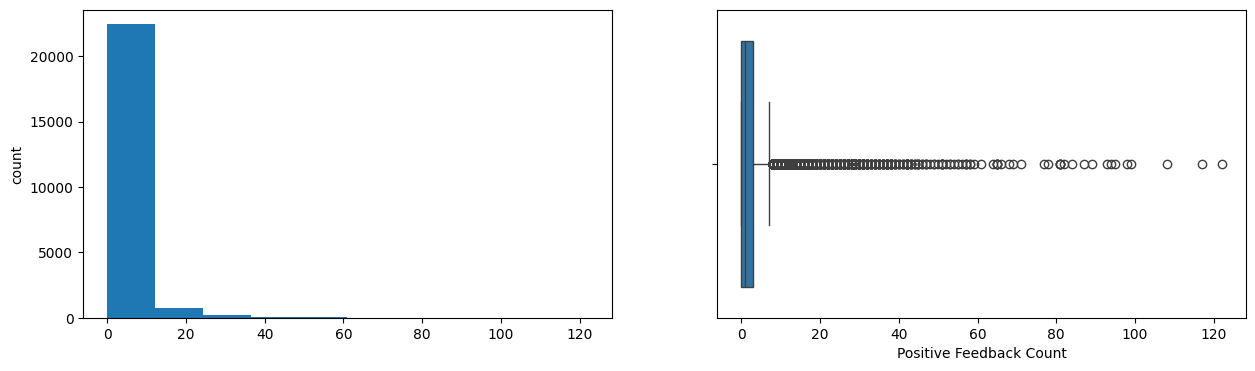

                    Column  Skewness
0  Positive Feedback Count      6.47


In [ ]:
print(plot_distribution(df_no14null, 'Positive Feedback Count'))

**Nhận xét:**

- Số lượng mẫu (count): Có tổng cộng 23,451 mẫu trong cột "Positive Feedback Count".

- Trung bình (mean): Số lượng feedback tích cực trung bình của các mẫu là khoảng 2.54.

- Độ lệch chuẩn (std): Độ lệch chuẩn của các mẫu là khoảng 5.71, chỉ ra mức độ biến động của dữ liệu xung quanh giá trị trung bình.

- Giá trị nhỏ nhất (min): Số lượng feedback tích cực nhỏ nhất trong dữ liệu là 0.

- Phần tư thứ nhất (25%): 25% số mẫu có số lượng feedback tích cực nhỏ hơn hoặc bằng 0.

- Median (50%): 50% số mẫu có số lượng feedback tích cực nhỏ hơn hoặc bằng 1. Đây là giá trị trung vị, tức là giá trị ở giữa của dữ liệu khi được sắp xếp.

- Phần tư thứ ba (75%): 75% số mẫu có số lượng feedback tích cực nhỏ hơn hoặc bằng 3.

- Giá trị lớn nhất (max): Số lượng feedback tích cực lớn nhất trong dữ liệu là 122.

**Từ các thông tin trên, chúng ta có thể nhận thấy:**

- Số lượng feedback tích cực của các mẫu trong dữ liệu phân bố khá rộng, từ 0 đến 122.
- Độ lệch chuẩn là khá cao, cho thấy sự biến động lớn trong số lượng feedback tích cực của các mẫu.
- Phần lớn số lượng feedback tích cực của mẫu tập trung vào nhóm giá trị thấp, với median (50%) chỉ là 1.
- Số lượng feedback tích cực trung bình (mean) là khoảng 2.54, nhưng có thể bị ảnh hưởng bởi các giá trị ngoại lệ (như max = 122).

**Kết luận**

- Biến động lớn trong số lượng feedback tích cực: Số lượng feedback tích cực của các mẫu trong dữ liệu phân bố khá rộng, từ 0 đến 122, với độ lệch chuẩn cao (5.71). Điều này cho thấy rằng có sự biến động lớn trong số lượng feedback tích cực của các mẫu, có thể phản ánh sự đa dạng trong cách khách hàng tương tác và phản hồi với sản phẩm.

- Tập trung vào nhóm giá trị thấp: Phần lớn số lượng feedback tích cực của mẫu tập trung vào nhóm giá trị thấp, với median chỉ là 1. Điều này có thể chỉ ra rằng có một phần lớn khách hàng chỉ đưa ra một số ít hoặc không có phản hồi tích cực.

- Cẩn trọng với các giá trị ngoại lệ: Số lượng feedback tích cực trung bình (mean) là 2.54, nhưng có thể bị ảnh hưởng bởi các giá trị ngoại lệ như max = 122. Do đó, cần cẩn trọng khi đánh giá và sử dụng mean để đại diện cho số lượng feedback tích cực trung bình.

- Tăng cường thu thập phản hồi từ khách hàng: Tạo điều kiện thuận lợi để khách hàng có thể dễ dàng đưa ra phản hồi và đánh giá về sản phẩm, từ đó cung cấp thông tin chi tiết và đa dạng hơn để doanh nghiệp có thể cải thiện sản phẩm và dịch vụ.

- Tối ưu hóa chiến lược tiếp thị dựa trên phản hồi khách hàng: Sử dụng phản hồi từ khách hàng để tinh chỉnh và tối ưu hóa chiến lược tiếp thị, từ việc tạo ra nội dung marketing đến việc phát triển sản phẩm mới.

- Xử lý các trường hợp ngoại lệ một cách cẩn thận: Đối với các trường hợp có số lượng feedback tích cực rất cao, cần xem xét kỹ lưỡng để hiểu nguyên nhân và xử lý phản hồi từ khách hàng một cách thích hợp.

--> Những đề xuất và tư vấn trên có thể giúp doanh nghiệp thời trang tận dụng phản hồi từ khách hàng để cải thiện sản phẩm và dịch vụ, từ đó nâng cao trải nghiệm của khách hàng và tăng cường sự hài lòng và trung thành của họ.

### 3.1.8+ Thống kê số lượng cột Division Name

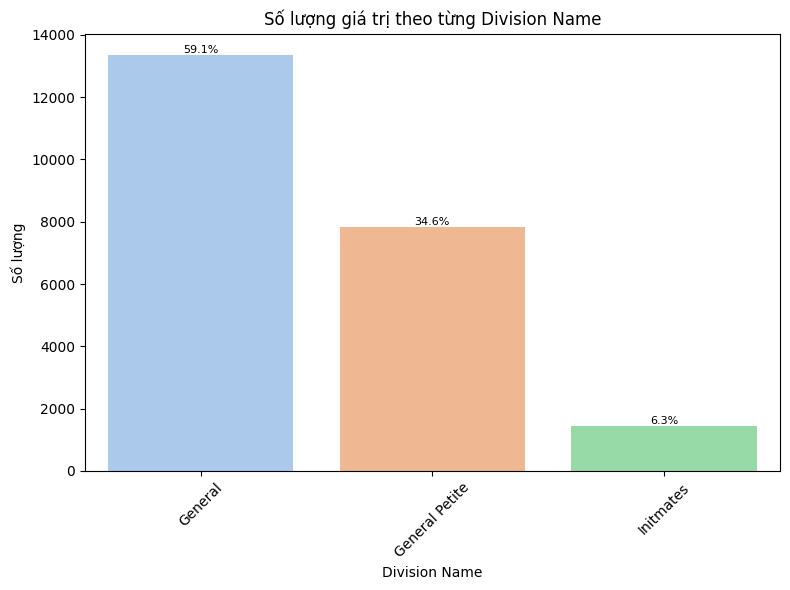

    Division Name  Count  percentages
0         General  13364    59.062182
1  General Petite   7837    34.635612
2       Initmates   1426     6.302205


In [20]:
plot_categorical_count(df_no14null, 'Division Name')

**Nhận Xét:**

- Phân bố khá cân đối: Số lượng mẫu trong mỗi phân loại của "Division Name" không quá chênh lệch. Tuy nhiên, "General" chiếm tỉ lệ cao nhất với khoảng 59%, tiếp theo là "General Petite" với khoảng 34.64%, và cuối cùng là "Initmates" với tỉ lệ khoảng 6.30%. Điều này cho thấy sản phẩm của doanh nghiệp được phân phối khá đồng đều trong các nhóm này.

- Tiềm năng phát triển trong các lĩnh vực cụ thể: Tùy thuộc vào mục tiêu và chiến lược kinh doanh của doanh nghiệp, có thể đánh giá tiềm năng phát triển trong từng phân loại cụ thể. Ví dụ, nếu "Initmates" có tỉ lệ thấp hơn, doanh nghiệp có thể tập trung vào phát triển và quảng bá các sản phẩm trong phân khúc này để tăng cường doanh số.

- Tùy chỉnh chiến lược tiếp thị: Doanh nghiệp có thể tùy chỉnh chiến lược tiếp thị dựa trên phân bố của "Division Name". Ví dụ, nếu "General" chiếm tỉ lệ cao nhất, doanh nghiệp có thể tập trung vào chiến lược tiếp thị rộng lớn hơn để đảm bảo sự nhận biết và tiếp cận từ đông đảo khách hàng.

- Nghiên cứu thêm về yêu cầu và sở thích của từng nhóm: Để tối ưu hóa chiến lược kinh doanh, doanh nghiệp cần tiến hành nghiên cứu sâu hơn về yêu cầu và sở thích của từng nhóm khách hàng trong mỗi phân loại "Division Name". Điều này giúp đáp ứng nhu cầu cụ thể của từng nhóm mục tiêu.

- Đa dạng hóa sản phẩm và dịch vụ: Dựa trên phân loại "Division Name", doanh nghiệp có thể đa dạng hóa sản phẩm và dịch vụ để phù hợp với sở thích và nhu cầu đa dạng của khách hàng trong từng nhóm.

--> Tóm lại, việc hiểu rõ phân bố của "Division Name" có thể giúp doanh nghiệp định hình và điều chỉnh chiến lược kinh doanh một cách hiệu quả, từ đó tối ưu hóa doanh số bán hàng và tăng cường sự hài lòng của khách hàng.

### 3.1.9+ Thống kê số lượng cột Department Name

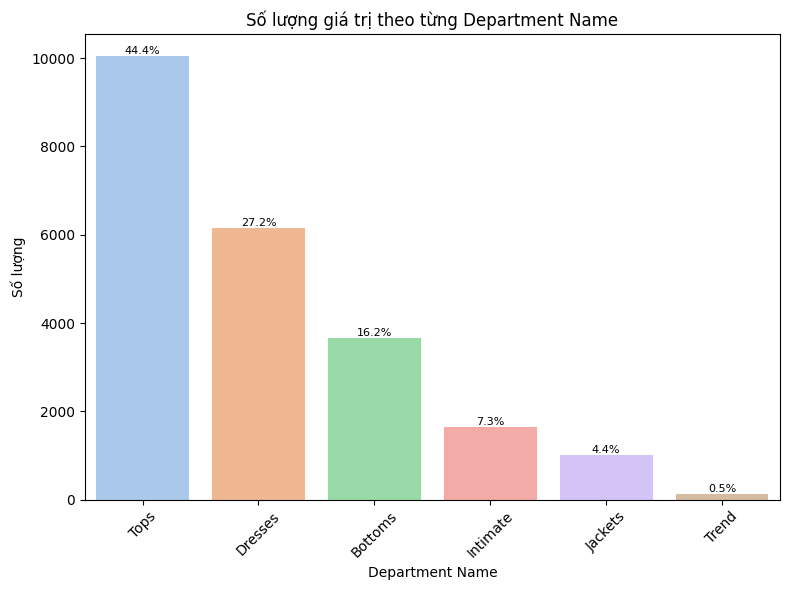

  Department Name  Count  percentages
0            Tops  10048    44.407124
1         Dresses   6145    27.157820
2         Bottoms   3661    16.179785
3        Intimate   1653     7.305432
4         Jackets   1002     4.428338
5           Trend    118     0.521501


In [21]:
plot_categorical_count(df_no14null, 'Department Name')

**Nhận Xét:**

- Phân bố sản phẩm khá đa dạng: Phân bố sản phẩm trong các phòng ban khá đa dạng, với "Tops" chiếm tỉ lệ cao nhất (khoảng 44.41%), tiếp theo là "Dresses" (khoảng 27.16%), và "Bottoms" (khoảng 16.18%). Các phòng ban khác như "Intimate", "Jackets", và "Trend" cũng đóng góp một phần nhỏ nhưng đáng kể vào tổng số lượng sản phẩm.

- Chú trọng vào phân loại "Tops" và "Dresses": Với tỉ lệ lớn nhất, doanh nghiệp có thể chú trọng vào phát triển và quảng bá sản phẩm trong phân loại "Tops" và "Dresses". Điều này có thể giúp tối ưu hóa doanh số bán hàng và tăng cường thu nhập.

- Đa dạng hóa sản phẩm trong từng phòng ban: Để thu hút một đối tượng khách hàng rộng lớn, doanh nghiệp nên đa dạng hóa sản phẩm trong từng phòng ban. Ví dụ, trong phòng ban "Tops", có thể bao gồm áo sơ mi, áo thun, áo len, và nhiều loại sản phẩm khác để đáp ứng nhu cầu và sở thích của khách hàng.

- Tập trung vào phát triển phân khúc "Intimate" và "Jackets": Mặc dù tỉ lệ của chúng không cao bằng "Tops" và "Dresses", nhưng việc tập trung vào phát triển sản phẩm trong phân khúc "Intimate" và "Jackets" cũng có thể mang lại lợi ích lớn đối với doanh nghiệp. Cần nghiên cứu thêm về nhu cầu và xu hướng của khách hàng trong các phân khúc này.

- Tối ưu hóa chiến lược tiếp thị dựa trên phân loại sản phẩm: Doanh nghiệp có thể tối ưu hóa chiến lược tiếp thị dựa trên phân loại sản phẩm, từ việc tạo ra nội dung tiếp thị đa dạng đến việc chọn kênh tiếp cận khách hàng phù hợp với từng loại sản phẩm.

--> Tóm lại, việc hiểu rõ phân bố sản phẩm trong các phòng ban "Department Name" có thể giúp doanh nghiệp tối ưu hóa chiến lược kinh doanh và tiếp thị, từ đó tăng cường doanh số bán hàng và nâng cao sự hài lòng của khách hàng.

### 3.1.10+ Thống kê số lượng cột Class Name

<Figure size 800x600 with 0 Axes>

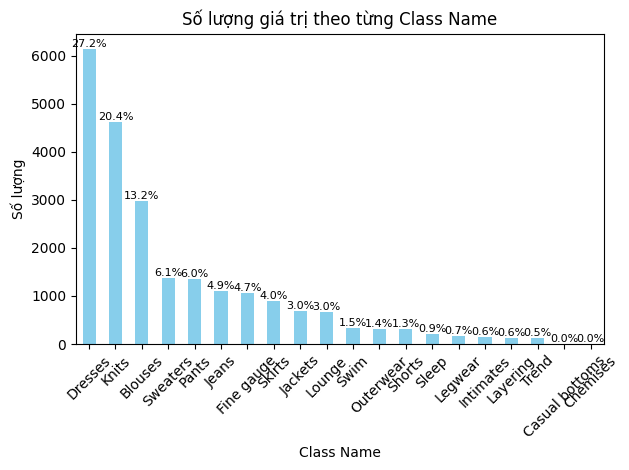

        Class Name  Count  percentages
0          Dresses   6145    27.157820
1            Knits   4626    20.444602
2          Blouses   2983    13.183365
3         Sweaters   1380     6.098908
4            Pants   1350     5.966323
5            Jeans   1103     4.874707
6       Fine gauge   1059     4.680249
7           Skirts    903     3.990807
8          Jackets    683     3.018518
9           Lounge    669     2.956645
10            Swim    332     1.467274
11       Outerwear    319     1.409820
12          Shorts    304     1.343528
13           Sleep    214     0.945773
14         Legwear    158     0.698281
15       Intimates    147     0.649666
16        Layering    132     0.583374
17           Trend    118     0.521501
18  Casual bottoms      1     0.004419
19        Chemises      1     0.004419


In [22]:
plot_categorical_count(df_no14null, 'Class Name')

**Nhận xét**

- Phân bố sản phẩm đa dạng: Có một loạt các lớp sản phẩm trong "Class Name", từ các loại sản phẩm thời trang như Dresses, Knits, Blouses, Sweaters cho đến các loại quần áo đặc biệt như Swimwear và Outerwear.

- Tập trung vào các lớp sản phẩm phổ biến nhất: Có thể thấy rằng các lớp sản phẩm phổ biến nhất bao gồm Dresses (27.16%), Knits (20.44%), và Blouses (13.18%). Do đó, doanh nghiệp có thể tập trung vào phát triển và quảng bá sản phẩm trong các lớp này để tối ưu hóa doanh số bán hàng.

- Nghiên cứu và phát triển các lớp sản phẩm ít phổ biến hơn: Các lớp sản phẩm như Legwear, Intimates, và Layering có tỉ lệ thấp hơn trong phân bố. Tuy nhiên, việc nghiên cứu và phát triển các sản phẩm trong các lớp này cũng có thể mang lại cơ hội tiềm năng cho doanh nghiệp.

- Tối ưu hóa chiến lược tiếp thị dựa trên các lớp sản phẩm: Doanh nghiệp có thể tối ưu hóa chiến lược tiếp thị dựa trên các lớp sản phẩm, từ việc tạo ra nội dung tiếp thị đa dạng đến việc chọn kênh tiếp cận khách hàng phù hợp với từng loại sản phẩm.

- Quản lý hàng tồn kho và dự đoán nhu cầu: Hiểu rõ phân bố của "Class Name" cũng giúp doanh nghiệp quản lý hàng tồn kho và dự đoán nhu cầu của khách hàng, từ đó giảm thiểu lượng hàng tồn kho không cần thiết và tối ưu hóa việc cung cấp hàng hóa.

--> Tóm lại, việc hiểu rõ phân bố của "Class Name" có thể giúp doanh nghiệp tối ưu hóa chiến lược kinh doanh và tiếp thị, từ đó tăng cường doanh số bán hàng và nâng cao sự hài lòng của khách hàng.

## 3.2 Phân tích nhị biến

### 3.2.1 * Các hàm có liên quan trong phân tích nhị biến

In [95]:
def calculate_mean_point(df, product_column, rating_column):
    # Tính điểm đánh giá trung bình và số lượng lượt đánh giá của mỗi sản phẩm
    result_df = df.groupby(product_column).agg({rating_column: ['mean', 'size']}).reset_index()
    result_df.columns = [product_column, 'Average_Point', 'Num_Counts']
    return result_df

def plot_tree_map_mean_point(df, title):
  fig = px.treemap(df, path=['Clothing ID'], values='Num_Counts', hover_data={'Average_Point': True})
  fig.update_layout(title_text=title,
                    title_x=0.5, title_font=dict(size=20))
  fig.show()
  # Sắp xếp DataFrame theo cột Num_Ratings
  sorted_df = df.sort_values(by='Num_Counts', ascending=False)
  # In ra danh sách Clothing ID đã sắp xếp
  sorted_df_ids = sorted_df['Clothing ID'].tolist()
  df.info()
  print(sorted_df_ids)

# Định nghĩa hàm để vẽ biểu đồ và tính độ lệch của cột dữ liệu
def plot_distribution_2col(data, col1, col2):

    plt.figure(figsize=(15, 4))

    # Vẽ biểu đồ histogram ở ô đầu tiên của lưới 1x2
    plt.subplot(1, 2, 1)
    data[col1].hist(grid=False)
    plt.ylabel('count')

    # Vẽ biểu đồ boxplot ở ô thứ hai của lưới 1x2
    plt.subplot(1, 2, 2)
    data[col2].hist(grid=False)
    plt.ylabel('count')
    plt.show()

def plot_scatterplot(data, column1, column2):
    scatter_plot = go.Scatter(x=data[column1], y=data[column2], mode='markers', marker=dict(color='blue', opacity=0.5))

    layout = go.Layout(title=f'Scatterplot giữa {column1} và {column2}',
                       xaxis=dict(title=column1),
                       yaxis=dict(title=column2),
                       showlegend=False,
                       hovermode='closest',
                       plot_bgcolor='rgba(0,0,0,0)')

    fig = go.Figure(data=[scatter_plot], layout=layout)
    fig.show()

def plot_distribution_col_box(df, col1, col2):
  fig = px.histogram(df[col1], color=df[col2],
                    labels={'value': col1,
                            'color': col2}, marginal='box')
  fig.update_traces(marker=dict(line=dict(width=2)))
  fig.update_layout(title_text='Phân phối giữa ' +col1 + ' và ' + col2,title_x=0.5, title_font=dict(size=20))
  fig.update_layout(barmode='overlay', template = "simple_white")
  fig.show()
  histogram_data = fig.data[0].y
  boxplot_data = fig.data[1].y

def minmaxscaler(df):
    return (df-df.min())/(df.max()-df.min())
def zscorenomalize(df):
    return (df - df.mean())/df.std()

def plot_distribution_norm_scatter(df, col1, col2):
  g = sns.jointplot(x= df[col2], y=df[col1])
  g.fig.suptitle("Scatter Plot giữa " +col2 + " và " + col1)
  plt.show()

def plot_age_vs_cat(data, colname):
  df = data.copy()
  age_range = [10*i for i in range(1,10)]
  age = [str(num)+' - '+str(num+9) for num in age_range]
  for idx in range(len(age_range)):
      df.loc[np.logical_and(df['Age']>=age_range[idx],df['Age']<=age_range[idx]+9), 'AgeGroup'] = age[idx]
  df['Age'] = df['AgeGroup']
  df.drop('AgeGroup',axis=1,inplace=True)
  age_obj = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69',
              '70 - 79', '80 - 89', '90 - 99']
  age_show = [df.groupby(['Age', colname]).size()[e] for e in age_obj]
  age_obj = [[df.groupby(['Age', colname]).size()[e], e] for e in age_obj]

  age_obj = [go.Bar(name=e[1], x=e[0].index, y=e[0].values/sum(e[0]),
            text=np.round(e[0].values/sum(e[0]),2)) for e in age_obj]

  data = pd.DataFrame({
      'Age': [e.name for e in age_obj],
      colname: [e.x for e in age_obj],
      'percent': [e.text for e in age_obj]
  })
  fig = go.Figure(data=age_obj)
  fig.update_layout(xaxis_tickangle=-45, title='Age và' + colname, template = "simple_white")
  fig.show()
  print(data.to_string())


def plot_stacked_hist_col(data, col1, col2):
    fig = px.histogram(data[col1], color=data[col2],
                    labels={'value': col1,
                            'color': col2})
    fig.update_layout(bargap=0.2)
    fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
    fig.update_layout(title_text='Biểu đồ quan hệ giữa ' + col1 + ' và ' + col2,
                    title_x=0.5, title_font=dict(size=20))
    fig.update_layout(barmode='group', template = "simple_white")
    fig.show()

    chart_data = fig.to_dict()['data']
    extracted_data = pd.DataFrame()

    for data_item in chart_data:
        temp_df = pd.DataFrame(data_item['x'], columns=[col1])
        temp_df[col2] = data_item['name']
        extracted_data = pd.concat([extracted_data, temp_df], ignore_index=True)
    grouped_data = extracted_data.groupby([col1, col2]).size().reset_index(name='Count')
    print(grouped_data.to_string())



def plot_stacked_line(df, col1, col2):
    f, axes = plt.subplots(1, 2, figsize=(18, 4), sharex=False)
    colors = sns.color_palette('husl', len(set(df[col2][df[col2].notnull()])))
    for i, x in enumerate(set(df[col2][df[col2].notnull()])):
        sns.kdeplot(df[col1][df[col2]==x], label=x, shade=False, color=colors[i], ax=axes[0])

    axes[0].set_xlabel('{}'.format(col1))
    axes[0].set_title('Phân phối {} giữa {}\n'.format(col2, col1))

    min_value = 15
    for i, x in enumerate(set(df[col2][df[col2].notnull()])):
        sns.kdeplot(df[col1][(df[col2]==x) & (df[col1] < min_value)], label=x, shade=False, color=colors[i], ax=axes[1])

    axes[1].set_xlabel('{}'.format(col1))
    axes[1].set_title('Phân phối giữa {} và {}\n có số lượng < {}'.format(col2, col1, min_value))

    legend_labels = set(df[col2][df[col2].notnull()])
    legend_handles = [plt.Line2D([0], [0], color=colors[i], label=label) for i, label in enumerate(legend_labels)]
    axes[1].legend(handles=legend_handles, title=col2)
    axes[1].text(0.5, -0.2, "Số lượng < {} được biểu diễn".format(min_value), ha='center', transform=axes[1].transAxes)

    plt.show()

def plot_cor_two_cold(df, col1, col2):
  f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
  sns.heatmap(pd.crosstab(df[col1], df[col2]), annot=True, linewidths=.5,
              ax = ax[0],fmt='g', cmap="Greens", cbar_kws={'label': 'Count'})
  ax[0].set_title('Số lượng của {} phân bố theo {}\nHeatmap Phân bố số lượng'.format(col1, col2))
  crosstab = pd.crosstab(df[col1], df[col2], normalize=True).mul(100).round(0)
  sns.heatmap(crosstab, annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens", cbar_kws={'label': 'Percentage %'})
  ax[1].set_title('Số lượng của {} phân bố theo {}\nHeatmap Phân bố tỉ lệ phần trăm'.format(col1, col2))
  ax[1].set_ylabel('')
  plt.tight_layout(pad=0)
  plt.show()

  f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
  sns.heatmap(pd.crosstab(df[col1], df[col2], normalize='columns').mul(100).round(0),
              annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Reds",
                  cbar_kws={'label': 'Percentage %'})
  ax[0].set_title('Số lượng của {} phân bố theo {}\nHeatmap Phân bố tỉ lệ phần trăm theo cột'.format(col1, col2))

  sns.heatmap(pd.crosstab(df[col1], df[col2], normalize='index').mul(100).round(0),
              annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Reds",
                  cbar_kws={'label': 'Percentage %'})
  ax[1].set_title('Số lượng của {} phân bố theo {}\nHeatmap Phân bố tỉ lệ phần trăm theo chỉ mục'.format(col1, col2))
  ax[1].set_ylabel('')
  plt.tight_layout(pad=0)
  plt.show()

  print(crosstab.to_string())

def plot_hist_v(df, col1, col2, n):
  product_polarity_sorted=pd.DataFrame(df.groupby(col1)[col2].mean().sort_values(ascending=True)).reset_index()
  product_polarity_sorted[col1] = product_polarity_sorted[col1].astype(str)
  top_products = product_polarity_sorted.nlargest(n, col2)
  max_chars = 100
  shortened_names = [name[:max_chars] + '...' if len(str(name)) > max_chars else name for name in top_products[col1]]
  plt.figure(figsize=(12, 10))
  polarity_graph = plt.barh(shortened_names, top_products[col2], color='green')
  plt.xlabel(col2)
  plt.title('Top {} {} có lượt {} trung bình cao nhất'.format(n, col1, col2))
  for index, value in enumerate(top_products[col2]):
      plt.text(value, index, str(round(value, 3)), fontsize=7)
      plt.text(0, index, shortened_names[index], fontsize=7)
  plt.yticks([])
  plt.show()
  print(top_products)


### 3.2.2+ Phân tích giữa Clothing ID và Age

In [25]:
plot_scatterplot(df_no14null, 'Clothing ID', 'Age')

**Nhận Xét**

- Tập trung vào phân khúc sản phẩm có ID từ 810 đến 1150: Phân khúc này thu hút sự quan tâm của một loạt độ tuổi từ 18 đến 70. Đây có thể được xem là phân khúc chính trong danh mục sản phẩm của doanh nghiệp. Đề xuất nên tập trung vào việc phát triển và quảng bá sản phẩm trong phân khúc này để tối đa hóa lợi nhuận và thúc đẩy doanh số bán hàng.

- Nắm bắt sự quan tâm của đối tượng từ 30-40 tuổi đối với các sản phẩm có ID bé hơn 810: Mặc dù số lượng sản phẩm trong phân khúc này không nhiều, nhưng vẫn thu hút được sự quan tâm của đối tượng từ 30-40 tuổi. Đề xuất nên nghiên cứu sâu hơn về nhu cầu và sở thích của đối tượng này và cân nhắc mở rộng danh mục sản phẩm trong phân khúc này để tăng cường doanh số bán hàng.

- Tối ưu hóa phân khúc đối tượng trên 70 tuổi: Dựa trên nhận xét, đối tượng trên 70 tuổi chỉ đóng góp ít vào lượt đánh giá sản phẩm. Đề xuất nên tiến hành nghiên cứu thêm về nhu cầu và ưu tiên của đối tượng này để tối ưu hóa sản phẩm và dịch vụ, hoặc có thể tập trung vào các chiến lược tiếp thị và quảng cáo đặc biệt dành cho đối tượng này để tăng cường tương tác và thúc đẩy sự quan tâm từ phía họ.

--> Tóm lại, việc hiểu rõ về sự phân bố quan tâm của đối tượng khách hàng ở mỗi phân khúc sản phẩm sẽ giúp doanh nghiệp tối ưu hóa chiến lược kinh doanh và tiếp thị, từ đó tăng cường doanh số bán hàng và nâng cao sự hài lòng của khách hàng.

### 3.2.3+ Phân tích giữa Clothing ID và Rating

In [28]:
cloth_rating = calculate_mean_point(df, 'Clothing ID', 'Rating')
cloth_rating.describe().T


count        mean         std  min     25%         50%  \
Clothing ID    1206.0  602.500000  348.286520  0.0  301.25  602.500000   
Average_Point  1206.0    4.198540    0.849258  1.0    4.00    4.333333   
Num_Counts     1206.0   19.474295   69.009764  1.0    1.00    2.000000   

                  75%     max  
Clothing ID    903.75  1205.0  
Average_Point    5.00     5.0  
Num_Counts       6.75  1024.0

In [30]:
br730 = cloth_rating[(cloth_rating['Average_Point'] > 4) & (cloth_rating['Clothing ID'].between(730, 1206)) & (cloth_rating['Num_Counts'] > 19)]
plot_tree_map_mean_point(br730, 'Top các sản phẩm có ID > 730 có lượt đánh giá trung bình > 4')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 815 to 1150
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clothing ID    123 non-null    int64  
 1   Average_Point  123 non-null    float64
 2   Num_Counts     123 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.8 KB
[1078, 862, 1094, 1081, 872, 829, 1110, 895, 936, 867, 850, 1095, 863, 1077, 1059, 1086, 1080, 860, 1083, 861, 873, 828, 1033, 1092, 927, 1056, 820, 836, 1022, 1072, 1008, 1104, 984, 831, 1020, 833, 877, 854, 834, 864, 835, 1099, 1035, 865, 907, 940, 1025, 909, 975, 875, 1068, 830, 1037, 886, 1060, 824, 825, 903, 1009, 1066, 876, 996, 939, 1028, 949, 1096, 1047, 964, 1030, 857, 945, 1038, 933, 1091, 1111, 993, 1100, 815, 869, 974, 839, 985, 1070, 1074, 1001, 1044, 1126, 880, 1053, 952, 999, 1052, 906, 1051, 1103, 995, 822, 1024, 1054, 899, 1049, 826, 1123, 1093, 916, 1085, 898, 1125, 960, 1117, 1004, 1115, 896, 966,

**Nhận xét**

- Trong số 1206 sản phẩm được phân tích, có 123 sản phẩm có Clothing ID lớn hơn 730 và trung bình rating lớn hơn 4. Điều này cho thấy một số lượng đáng kể các sản phẩm, đặc biệt là những sản phẩm có Clothing ID cao hơn, nhận được sự đánh giá tích cực từ khách hàng.

- Các sản phẩm có Clothing ID lớn hơn 730 và trung bình rating lớn hơn 4 có thể được xem xét là các sản phẩm có hiệu suất tốt và được khách hàng đánh giá cao. Doanh nghiệp có thể tập trung vào việc quảng bá và tiếp thị các sản phẩm này để tăng cường doanh số bán hàng và tạo sự hài lòng cho khách hàng.

- Để duy trì và nâng cao chất lượng sản phẩm, cần tiếp tục theo dõi phản hồi từ khách hàng và thúc đẩy sự tương tác tích cực giữa doanh nghiệp và người tiêu dùng.

In [32]:
br720 = cloth_rating[(cloth_rating['Average_Point'] < 4) & (cloth_rating['Clothing ID'].between(730, 1206))& (cloth_rating['Num_Counts'] > 19)]
plot_tree_map_mean_point(br720, 'Top các sản phẩm có ID > 720 có lượt đánh giá trung bình < 4')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 817 to 1121
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clothing ID    41 non-null     int64  
 1   Average_Point  41 non-null     float64
 2   Num_Counts     41 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB
[868, 1082, 1087, 866, 823, 1089, 941, 1084, 883, 1075, 881, 1079, 819, 840, 879, 871, 818, 870, 844, 1121, 878, 937, 1076, 965, 912, 838, 942, 1116, 986, 921, 1088, 1107, 855, 1055, 841, 1046, 1016, 858, 817, 929, 832]


**Nhận xét**

- Trong số 1206 sản phẩm được phân tích, có 41 sản phẩm có Clothing ID lớn hơn 720 và trung bình rating nhỏ hơn 4. Điều này có thể chỉ ra rằng một số sản phẩm trong nhóm này không nhận được sự hài lòng cao từ phía khách hàng hoặc có thể cần cải thiện.

- Doanh nghiệp có thể xem xét việc kiểm tra các sản phẩm này để hiểu rõ hơn về lý do tại sao chúng có đánh giá thấp hơn mong đợi. Có thể cần thực hiện các biện pháp cải thiện, như cải thiện chất lượng sản phẩm, dịch vụ khách hàng hoặc chiến lược tiếp thị.

- Việc tiếp tục theo dõi và phản hồi đối với các sản phẩm này là quan trọng để đảm bảo chất lượng và sự hài lòng của khách hàng, cũng như tối ưu hóa hiệu suất kinh doanh của doanh nghiệp.

In [ ]:
br130 = cloth_rating[(cloth_rating['Average_Point'] > 4) & (cloth_rating['Clothing ID'].between(0, 730)) & (cloth_rating['Num_Counts'] > 10)]
plot_tree_map_mean_point(br130, 'Top các sản phẩm có ID < 730 có lượt đánh giá trung bình > 4')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 90 to 719
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clothing ID    23 non-null     int64  
 1   Average_Point  23 non-null     float64
 2   Num_Counts     23 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 736.0 bytes
[169, 282, 520, 375, 194, 663, 460, 674, 260, 300, 316, 90, 634, 621, 364, 382, 155, 251, 719, 417, 278, 252, 622]


**Nhận xét**
- Trong số 1206 sản phẩm được phân tích, có 23 sản phẩm có Clothing ID nhỏ hơn 730 và trung bình rating lớn hơn 4. Điều này có thể cho thấy rằng một số sản phẩm dưới đây nhận được sự hài lòng cao từ phía khách hàng.

- Doanh nghiệp có thể muốn xem xét chi tiết các sản phẩm này để hiểu rõ hơn về những gì làm cho chúng được đánh giá cao và áp dụng những bài học từ đó cho các sản phẩm khác.

- Các sản phẩm này có thể đại diện cho những điểm mạnh của doanh nghiệp trong việc cung cấp các sản phẩm được khách hàng đánh giá cao. Chúng có thể được sử dụng như một nguồn cảm hứng để phát triển các sản phẩm tương lai và tối ưu hóa danh mục sản phẩm.

In [ ]:
br120 = cloth_rating[(cloth_rating['Average_Point'] < 4) & (cloth_rating['Clothing ID'].between(0, 730)) & (cloth_rating['Num_Counts'] > 5)]
plot_tree_map_mean_point(br120, 'Top các sản phẩm có ID < 730 có lượt đánh giá trung bình < 4')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 8 to 641
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clothing ID    16 non-null     int64  
 1   Average_Point  16 non-null     float64
 2   Num_Counts     16 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes
[229, 482, 254, 641, 514, 8, 350, 380, 481, 576, 619, 636, 116, 121, 391, 411]


**Nhận Xét:**

- Trong số 1206 sản phẩm được phân tích, có 16 sản phẩm có Clothing ID nhỏ hơn 730 và trung bình rating dưới 4. Điều này có thể cho thấy rằng một số sản phẩm không đạt được sự hài lòng mong đợi từ phía khách hàng.

- Doanh nghiệp cần xem xét chi tiết các sản phẩm này để hiểu nguyên nhân của việc đánh giá thấp và thực hiện các biện pháp cải thiện. Có thể cần phân tích sâu hơn để tìm ra các vấn đề cụ thể và đưa ra các giải pháp cải thiện.

- Các sản phẩm này có thể đại diện cho các điểm yếu của doanh nghiệp trong việc cung cấp các sản phẩm không đáp ứng được nhu cầu và mong đợi của khách hàng. Do đó, việc cải thiện chất lượng và tính hấp dẫn của các sản phẩm này có thể giúp tăng cường sự hài lòng của khách hàng và cải thiện hiệu suất kinh doanh tổng thể.

### 3.2.4+ Phân tích giữa Clothing ID và Recommended IND

In [ ]:
cloth_ind = calculate_mean_point(df_no14null, 'Clothing ID', 'Recommended IND')
cloth_ind.describe().T

count        mean         std  min     25%    50%     75%  \
Clothing ID    1172.0  609.350683  346.223442  1.0  310.75  611.5  909.25   
Average_Point  1172.0    0.820953    0.293227  0.0    0.75    1.0    1.00   
Num_Counts     1172.0   19.306314   67.489108  1.0    1.00    2.0    7.00   

                  max  
Clothing ID    1205.0  
Average_Point     1.0  
Num_Counts      987.0

In [ ]:
ci120 = cloth_ind[(cloth_ind['Average_Point'] > 0.8) & (cloth_ind['Num_Counts'] > 19)]
plot_tree_map_mean_point(ci120, 'Top các sản phẩm có lượt khuyến nghị trung bình > 0.8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 155 to 1118
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clothing ID    100 non-null    int64  
 1   Average_Point  100 non-null    float64
 2   Num_Counts     100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.1 KB
[1078, 862, 1094, 1081, 872, 829, 1110, 895, 936, 867, 850, 863, 1059, 1086, 1080, 1083, 861, 873, 828, 1033, 927, 1056, 820, 1022, 1008, 984, 831, 1020, 877, 854, 834, 864, 835, 1099, 1035, 940, 907, 909, 1025, 875, 1068, 830, 1037, 1060, 886, 1066, 1009, 876, 1028, 939, 949, 1047, 1096, 964, 1030, 1038, 933, 1091, 1111, 1100, 993, 815, 839, 985, 869, 1070, 1074, 1126, 952, 1001, 1051, 1053, 282, 999, 906, 1103, 995, 169, 1049, 1024, 1093, 520, 1123, 916, 1085, 898, 960, 1125, 1117, 896, 1115, 967, 966, 938, 1003, 1004, 1150, 1042, 1026, 1027]


**Nhận Xét**

Tính trung bình của lượt khuyến nghị trên mỗi sản phẩm là 0.82, với độ lệch chuẩn là 0.29. Trong số 1172 sản phẩm được phân tích, có 100 sản phẩm có lượt khuyến nghị trung bình vượt qua ngưỡng 0.8. Điều này cho thấy rằng một phần đáng kể các sản phẩm đều nhận được sự khuyến nghị từ khách hàng. Tuy nhiên, cần lưu ý rằng chỉ dựa trên lượt khuyến nghị trung bình mà không xem xét sự phân phối và số lượng phản hồi có thể là không đủ. Do đó, việc kết hợp thông tin này với các yếu tố khác như số lượng đánh giá và phân phối độ tuổi của khách hàng sẽ giúp có cái nhìn toàn diện hơn về sự phản hồi từ khách hàng và hiệu suất của sản phẩm.







In [ ]:
ci110 = cloth_ind[(cloth_ind['Average_Point'] == 0.0) & (cloth_ind['Num_Counts'] > 1)]
plot_tree_map_mean_point(ci110, 'Top các sản phẩm không có lượt khuyến nghị')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 205 to 1162
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clothing ID    12 non-null     int64  
 1   Average_Point  12 non-null     float64
 2   Num_Counts     12 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 384.0 bytes
[635, 567, 220, 235, 389, 572, 806, 885, 951, 973, 1165, 1195]


**Nhận xét**

- Trong số 1172 sản phẩm được phân tích, có 12 sản phẩm không nhận được bất kỳ lượt khuyến nghị nào từ khách hàng. Điều này có thể cho thấy rằng có một số sản phẩm không phù hợp hoặc không được đánh giá cao bởi khách hàng.

- TCần phải tiếp tục theo dõi và đánh giá các sản phẩm không nhận được khuyến nghị để hiểu rõ hơn về nguyên nhân và có các biện pháp cải thiện phù hợp. Điều này có thể bao gồm việc cải thiện chất lượng sản phẩm, cải thiện dịch vụ khách hàng hoặc điều chỉnh chiến lược tiếp thị.

### 3.2.5+ Phân tích giữa Clothing ID và Positive Feedback Count

In [ ]:
cloth_pfc = calculate_mean_point(df_no14null, 'Clothing ID', 'Positive Feedback Count')
cloth_pfc.describe().T

count        mean         std  min     25%         50%  \
Clothing ID    1172.0  609.350683  346.223442  1.0  310.75  611.500000   
Average_Point  1172.0    1.897675    2.261518  0.0    0.00    1.404545   
Num_Counts     1172.0   19.306314   67.489108  1.0    1.00    2.000000   

                      75%     max  
Clothing ID    909.250000  1205.0  
Average_Point    2.753308    32.0  
Num_Counts       7.000000   987.0

In [ ]:
cpfc110 = cloth_pfc[(cloth_pfc['Average_Point'] > 3.0) & (cloth_pfc['Num_Counts'] > 19)]
plot_tree_map_mean_point(cpfc110, 'Top các sản phẩm có lượt feedback trung bình > 3')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 789 to 1118
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clothing ID    43 non-null     int64  
 1   Average_Point  43 non-null     float64
 2   Num_Counts     43 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB
[1094, 1081, 1110, 1095, 1086, 1080, 1092, 828, 836, 1072, 1104, 833, 1082, 864, 835, 975, 1060, 1089, 903, 1009, 939, 1096, 881, 857, 883, 1079, 1091, 819, 871, 974, 1121, 1074, 912, 838, 1103, 986, 916, 1107, 841, 1016, 1115, 1150, 832]


**Nhận xét**

- Trong số 1172 sản phẩm được phân tích, có 43 sản phẩm có Clothing ID và số lượng feedback trung bình lớn hơn 3. Điều này có thể cho thấy rằng một số sản phẩm nhận được sự chú ý tích cực từ phía khách hàng và có thể được đánh giá cao.

- Doanh nghiệp có thể muốn xem xét chi tiết các sản phẩm này để hiểu lý do vì sao chúng nhận được nhiều phản hồi tích cực hơn so với các sản phẩm khác. Các yếu tố như chất lượng sản phẩm, dịch vụ khách hàng, hoặc chiến lược tiếp thị có thể đóng vai trò quan trọng trong việc thu hút sự chú ý và phản hồi tích cực từ khách hàng.

- Các sản phẩm nhận được nhiều phản hồi tích cực có thể được xem xét là một điểm mạnh của doanh nghiệp và có thể được sử dụng để tăng cường quảng bá và tiếp thị. Đồng thời, cũng cần tiếp tục duy trì và cải thiện chất lượng sản phẩm và dịch vụ để đáp ứng và vượt qua sự mong đợi của khách hàng.

In [ ]:
cpfc112 = cloth_pfc[(cloth_pfc['Average_Point'] == 0.0) & (cloth_pfc['Num_Counts'] > 1)]
plot_tree_map_mean_point(cpfc112, 'Top các sản phẩm không có lượt feedback')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 13 to 1171
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Clothing ID    75 non-null     int64  
 1   Average_Point  75 non-null     float64
 2   Num_Counts     75 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.3 KB
[24, 968, 983, 821, 588, 132, 293, 292, 644, 180, 749, 134, 248, 119, 688, 666, 801, 737, 736, 752, 709, 755, 697, 670, 760, 767, 15, 806, 811, 885, 892, 914, 1019, 1120, 1124, 1154, 1159, 1173, 1184, 1195, 1198, 650, 582, 631, 625, 38, 52, 61, 66, 68, 82, 93, 112, 115, 122, 125, 156, 164, 202, 213, 302, 306, 318, 341, 396, 441, 446, 461, 473, 489, 530, 531, 549, 624, 1205]


**Nhận Xét**

- Trong số 1172 sản phẩm được phân tích, có 75 sản phẩm không có thông tin về số lượng feedback. Điều này có thể là do các sản phẩm này chưa nhận được bất kỳ phản hồi tích cực nào từ phía khách hàng hoặc thông tin phản hồi không được ghi nhận đầy đủ trong cơ sở dữ liệu.

- Đối với các sản phẩm không có lượng feedback tích cực, doanh nghiệp có thể muốn tìm hiểu thêm về lý do tại sao chúng không nhận được sự chú ý từ khách hàng. Có thể cần thiết phải đánh giá lại chiến lược tiếp thị, chất lượng sản phẩm hoặc dịch vụ để tạo ra phản hồi tích cực từ khách hàng.

- Đồng thời, việc thiếu thông tin phản hồi cũng cần được xem xét và cải thiện để đảm bảo rằng doanh nghiệp có thể thu thập đầy đủ thông tin từ khách hàng và từ đó cải thiện sản phẩm và dịch vụ của mình.







### 3.2.6+ Phân tích giữa Age và Rating

In [37]:
plot_distribution_col_box(df_no14null, 'Age', 'Rating')

**Nhận Xét**

- Phần lớn các độ tuổi trong tập dữ liệu đều đánh giá sản phẩm ở mức cao nhất là 5 điểm. Điều này cho thấy sự hài lòng tổng thể về sản phẩm từ mọi đối tượng khách hàng.

- Các đối tượng từ độ tuổi 30 đến 50 chiếm đa số trong số những người đưa ra đánh giá, cho thấy nhóm này là đối tượng chính mà doanh nghiệp nên tập trung vào khi phát triển sản phẩm và chiến lược tiếp thi, trong đó độ tuổi 39 tuổi có lượt đánh giá cao vượt bậc.

- Tập trung chủ yếu vào mức đánh giá cao nhất, tức là 5 điểm, có thể ngụ ý rằng sản phẩm đang nhận được phản hồi tích cực từ phần lớn khách hàng. Tuy nhiên, cần lưu ý và nghiên cứu kỹ lưỡng các đánh giá ở các mức điểm khác để hiểu rõ hơn về những điểm mạnh và điểm yếu của sản phẩm, từ đó có thể cải thiện và phát triển tốt hơn trong tương lai.

- Việc tiếp tục thu thập phản hồi từ khách hàng ở mọi độ tuổi là rất quan trọng để doanh nghiệp có thể duy trì và nâng cao chất lượng sản phẩm của mình.

### 3.2.7+ Phân tích giữa Age và Recommended IND

In [ ]:
plot_distribution_col_box(df_no14null, 'Age', 'Recommended IND')

**Nhận Xét**

- Phần lớn các độ tuổi trong tập dữ liệu đều có khuyến nghị cho sản phẩm. Đặc biệt, tập trung đông nhất ở độ tuổi từ 30 đến 50, đây có thể được coi là nhóm đối tượng chính mà doanh nghiệp nên tập trung quảng bá và tiếp cận.

- Điều đáng chú ý là người 39 tuổi có mức khuyến nghị vượt trội hơn so với các nhóm độ tuổi khác. Điều này có thể gợi ý rằng sản phẩm có sức hấp dẫn đặc biệt đối với nhóm độ tuổi này.

- Tuy có một số lượng nhỏ các đánh giá không khuyến nghị, nhưng chúng chỉ chiếm 1/4 so với số lượng đánh giá khuyến nghị. Điều này cũng cho thấy rằng sản phẩm vẫn nhận được sự ủng hộ tích cực từ đa số khách hàng ở mọi độ tuổi từ 20 đến 70.

- Để tối ưu hóa chiến lược tiếp thị, doanh nghiệp nên tiếp tục tập trung vào nhóm độ tuổi từ 30 đến 50, đồng thời cũng không nên bỏ qua các đối tượng khác. Nắm vững sự hài lòng và phản hồi từ mọi đối tượng khách hàng giúp doanh nghiệp cải thiện và phát triển sản phẩm một cách toàn diện.

### 3.2.8+ Phân tích giữa Age và Positive Feedback Count

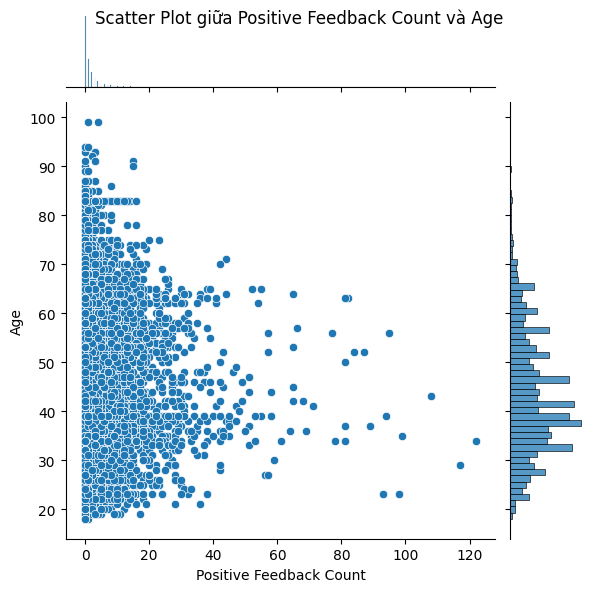

In [ ]:
plot_distribution_norm_scatter(df_no14null, 'Age', 'Positive Feedback Count')

**Nhận Xét**

- Biểu đồ phân phối ở trên rõ ràng cho thấy hầu hết các điểm đều tập trung ở MỨC KHÔNG!

- Nhận định: Có vẻ như có một sự tương quan nhỏ giữa tuổi và số lượng phản hồi tích cực nhận được. Sẽ thú vị nếu tập trung vào cấu trúc văn bản của các đánh giá tích cực cao.

- Đề xuất cho doanh nghiệp: Doanh nghiệp nên tập trung vào việc nghiên cứu các đánh giá tích cực có điểm cao để hiểu rõ hơn về những yếu tố nào được khách hàng đánh giá cao. Điều này có thể giúp cải thiện sản phẩm và dịch vụ, tăng cường sự hài lòng của khách hàng và tạo ra một ảnh hưởng tích cực đối với thương hiệu của doanh nghiệp.

### 3.2.9+ Phân tích giữa Age và Department Name

In [59]:
plot_age_vs_cat(df_no14null, 'Department Name')

       Age                                     Department Name                               percent
0  10 - 19         [Bottoms, Dresses, Intimate, Jackets, Tops]          [0.2, 0.3, 0.16, 0.02, 0.32]
1  20 - 29  [Bottoms, Dresses, Intimate, Jackets, Tops, Trend]  [0.14, 0.31, 0.09, 0.04, 0.41, 0.01]
2  30 - 39  [Bottoms, Dresses, Intimate, Jackets, Tops, Trend]   [0.16, 0.29, 0.08, 0.04, 0.41, 0.0]
3  40 - 49  [Bottoms, Dresses, Intimate, Jackets, Tops, Trend]  [0.17, 0.26, 0.07, 0.04, 0.45, 0.01]
4  50 - 59  [Bottoms, Dresses, Intimate, Jackets, Tops, Trend]  [0.16, 0.25, 0.06, 0.05, 0.48, 0.01]
5  60 - 69  [Bottoms, Dresses, Intimate, Jackets, Tops, Trend]   [0.15, 0.22, 0.06, 0.06, 0.51, 0.0]
6  70 - 79  [Bottoms, Dresses, Intimate, Jackets, Tops, Trend]   [0.13, 0.23, 0.07, 0.06, 0.51, 0.0]
7  80 - 89  [Bottoms, Dresses, Intimate, Jackets, Tops, Trend]   [0.06, 0.21, 0.1, 0.09, 0.53, 0.01]
8  90 - 99                  [Bottoms, Dresses, Intimate, Tops]               [0.21, 0.5, 0.

**Nhận Xét**

- Độ tuổi có ảnh hưởng đáng kể đến sự quan tâm đến các bộ phận cụ thể của cửa hàng.
- Đối với nhóm độ tuổi từ 20 đến 29, họ thường tập trung vào các sản phẩm Bottoms, Dresses, Intimate, Jackets, Tops và Trend. Trong đó, Tops và Dresses chiếm tỷ lệ cao nhất với khoảng 41%.
- Nhóm độ tuổi từ 30 đến 49 tiếp tục quan tâm đến các sản phẩm chính là Bottoms, Dresses, Intimate, Jackets, Tops và Trend, với tỷ lệ tương tự như nhóm trước đó.
- Các nhóm độ tuổi sau đó (50 - 59, 60 - 69, 70 - 79) tiếp tục thể hiện sự quan tâm chủ yếu đến các sản phẩm chính của cửa hàng, với Tops và Dresses chiếm tỷ lệ cao nhất.
- Đối với nhóm độ tuổi 80 - 89, họ chủ yếu quan tâm đến các sản phẩm Tops và Dresses, nhưng cũng có một tỷ lệ đáng kể quan tâm đến Jackets và Intimate.
- Nhóm độ tuổi cuối cùng, 90 - 99, tập trung chủ yếu vào sản phẩm Tops và Dresses, nhưng không quan tâm đến Jackets.


--> Kết luận: Dựa trên phân tích trên, doanh nghiệp nên cân nhắc các chiến lược tiếp thị và quảng bá phù hợp với độ tuổi của khách hàng. Các sản phẩm Tops và Dresses là trọng tâm, nhưng cũng cần chú ý đến việc tiếp cận các sản phẩm khác như Jackets, Intimate tùy thuộc vào độ tuổi của đối tượng khách hàng.

### 3.2.10+ Phân tích giữa Age và Division Name

In [50]:
plot_age_vs_cat(df_no14null, 'Division Name')

       Age                         Division Name             percent
0  10 - 19  [General, General Petite, Initmates]  [0.68, 0.16, 0.16]
1  20 - 29  [General, General Petite, Initmates]  [0.58, 0.34, 0.08]
2  30 - 39  [General, General Petite, Initmates]  [0.58, 0.35, 0.07]
3  40 - 49  [General, General Petite, Initmates]   [0.6, 0.34, 0.05]
4  50 - 59  [General, General Petite, Initmates]  [0.59, 0.36, 0.05]
5  60 - 69  [General, General Petite, Initmates]  [0.61, 0.34, 0.05]
6  70 - 79  [General, General Petite, Initmates]  [0.59, 0.34, 0.06]
7  80 - 89  [General, General Petite, Initmates]  [0.59, 0.34, 0.07]
8  90 - 99  [General, General Petite, Initmates]  [0.79, 0.14, 0.07]


**Nhận xét**

- Phân bố quan tâm của khách hàng đối với các phân loại của cửa hàng có sự thay đổi nhất định theo độ tuổi.
- Từ độ tuổi 10 đến 69, tỷ lệ quan tâm cao nhất đều nằm ở phân loại General, chiếm khoảng từ 58% đến 61%.
- Đối với nhóm độ tuổi 70 - 89, tỷ lệ quan tâm đến phân loại General vẫn giữ ổn định ở mức khoảng 59%, trong khi tỷ lệ quan tâm đến General Petite và Initmates có sự tăng nhẹ.
- Đáng chú ý, nhóm độ tuổi 90 - 99 có sự thay đổi đáng kể trong phân bố quan tâm, với tỷ lệ quan tâm cao nhất đến phân loại General (79%), trong khi General Petite và Initmates chỉ chiếm tỷ lệ nhỏ.
--> Dựa trên phân tích trên, doanh nghiệp nên tăng cường tiếp cận và tiếp thị sản phẩm trong phân loại General, đặc biệt là đối với nhóm độ tuổi từ 10 đến 69, vì đây là phân khúc có tỷ lệ quan tâm cao nhất. Tuy nhiên, không nên bỏ qua các phân loại khác như General Petite và Initmates, đặc biệt là đối với nhóm độ tuổi cao hơn, để mở rộng thị trường và tăng cường sự đa dạng trong danh mục sản phẩm.

### 3.2.11+ Phân tích giữa Age và Class Name

In [58]:
plot_age_vs_cat(df_no14null, 'Class Name')

       Age                                                                                                                                                                   Class Name                                                                                                           percent
0  10 - 19                                           [Blouses, Dresses, Fine gauge, Intimates, Jackets, Jeans, Knits, Layering, Legwear, Lounge, Pants, Shorts, Skirts, Sweaters, Swim]                         [0.09, 0.3, 0.02, 0.05, 0.02, 0.05, 0.16, 0.02, 0.02, 0.02, 0.05, 0.05, 0.07, 0.05, 0.05]
1  20 - 29  [Blouses, Casual bottoms, Dresses, Fine gauge, Intimates, Jackets, Jeans, Knits, Layering, Legwear, Lounge, Outerwear, Pants, Shorts, Skirts, Sleep, Sweaters, Swim, Trend]  [0.13, 0.0, 0.31, 0.04, 0.01, 0.03, 0.04, 0.2, 0.01, 0.01, 0.03, 0.01, 0.05, 0.02, 0.04, 0.01, 0.05, 0.02, 0.01]
2  30 - 39        [Blouses, Chemises, Dresses, Fine gauge, Intimates, Jackets, Jeans, Knits, Layering, Leg

**Nhận Xét:**

- Ưu Tiên Các Loại Sản Phẩm Phổ Biến: Các loại sản phẩm như Blouses, Dresses và Knits thu hút sự quan tâm cao nhất từ khách hàng ở mọi độ tuổi, với tỷ lệ quan tâm dao động từ 20% đến 30%.

- Điều Chỉnh Chiến Lược Theo Độ Tuổi: Tùy thuộc vào độ tuổi, một số loại sản phẩm nhất định nhận được sự quan tâm cao hơn từ một nhóm khách hàng cụ thể. Ví dụ, nhóm độ tuổi 10 - 19 có sự quan tâm lớn đến Dresses (30%), trong khi nhóm độ tuổi 80 - 89 quan tâm nhiều hơn đến Blouses (21%).

- Nắm Bắt Tendency Tích cực: Có một số loại sản phẩm như Knits và Swim đã thu hút sự quan tâm tăng cao ở nhóm độ tuổi cao hơn, ví dụ nhóm độ tuổi 90 - 99 có tỷ lệ quan tâm đến Dresses lên đến 50%.

--> Dựa trên các số liệu này, doanh nghiệp có thể điều chỉnh chiến lược tiếp thị của mình để tối ưu hóa hiệu suất kinh doanh và tạo ra trải nghiệm mua sắm tốt nhất cho khách hàng ở mọi độ tuổi.

### 3.2.12+ Phân tích giữa Rating và Recommended IND

In [84]:
plot_stacked_hist_col(df_no14null, "Rating", "Recommended IND")

   Rating Recommended IND  Count
0       1               0    806
1       1               1     15
2       2               0   1455
3       2               1     94
4       3               0   1653
5       3               1   1170
6       4               0    164
7       4               1   4744
8       5               0     23
9       5               1  12503


**Nhận Xét**
1. Tỷ lệ giữa Recommended IND 0 và 1:
- Có tỷ lệ lớn hơn giữa Recommended IND 1 (người dùng khuyến nghị) so với Recommended IND 0 (người dùng không khuyến nghị). Điều này cho thấy phần lớn người dùng đều khuyến nghị sản phẩm.
2. Phân phối của Rating trong nhóm khuyến nghị và không khuyến nghị:
- Trong nhóm khuyến nghị (Recommended IND 1), có số lượng lớn nhất đánh giá 5, tiếp theo là 4 và 3, trong khi số lượng đánh giá 1 và 2 ít hơn đáng kể.
- Trong nhóm không khuyến nghị (Recommended IND 0), có sự phân phối đồng đều hơn giữa các mức đánh giá, nhưng số lượng đánh giá 3 và 2 vẫn nhiều hơn 4 và 5.
3. Đề xuất cho doanh nghiệp:
- Do phần lớn người dùng đều khuyến nghị sản phẩm, doanh nghiệp nên tiếp tục duy trì và cải thiện chất lượng sản phẩm để giữ vững lòng tin của khách hàng.
- Tập trung vào việc thu thập phản hồi từ những người dùng không khuyến nghị để hiểu rõ hơn về những vấn đề và điều chỉnh sản phẩm/phục vụ sao cho phù hợp hơn với mong muốn của họ.
- Nắm bắt phản hồi tích cực từ những người dùng khuyến nghị để tăng cường điểm mạnh của sản phẩm và sự hài lòng của khách hàng.

### 3.2.13+ Phân tích giữa Rating và Division Name

In [85]:
plot_stacked_hist_col(df_no14null, "Rating", "Division Name")

    Rating   Division Name  Count
0        1         General    479
1        1  General Petite    291
2        1       Initmates     51
3        2         General    950
4        2  General Petite    524
5        2       Initmates     75
6        3         General   1740
7        3  General Petite    929
8        3       Initmates    154
9        4         General   2910
10       4  General Petite   1702
11       4       Initmates    296
12       5         General   7285
13       5  General Petite   4391
14       5       Initmates    850


**Nhận Xét**

- Có sự tăng dần của số lượng Rating từ mức 1 đến mức 5 cho cả ba loại Division Name: General, General Petite và Initmates.
- Division Name General Petite có số lượng đánh giá ít hơn so với General, nhưng vẫn đáng kể hơn so với Initmates ở mỗi mức đánh giá.
- Nắm bắt phản hồi từ khách hàng theo từng loại Division Name để hiểu rõ hơn về đánh giá của họ về từng phân khúc sản phẩm.
- Tập trung vào việc cải thiện chất lượng sản phẩm và dịch vụ trong từng phân khúc để tăng cường sự hài lòng của khách hàng và tạo ra trải nghiệm mua sắm tích cực.
- Xem xét việc điều chỉnh chiến lược marketing và quảng cáo để tăng cường sự nhận biết và hiểu biết về sản phẩm trong mỗi loại Division Name, đặc biệt là Initmates có số lượng đánh giá thấp nhất.

### 3.2.14+ Phân tích giữa Rating và Department Name

In [86]:
plot_stacked_hist_col(df_no14null, "Rating", "Department Name")

    Rating Department Name  Count
0        1         Bottoms    114
1        1         Dresses    222
2        1        Intimate     60
3        1         Jackets     48
4        1            Tops    367
5        1           Trend     10
6        2         Bottoms    203
7        2         Dresses    459
8        2        Intimate     87
9        2         Jackets     60
10       2            Tops    729
11       2           Trend     11
12       3         Bottoms    407
13       3         Dresses    830
14       3        Intimate    177
15       3         Jackets     90
16       3            Tops   1300
17       3           Trend     19
18       4         Bottoms    762
19       4         Dresses   1367
20       4        Intimate    350
21       4         Jackets    195
22       4            Tops   2208
23       4           Trend     26
24       5         Bottoms   2175
25       5         Dresses   3267
26       5        Intimate    979
27       5         Jackets    609
28       5    

**Nhận Xét**

- Số lượng đánh giá tăng dần từ mức 1 đến mức 5 cho hầu hết các loại Department Name như Bottoms, Dresses, Intimate, Jackets, Tops và Trend.
- Tops là loại Department Name nhận được số lượng đánh giá cao nhất ở mỗi mức đánh giá từ 1 đến 5, theo sau lần lượt là Dresses và Bottoms.
- Tiếp tục tập trung vào việc cải thiện chất lượng và dịch vụ của các sản phẩm trong các phân khúc như Tops, Dresses và Bottoms để tăng cường sự hài lòng của khách hàng.
- Phân tích kỹ lưỡng hơn về nguyên nhân của các đánh giá thấp trong các loại Department Name như Intimate, Jackets và Trend để đưa ra các biện pháp cải thiện phù hợp.
- Xây dựng chiến lược marketing và quảng cáo nhằm tăng cường nhận diện và hiểu biết về các sản phẩm trong từng loại Department Name, đặc biệt là những loại có số lượng đánh giá thấp

### 3.2.15+ Phân tích giữa Rating và Class Name

In [87]:
plot_stacked_hist_col(df_no14null, "Rating", "Class Name")

    Rating      Class Name  Count
0        1         Blouses    115
1        1         Dresses    222
2        1      Fine gauge     30
3        1       Intimates      6
4        1         Jackets     34
5        1           Jeans     30
6        1           Knits    174
7        1        Layering      3
8        1         Legwear     10
9        1          Lounge     22
10       1       Outerwear     14
11       1           Pants     41
12       1          Shorts      9
13       1          Skirts     34
14       1           Sleep      9
15       1        Sweaters     48
16       1            Swim     10
17       1           Trend     10
18       2         Blouses    228
19       2         Dresses    459
20       2      Fine gauge     74
21       2       Intimates      8
22       2         Jackets     38
23       2           Jeans     55
24       2           Knits    324
25       2        Layering      7
26       2         Legwear      6
27       2          Lounge     24
28       2    

**Nhận Xét**

- Số lượng đánh giá tăng dần từ mức 1 đến mức 5 cho hầu hết các loại Class Name như Blouses, Dresses, Knits và Outerwear.
- Có một số loại Class Name nhận được số lượng đánh giá ít hơn so với các loại khác, như Layering, Chemises và Casual bottoms.
- Tiếp tục tập trung vào việc cải thiện chất lượng và dịch vụ của các sản phẩm trong các loại Class Name như Blouses, Dresses, Knits và Outerwear để tăng cường sự hài lòng của khách hàng.
- Xem xét việc quảng cáo và tiếp thị mạnh mẽ hơn đối với các loại Class Name nhận được ít đánh giá hơn, như Layering, Chemises và Casual bottoms, để tăng cường nhận diện và hiểu biết của khách hàng về các sản phẩm này.
- Phân tích kỹ lưỡng hơn về nguyên nhân của việc một số loại Class Name nhận được ít đánh giá hơn để đưa ra các biện pháp cải thiện phù hợp và thu hút được sự quan tâm từ phía khách hàng.

### 3.12.16+ Phân tích giữa Rating và Positive Feedback Count

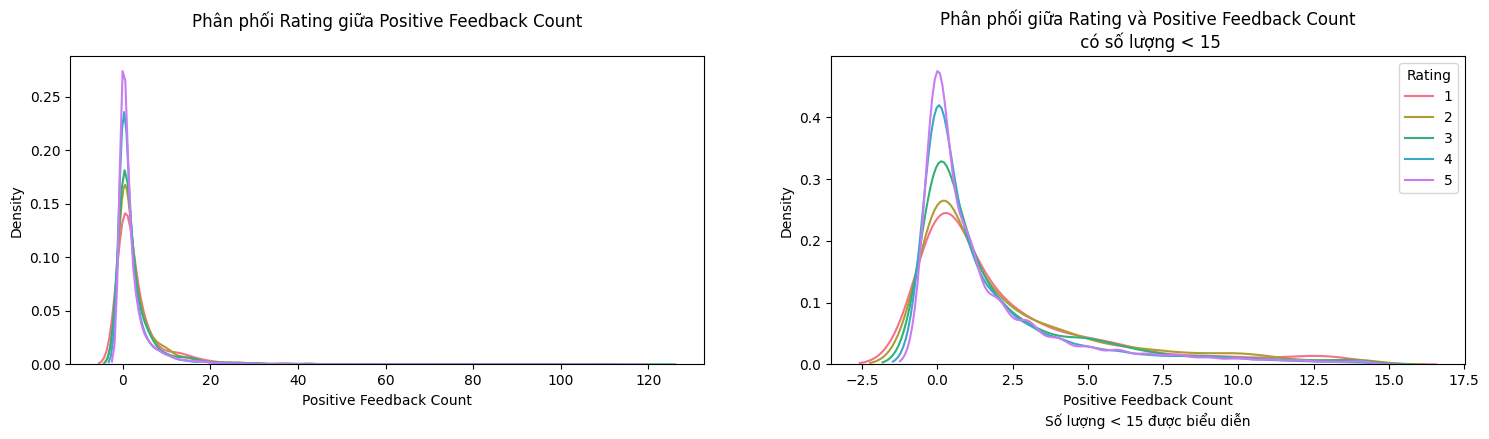

In [ ]:
plot_stacked_line(df_no14null, 'Positive Feedback Count', 'Rating')

**Nhận xét**

Số lượng feedback tích cực của các đối tượng tham gia đánh giá từ mức 1 đến 5 chỉ tăng cao ở mức 1 đến 10.

### 3.2.17+ Phân tích giữa Positive Feedback Count và Recommended IND

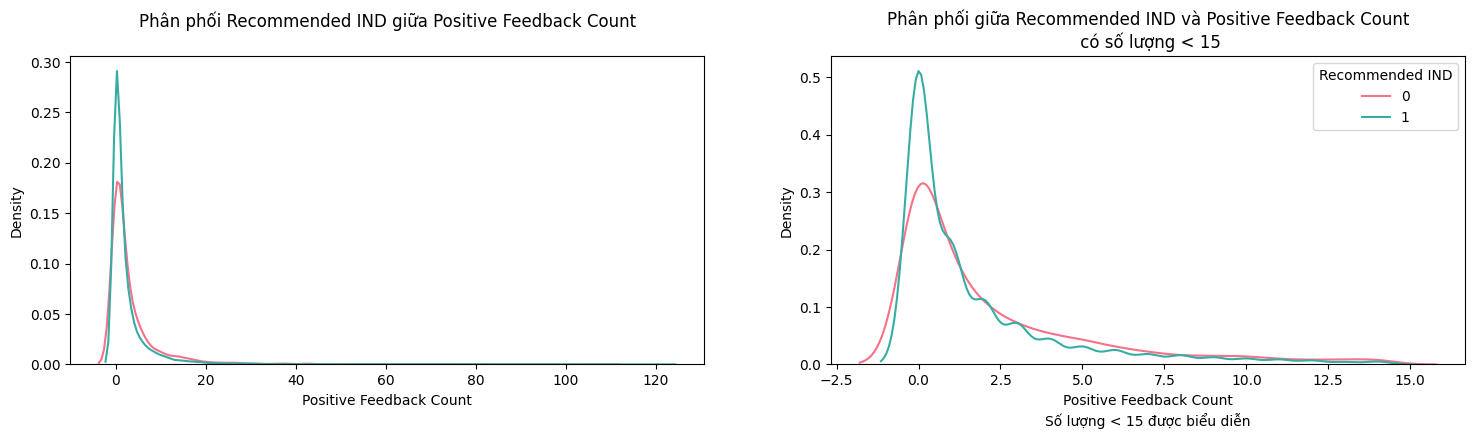

In [ ]:
plot_stacked_line(df_no14null, 'Positive Feedback Count', 'Recommended IND')

**Nhận xét**

Số lượng feedback tích cực của các đối tượng khuyến nghị và không khuyến nghị chỉ tăng cao ở mức 1 đến 10.

### 3.2.18+ Phân tích giữa Positive Feedback Count và Division Name

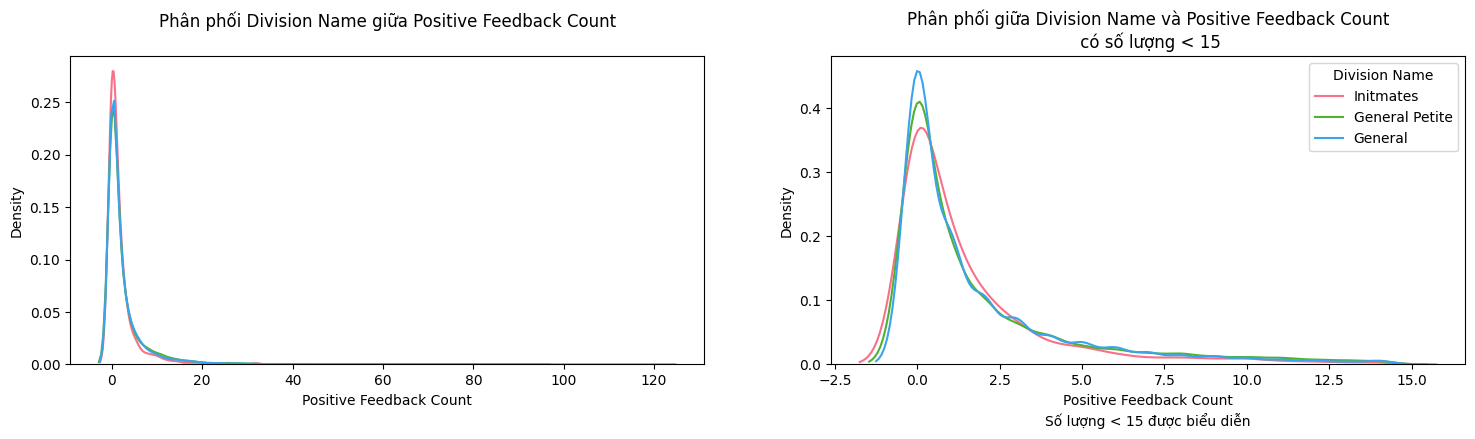

In [ ]:
plot_stacked_line(df_no14null, 'Positive Feedback Count', 'Division Name')

**Nhận Xét**

Số lượng feedback tích cực đối với chất lượng sản phẩm chỉ tăng cao ở mức 1 đến 10.

### 3.2.19+ Phân tích giữa Positive Feedback Count và Department Name

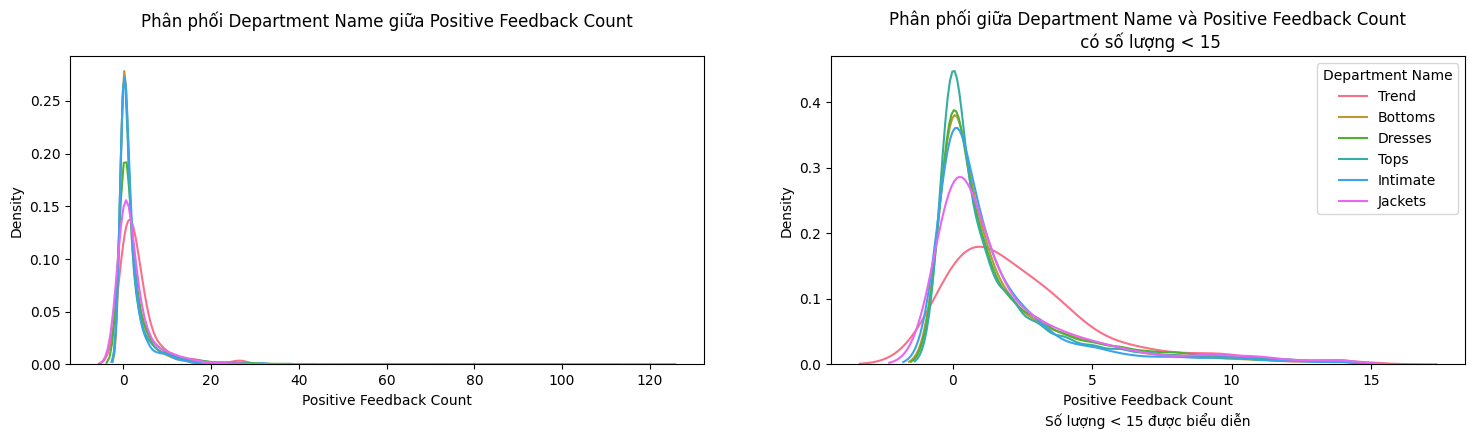

In [ ]:
plot_stacked_line(df_no14null, 'Positive Feedback Count', 'Department Name')

**Nhận Xét**

Số lượng feedback tích cực đối chỉ tăng cao ở mức 1 đến 10.

### 3.2.20+ Phân tích giữa Positive Feedback Count và Class Name

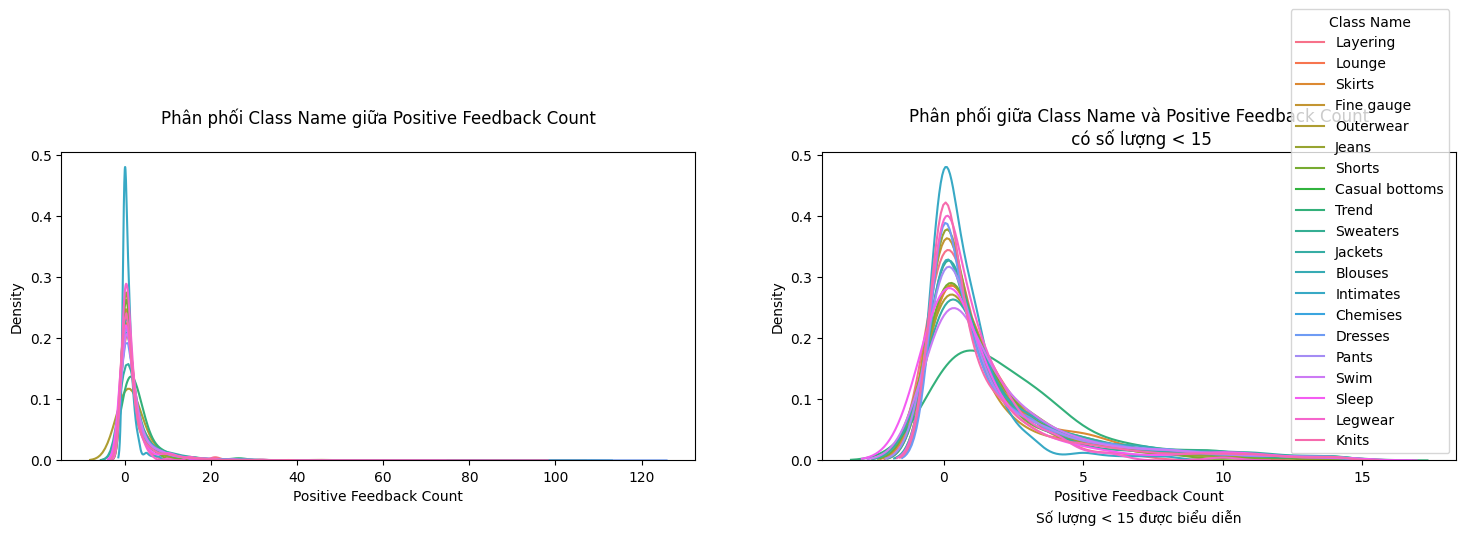

In [ ]:
plot_stacked_line(df_no14null, 'Positive Feedback Count', 'Class Name')

**Nhận xét**
Số lượng feedback tích cực đối với các loại sản phẩm chỉ tăng cao ở mức 1 đến 10.

### 3.2.21+ Phân tích giữa Recommended IND và Division Name

In [88]:
plot_stacked_hist_col(df_no14null, "Division Name", "Recommended IND")

    Division Name Recommended IND  Count
0         General               0   2493
1         General               1  10871
2  General Petite               0   1391
3  General Petite               1   6446
4       Initmates               0    217
5       Initmates               1   1209


**Nhận Xét**

- Division "General" có số lượng khách hàng được khuyến nghị (Recommend IND = 1) cao hơn đáng kể so với số lượng không được khuyến nghị (Recommend IND = 0). Điều này có thể cho thấy rằng sản phẩm và dịch vụ trong phân loại này thường nhận được sự đánh giá tích cực từ khách hàng hiện tại.
- Division "General Petite" cũng có một tỉ lệ tương đối tốt giữa khách hàng được khuyến nghị và không được khuyến nghị. Tuy nhiên, số lượng khách hàng được khuyến nghị vẫn cao hơn hẳn so với không được khuyến nghị.
- Division "Initmates" có một sự phân bổ khách hàng được khuyến nghị và không được khuyến nghị khá gần nhau, nhưng số lượng khách hàng được khuyến nghị vẫn cao hơn so với không được khuyến nghị.
- Doanh nghiệp có thể tập trung vào việc tăng cường chất lượng sản phẩm và dịch vụ trong phân loại "General", vì đây là phân loại thu hút nhiều sự khuyến nghị từ khách hàng.
- Đối với phân loại "General Petite" và "Initmates", cần tiếp tục theo dõi và phân tích phản hồi từ khách hàng để nắm bắt nhu cầu và mong muốn của họ, từ đó cải thiện và tối ưu hóa sản phẩm và dịch vụ một cách phù hợp.
- Cần xem xét các chiến lược tiếp thị và quảng bá để tăng cường sự nhận biết và uy tín của các sản phẩm và dịch vụ trong các phân loại này, đồng thời xây dựng một cộng đồng khách hàng hài lòng và trung thành.

### 3.2.22+ Phân tích giữa Recommended IND và Department Name

In [89]:
plot_stacked_hist_col(df_no14null, "Department Name", "Recommended IND")

   Department Name Recommended IND  Count
0          Bottoms               0    551
1          Bottoms               1   3110
2          Dresses               0   1197
3          Dresses               1   4948
4         Intimate               0    254
5         Intimate               1   1399
6          Jackets               0    167
7          Jackets               1    835
8             Tops               0   1902
9             Tops               1   8146
10           Trend               0     30
11           Trend               1     88


**Nhận xét**

- Trong các phân loại Bottoms, Dresses, Intimate, Jackets, Tops và Trend, số lượng khách hàng được khuyến nghị (Recommended IND = 1) đều cao hơn số lượng không được khuyến nghị (Recommended IND = 0). Điều này có thể cho thấy rằng các sản phẩm trong các phân loại này thường nhận được sự đánh giá tích cực từ khách hàng hiện tại.
- Tuy nhiên, cần chú ý rằng có một số phân loại như Trend có số lượng khách hàng được khuyến nghị và không được khuyến nghị thấp hơn so với các phân loại khác.
- Doanh nghiệp cần tiếp tục tối ưu hóa chất lượng và dịch vụ của các sản phẩm trong các phân loại Bottoms, Dresses, Intimate, Jackets, Tops và Trend để duy trì và tăng cường sự hài lòng của khách hàng.
- Cần đặc biệt chú ý đến việc nâng cao chất lượng dịch vụ và sản phẩm trong các phân loại có số lượng khách hàng được khuyến nghị thấp hơn, như Trend, để tăng cường sự đánh giá tích cực từ phía khách hàng và tạo ra lợi ích kinh doanh lâu dài.

### 3.2.23+ Phân tích giữa Recommended IND và Class NAme

In [90]:
plot_stacked_hist_col(df_no14null, "Class Name", "Recommended IND")

        Class Name Recommended IND  Count
0          Blouses               0    577
1          Blouses               1   2406
2   Casual bottoms               1      1
3         Chemises               1      1
4          Dresses               0   1197
5          Dresses               1   4948
6       Fine gauge               0    177
7       Fine gauge               1    882
8        Intimates               0     21
9        Intimates               1    126
10         Jackets               0    107
11         Jackets               1    576
12           Jeans               0    133
13           Jeans               1    970
14           Knits               0    868
15           Knits               1   3758
16        Layering               0     16
17        Layering               1    116
18         Legwear               0     23
19         Legwear               1    135
20          Lounge               0     95
21          Lounge               1    574
22       Outerwear               0

**Nhận xét**

- Trong hầu hết các loại sản phẩm, số lượng khách hàng được khuyến nghị (Recommended IND = 1) đều cao hơn so với số lượng không được khuyến nghị (Recommended IND = 0).
- Các loại sản phẩm như Dresses, Knits, Pants và Sweaters có số lượng khách hàng được khuyến nghị đáng kể, có thể là do chất lượng và sự hài lòng của khách hàng đối với các loại sản phẩm này.
- Doanh nghiệp nên tiếp tục tập trung vào việc cải thiện chất lượng và dịch vụ của các loại sản phẩm có số lượng khách hàng được khuyến nghị cao như Dresses, Knits, Pants và Sweaters để duy trì và tăng cường lòng trung thành của khách hàng.
- Cần tiếp tục nghiên cứu và phát triển các loại sản phẩm có số lượng khách hàng được khuyến nghị thấp hơn, như Casual bottoms, Chemises, để mở rộng cơ hội kinh doanh và thu hút thêm khách hàng mới.

### 3.2.24+ Phân tích giữa Division Name và Department Name

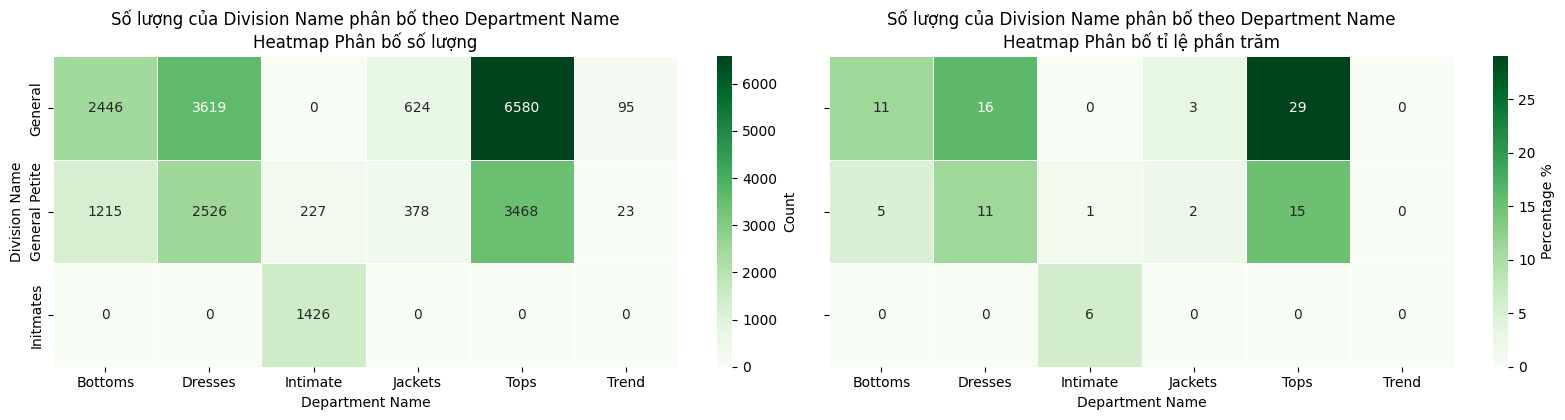

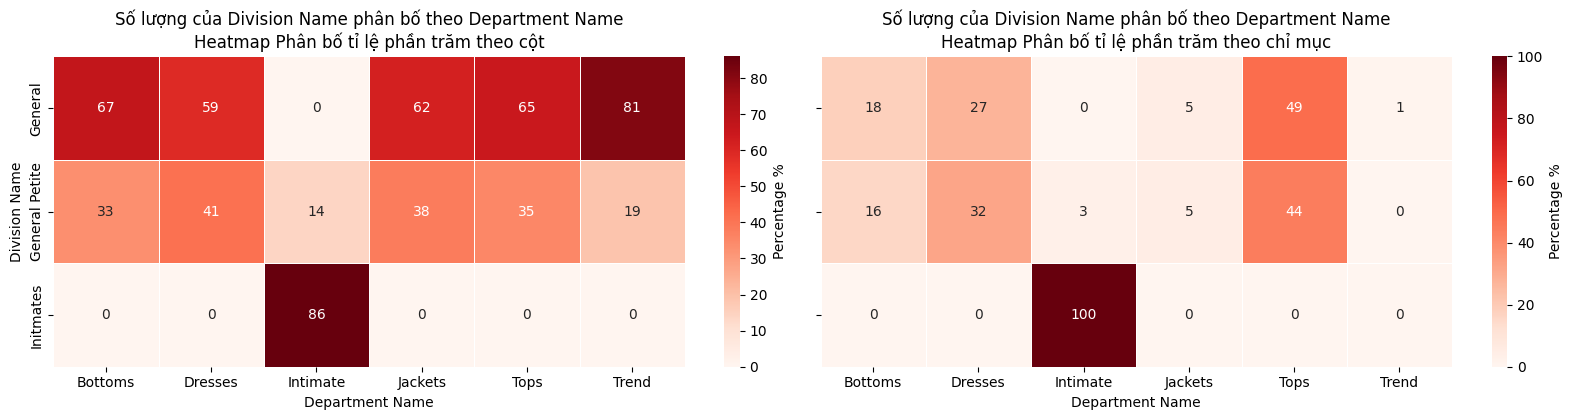

Department Name  Bottoms  Dresses  Intimate  Jackets  Tops  Trend
Division Name                                                    
General             11.0     16.0       0.0      3.0  29.0    0.0
General Petite       5.0     11.0       1.0      2.0  15.0    0.0
Initmates            0.0      0.0       6.0      0.0   0.0    0.0


In [96]:
plot_cor_two_cold(df_no14null, 'Division Name', 'Department Name')

**Nhận xét**

- Sản phẩm trong danh mục Bottoms và Dresses phân phối đều giữa các phân khúc thị trường General và General Petite.
- Có sự tập trung cao hơn vào sản phẩm Intimate trong phân khúc General Petite.
- Các sản phẩm Jackets, Tops, và Trend chủ yếu được phân phối trong phân khúc General.
- Sản phẩm Intimate chủ yếu được phân phối trong phân khúc Initmates.
- Tiếp tục duy trì và tăng cường cung cấp các sản phẩm Bottoms và Dresses để đáp ứng nhu cầu của cả hai phân khúc thị trường.
- Tập trung vào việc phát triển và quảng bá sản phẩm Intimate trong phân khúc General Petite để tối ưu hóa doanh số bán hàng.
- Xem xét lại chiến lược marketing và quảng cáo để thu hút sự chú ý và tăng doanh số bán hàng cho các sản phẩm Jackets, Tops, và Trend trong phân khúc General.
- Nắm bắt nhu cầu đặc biệt của khách hàng trong phân khúc Initmates và cải thiện sản phẩm và dịch vụ để tăng cường sự hài lòng của khách hàng.

### 3.2.25+ Phân tích giữa Division Name và Class Name

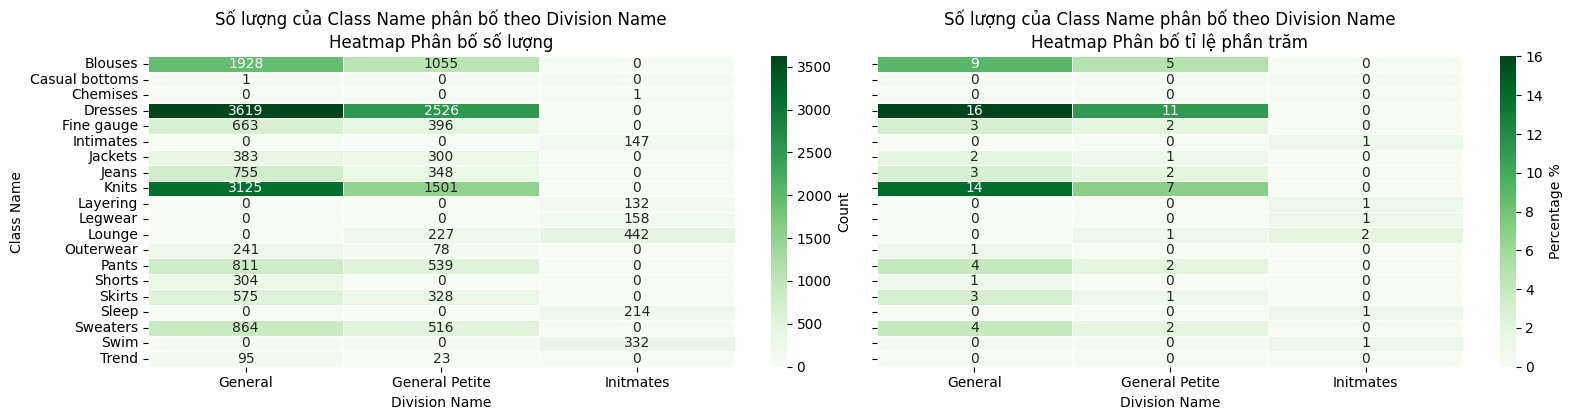

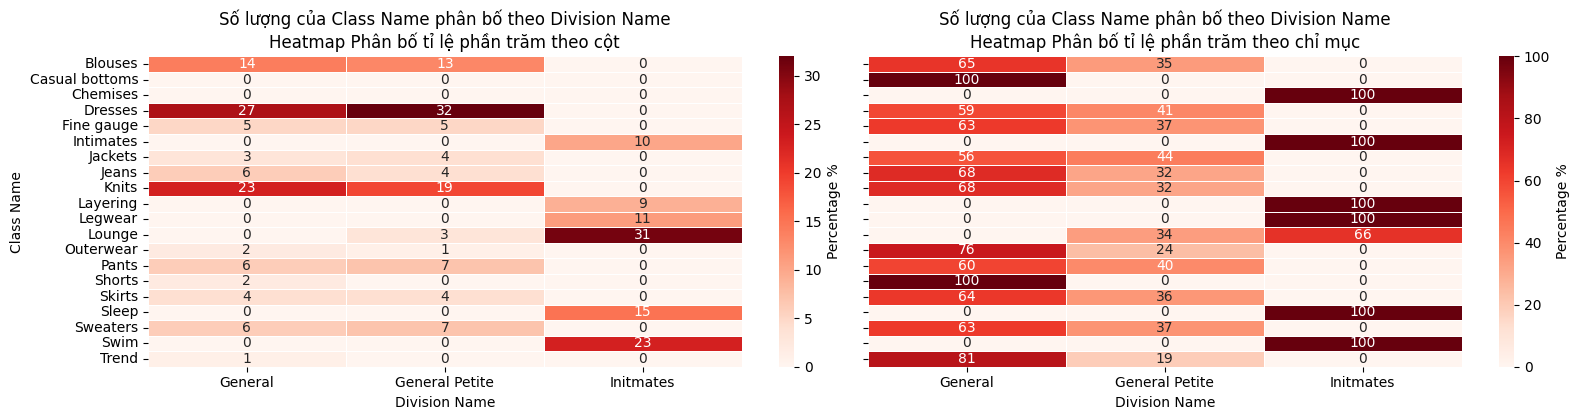

Division Name   General  General Petite  Initmates
Class Name                                        
Blouses             9.0             5.0        0.0
Casual bottoms      0.0             0.0        0.0
Chemises            0.0             0.0        0.0
Dresses            16.0            11.0        0.0
Fine gauge          3.0             2.0        0.0
Intimates           0.0             0.0        1.0
Jackets             2.0             1.0        0.0
Jeans               3.0             2.0        0.0
Knits              14.0             7.0        0.0
Layering            0.0             0.0        1.0
Legwear             0.0             0.0        1.0
Lounge              0.0             1.0        2.0
Outerwear           1.0             0.0        0.0
Pants               4.0             2.0        0.0
Shorts              1.0             0.0        0.0
Skirts              3.0             1.0        0.0
Sleep               0.0             0.0        1.0
Sweaters            4.0        

In [97]:
plot_cor_two_cold(df_no14null,  'Class Name', 'Division Name')

**Nhận xét**

- Sản phẩm Blouses, Dresses, và Knits có sự phân phối đều giữa các phân khúc General và General Petite.
- Các sản phẩm Jackets và Jeans có sự tập trung cao hơn trong phân khúc General.
- Sản phẩm Intimates, Layering, Legwear, và Sleep chủ yếu được phân phối trong phân khúc Initmates.
- Tiếp tục duy trì và tăng cường cung cấp các sản phẩm Blouses, Dresses, và Knits để đáp ứng nhu cầu của cả hai phân khúc thị trường.
- Tập trung vào việc phát triển và quảng bá sản phẩm Jackets và Jeans trong phân khúc General để tối ưu hóa doanh số bán hàng.
- Nắm bắt nhu cầu đặc biệt của khách hàng trong phân khúc Initmates và cải thiện sản phẩm và dịch vụ để tăng cường sự hài lòng của khách hàng.

### 3.2.26+ Phân tích giữa Department Name và Class Name

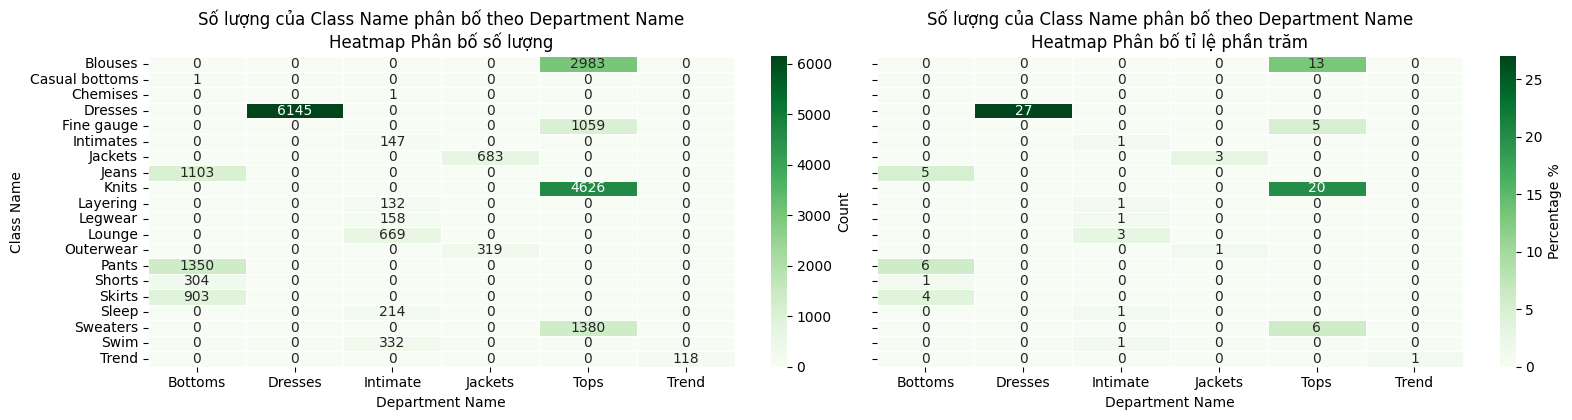

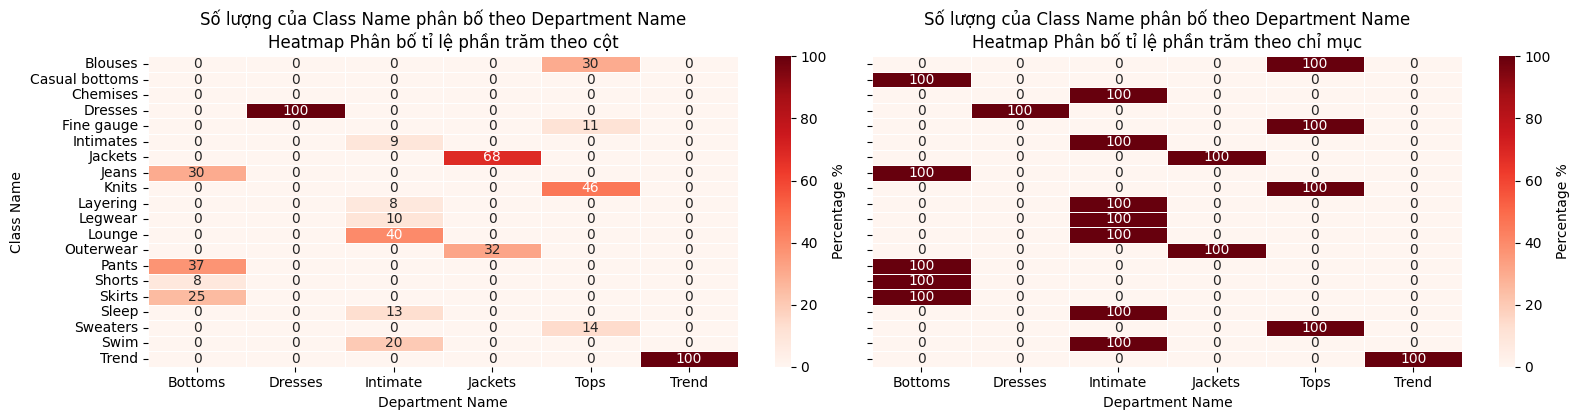

Department Name  Bottoms  Dresses  Intimate  Jackets  Tops  Trend
Class Name                                                       
Blouses              0.0      0.0       0.0      0.0  13.0    0.0
Casual bottoms       0.0      0.0       0.0      0.0   0.0    0.0
Chemises             0.0      0.0       0.0      0.0   0.0    0.0
Dresses              0.0     27.0       0.0      0.0   0.0    0.0
Fine gauge           0.0      0.0       0.0      0.0   5.0    0.0
Intimates            0.0      0.0       1.0      0.0   0.0    0.0
Jackets              0.0      0.0       0.0      3.0   0.0    0.0
Jeans                5.0      0.0       0.0      0.0   0.0    0.0
Knits                0.0      0.0       0.0      0.0  20.0    0.0
Layering             0.0      0.0       1.0      0.0   0.0    0.0
Legwear              0.0      0.0       1.0      0.0   0.0    0.0
Lounge               0.0      0.0       3.0      0.0   0.0    0.0
Outerwear            0.0      0.0       0.0      1.0   0.0    0.0
Pants     

In [98]:
plot_cor_two_cold(df_no14null,  'Class Name', 'Department Name')

- Sản phẩm Tops chiếm tỷ lệ cao trong bộ phận Dresses.
- Sản phẩm Knits chiếm tỷ lệ cao trong bộ phận Tops.
- Sản phẩm Pants chiếm tỷ lệ cao trong bộ phận Bottoms.
- Tối ưu hóa việc cung cấp các sản phẩm Tops để đáp ứng nhu cầu của bộ phận Dresses.
- Tăng cường cung cấp các sản phẩm Knits để tối ưu hóa bộ phận Tops.
- Tập trung vào việc cung cấp sản phẩm Pants để tối ưu hóa bộ phận Bottoms.

### 3.2.27+ Phân tích giữa Sentiment và Recommend ID

In [99]:
plot_stacked_hist_col(df_norm, "Sentiment", "Recommended IND")

  Sentiment Recommended IND  Count
0  Negative               0    572
1  Negative               1    938
2   Neutral               0    616
3   Neutral               1   1717
4  Positive               0   2267
5  Positive               1  13318


**Nhận xét**
- Có một số lượng lớn phản hồi tích cực từ cả hai nhóm khuyến nghị và không khuyến nghị.
- Số lượng phản hồi tiêu cực từ nhóm không khuyến nghị cao hơn so với nhóm khuyến nghị.
- Tập trung vào việc cải thiện trải nghiệm của khách hàng không hài lòng để giảm số lượng phản hồi tiêu cực từ nhóm không khuyến nghị.
- Tiếp tục duy trì và nâng cao chất lượng dịch vụ để duy trì sự hài lòng của khách hàng khuyến nghị và tăng cường sự ủng hộ từ nhóm này.

### 3.2.28+ Phân tích giữa Sentiment và Rating

In [100]:
plot_stacked_hist_col(df_norm, "Sentiment", "Rating")

   Sentiment Rating  Count
0   Negative      1    139
1   Negative      2    230
2   Negative      3    308
3   Negative      4    315
4   Negative      5    518
5    Neutral      1    141
6    Neutral      2    243
7    Neutral      3    351
8    Neutral      4    593
9    Neutral      5   1005
10  Positive      1    394
11  Positive      2    855
12  Positive      3   1704
13  Positive      4   3355
14  Positive      5   9277


**Nhận xét**
- Số lượng phản hồi tích cực tăng dần khi xếp hạng tăng, từ xếp hạng 1 đến 5.
- Số lượng phản hồi tiêu cực cũng tăng dần khi xếp hạng tăng, tuy nhiên, tỉ lệ tăng không nhanh như phản hồi tích cực.
- Tập trung vào việc duy trì và nâng cao chất lượng dịch vụ để tăng cường sự hài lòng của khách hàng, đặc biệt là trong những trường hợp có xếp hạng cao.
- Tiếp tục theo dõi và xử lý các phản hồi tiêu cực một cách kịp thời để cải thiện trải nghiệm của khách hàng và giảm thiểu số lượng phản hồi tiêu cực trong tương lai.

### 3.2.29+ Phân tích giữa Clothing ID và Polarity

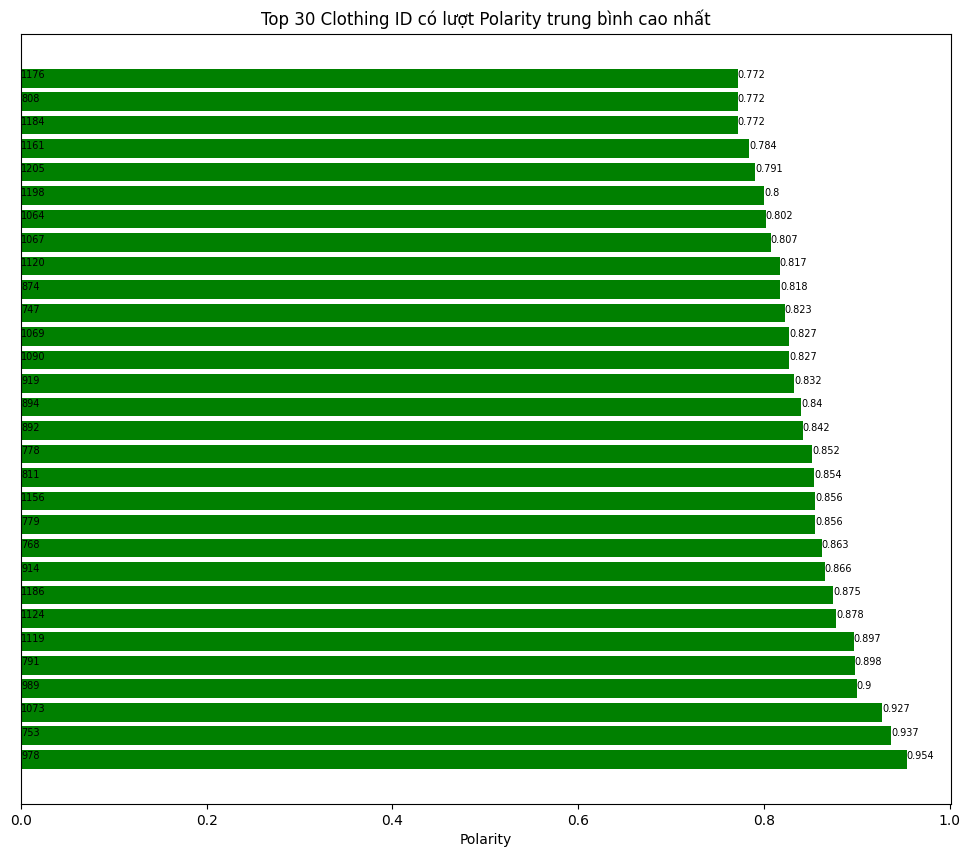

    Clothing ID  Polarity
453         978  0.953800
452         753  0.937100
451        1073  0.927400
450         989  0.900100
449         791  0.897900
448        1119  0.896783
447        1124  0.877900
446        1186  0.875000
445         914  0.865650
444         768  0.862500
442         779  0.855500
443        1156  0.855500
441         811  0.854250
440         778  0.851900
439         892  0.841750
438         894  0.840200
437         919  0.832400
435        1090  0.827100
436        1069  0.827100
434         747  0.822500
433         874  0.817600
432        1120  0.816900
431        1067  0.807400
430        1064  0.802000
429        1198  0.800450
428        1205  0.790600
427        1161  0.784500
424        1184  0.771700
425         808  0.771700
426        1176  0.771700


In [ ]:
cp = df_norm[df_norm['Clothing ID'].between(730, 1206)]
plot_hist_v(cp, 'Clothing ID', 'Polarity', 30)

**Nhận Xét**
- Danh sách các sản phẩm có lượt Polarity trung bình cao nhất có mã số lớn hơn 730
- Tiếp tục theo dõi và phân tích các sản phẩm được đánh giá tích cực cao để hiểu rõ hơn về những yếu tố nào làm cho chúng phổ biến và được yêu thích bởi khách hàng.
- Xem xét việc tăng cường sản xuất hoặc cung cấp các sản phẩm được đánh giá tích cực cao để đáp ứng nhu cầu của thị trường và tăng doanh số bán hàng.






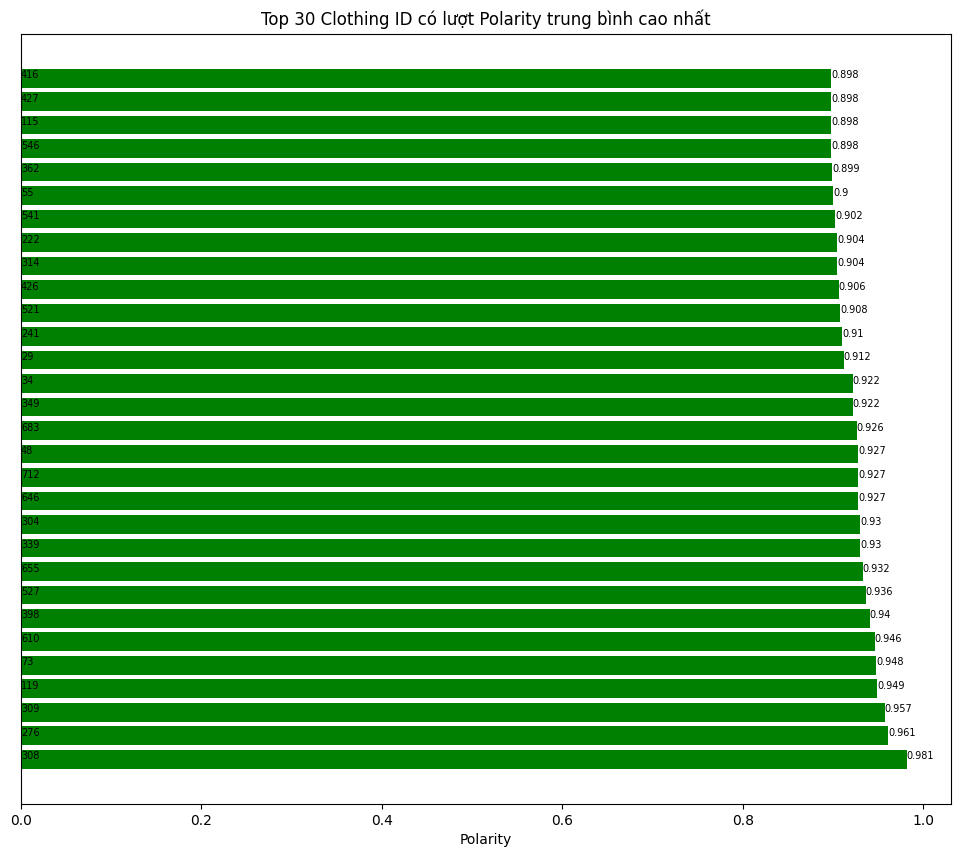

    Clothing ID  Polarity
638         308   0.98140
637         276   0.96070
636         309   0.95710
635         119   0.94850
634          73   0.94770
633         610   0.94600
632         398   0.94030
631         527   0.93600
630         655   0.93250
628         339   0.93000
629         304   0.93000
625         646   0.92740
626         712   0.92740
627          48   0.92740
624         683   0.92600
622         349   0.92170
623          34   0.92170
621          29   0.91180
620         241   0.91005
619         521   0.90810
618         426   0.90620
616         314   0.90420
617         222   0.90420
615         541   0.90220
614          55   0.90010
613         362   0.89865
609         546   0.89790
610         115   0.89790
611         427   0.89790
612         416   0.89790


In [ ]:
cp2 = df_norm[df_norm['Clothing ID'].between(0, 730)]
plot_hist_v(cp2, 'Clothing ID', 'Polarity', 30)

**Nhận xét**

- Danh sách các sản phẩm có lượt Polarity trung bình cao nhất có mã số bé hơn 730
- Tiếp tục theo dõi và phân tích các sản phẩm được đánh giá tích cực cao để hiểu rõ hơn về những yếu tố nào làm cho chúng phổ biến và được yêu thích bởi khách hàng.
- Xem xét việc tăng cường sản xuất hoặc cung cấp các sản phẩm được đánh giá tích cực cao để đáp ứng nhu cầu của thị trường và tăng doanh số bán hàng.

## 3.3 Phân tích đa biến

### 3.3.1+ Phân tích phân phối giữa Age, Positive Feedback Count và Recommended IND

In [ ]:
px.scatter(df_no14null, x="Age", y="Positive Feedback Count", facet_row="Recommended IND", template = "simple_white",
           facet_col="Rating",trendline="ols",category_orders={"Rating": [1,2,3,4,5],'Recommended IND':[0,1]})

**Nhận xét**

- Phần lớn các đánh giá từ khách hàng ở mọi độ tuổi đều tích cực và được khuyến nghị. Điều này cho thấy sự ủng hộ mạnh mẽ đối với sản phẩm và dịch vụ của doanh nghiệp.
- Tập trung đông nhất của khách hàng nằm trong nhóm độ tuổi từ 30 đến 50, đặc biệt là người 39 tuổi có mức khuyến nghị vượt trội hơn. Đây là dấu hiệu cho thấy sản phẩm có sức hấp dẫn đặc biệt đối với nhóm độ tuổi này.
- Mặc dù có một số lượng nhỏ các đánh giá không khuyến nghị, nhưng chúng chỉ chiếm 1/4 so với số lượng đánh giá tích cực, vẫn thể hiện sự ủng hộ đáng kể từ đa số khách hàng.
- Cần chú ý đến việc nghiên cứu cấu trúc văn bản của các đánh giá tích cực để hiểu rõ hơn về yếu tố nào được khách hàng đánh giá cao. Điều này giúp doanh nghiệp cải thiện sản phẩm và dịch vụ, tạo ra ảnh hưởng tích cực đối với thương hiệu.
- Số lượng feedback tích cực từ cả đối tượng khuyến nghị và không khuyến nghị chỉ tăng cao ở mức điểm 1 đến 10, cho thấy mức độ hài lòng tổng thể từ các khách hàng.
- Như vậy, để tối ưu hóa chiến lược tiếp thị và phát triển doanh nghiệp, ngoài việc tiếp tục tập trung vào nhóm độ tuổi từ 30 đến 50, doanh nghiệp cũng nên nghiên cứu các đánh giá tích cực chi tiết hơn và tạo ra các biện pháp cải thiện sản phẩm và dịch vụ dựa trên thông tin thu thập được.

### 3.3.2+ Phân tích phân phối giữa Age, Department Name và Recommended IND

In [ ]:
px.violin(df_no14null, x="Age", y="Department Name", orientation="h", color="Recommended IND", template = "simple_white")

**Nhận Xét**

- Phần lớn các đánh giá từ khách hàng ở mọi độ tuổi đều tích cực và được khuyến nghị. Điều này thể hiện sự hài lòng và ủng hộ đối với sản phẩm và dịch vụ của doanh nghiệp.
- Nhóm độ tuổi 30 đến 50 là nhóm đối tượng chính mà doanh nghiệp nên tập trung quảng bá và tiếp cận. Điều đáng chú ý, người 39 tuổi có tỷ lệ khuyến nghị cao nhất, gợi ý rằng sản phẩm có sức hấp dẫn đặc biệt đối với nhóm độ tuổi này.
- Dữ liệu cũng cho thấy tỷ lệ đánh giá không khuyến nghị chỉ chiếm 1/4 so với số lượng đánh giá tích cực, cho thấy sản phẩm vẫn nhận được sự ủng hộ tích cực từ đa số khách hàng.
- Đề xuất cho doanh nghiệp là tiếp tục tập trung vào nhóm độ tuổi từ 30 đến 50 trong chiến lược tiếp thị. Tuy nhiên, cũng không nên bỏ qua các đối tượng khác để tăng cường sự đa dạng và mở rộng thị trường.
- Độ tuổi có ảnh hưởng đáng kể đến sự quan tâm đến các bộ phận cụ thể của cửa hàng. Đối với các sản phẩm Bottoms, Dresses, Intimate, Jackets, Tops và Trend, cần tùy chỉnh chiến lược tiếp thị phù hợp với từng nhóm độ tuổi.
- Trong số các phân loại sản phẩm, cần tiếp tục tối ưu hóa chất lượng và dịch vụ của các sản phẩm để duy trì và tăng cường sự hài lòng của khách hàng.
- Đặc biệt, cần chú ý đến việc nâng cao chất lượng dịch vụ và sản phẩm trong các phân loại có số lượng khách hàng được khuyến nghị thấp hơn, như Trend, để tăng cường sự đánh giá tích cực từ phía khách hàng và tạo ra lợi ích kinh doanh lâu dài.

### 3.3.3+ Phân tích phân phối giữa Age, Division Name và Recommended IND

In [ ]:
px.box(df_no14null, x="Age", y="Division Name", orientation="h",color = 'Recommended IND', template = "simple_white")

**Nhận xét**

- Phần lớn các đánh giá từ khách hàng ở mọi độ tuổi đều tích cực và được khuyến nghị. Điều này thể hiện sự hài lòng và ủng hộ đối với sản phẩm và dịch vụ của doanh nghiệp.
- Nhóm độ tuổi 30 đến 50 là nhóm đối tượng chính mà doanh nghiệp nên tập trung quảng bá và tiếp cận. Điều đáng chú ý, người 39 tuổi có tỷ lệ khuyến nghị cao nhất, gợi ý rằng sản phẩm có sức hấp dẫn đặc biệt đối với nhóm độ tuổi này.
- Dữ liệu cũng cho thấy tỷ lệ đánh giá không khuyến nghị chỉ chiếm 1/4 so với số lượng đánh giá tích cực, cho thấy sản phẩm vẫn nhận được sự ủng hộ tích cực từ đa số khách hàng.
- Đề xuất cho doanh nghiệp là tiếp tục tập trung vào nhóm độ tuổi từ 30 đến 50 trong chiến lược tiếp thị. Tuy nhiên, cũng không nên bỏ qua các đối tượng khác để tăng cường sự đa dạng và mở rộng thị trường.
- Phân tích dữ liệu phân bổ quan tâm của khách hàng đối với các phân loại cửa hàng theo độ tuổi cũng gợi ý cho doanh nghiệp nên tăng cường tiếp cận và tiếp thị sản phẩm trong phân loại "General", đặc biệt là đối với nhóm độ tuổi từ 10 đến 69.
- Đối với các phân loại như "General Petite" và "Initmates", cần tiếp tục theo dõi và phân tích phản hồi từ khách hàng để cải thiện chất lượng sản phẩm và dịch vụ, đồng thời xây dựng một cộng đồng khách hàng hài lòng và trung thành.
- Trong số các division, "General" nổi bật với số lượng khách hàng được khuyến nghị cao hơn đáng kể so với không được khuyến nghị. Điều này gợi ý rằng doanh nghiệp nên tăng cường chất lượng sản phẩm và dịch vụ trong phân loại này để thu hút sự quan tâm và sự ủng hộ từ khách hàng.

### 3.3.4+ Phân tích phân phối giữa Rating, Positive Feedback Count  và Recommended IND

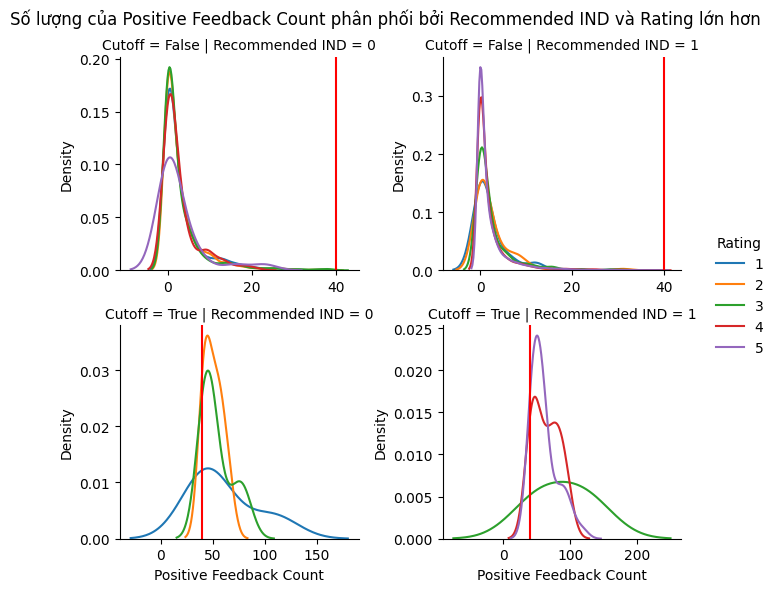

In [ ]:
def plot_line_stack_3(data, col1, col2, col3, value):
  data = df.copy()
  df["Cutoff"] = df[col2] >= value
  g = sns.FacetGrid(df, row = "Cutoff", col=col3, hue=col1, aspect=1.1, sharey=False, sharex=False)
  g.map(sns.distplot, col2, hist=False)
  g.add_legend()
  g.axes[0,0].set_ylabel('Density')
  g.axes[1,0].set_ylabel('Density')
  plt.subplots_adjust(top=0.90)
  g.fig.suptitle('Số lượng của {} phân phối bởi {} và {} lớn hơn '.format(col2, col3, col1, value))

  for x in [0,1]:
      for y in [0,1]:
          g.axes[x,y].axvline(x=40, c="r")

  plt.show()

plot_line_stack_3(df_no14null, "Rating", "Positive Feedback Count", "Recommended IND", 40)

**Nhận Xét**

- Dựa trên dữ liệu, ta nhận thấy rằng có một tỷ lệ lớn hơn giữa người dùng khuyến nghị (Recommended IND 1) so với người dùng không khuyến nghị (Recommended IND 0), cho thấy rằng phần lớn người dùng đều khuyến nghị sản phẩm. Trong nhóm người dùng khuyến nghị, đa số đánh giá sản phẩm với các mức cao như 4 và 5, trong khi đối với nhóm người dùng không khuyến nghị, có sự phân phối đồng đều hơn giữa các mức đánh giá, nhưng vẫn có nhiều người dùng đánh giá trung bình.
- Tiếp tục duy trì và cải thiện chất lượng sản phẩm để giữ vững lòng tin của khách hàng, đặc biệt là tập trung vào các yếu tố được đánh giá cao như chất lượng và trải nghiệm sản phẩm.
- Tập trung vào việc thu thập phản hồi từ những người dùng không khuyến nghị để hiểu rõ hơn về những vấn đề và điều chỉnh sản phẩm hoặc dịch vụ sao cho phù hợp hơn với mong muốn của họ.
- Nắm bắt phản hồi tích cực từ những người dùng khuyến nghị để tăng cường điểm mạnh của sản phẩm và tạo ra sự hài lòng lâu dài cho khách hàng.
- Đồng thời, cần chú ý rằng số lượng phản hồi tích cực từ các đối tượng tham gia đánh giá từ mức 1 đến 5 chỉ tăng cao ở mức 1 đến 10. Điều này có thể cho thấy cần có sự tập trung đặc biệt vào việc cải thiện các mặt hàng được đánh giá thấp hơn để nâng cao chất lượng tổng thể của sản phẩm hoặc dịch vụ.

### 3.3.5+ Phân tích Sentiment, Department Name, Recommended IND và Ratting

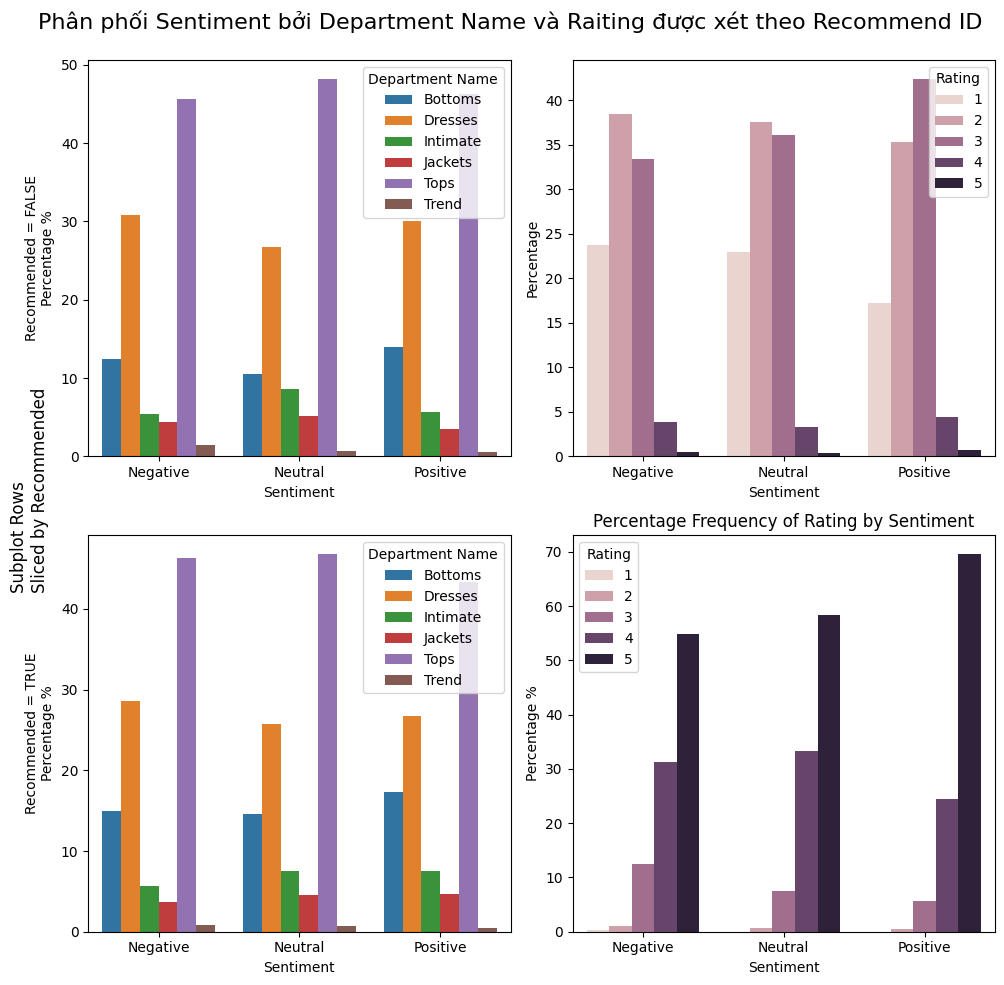

In [ ]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

def plot_hist_4_col(df, col1, col2, col3, col4):
  xvar = "Sentiment"
  huevar = "Department Name"
  rowvar = "Recommended IND"

  f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
  for i,x in enumerate(set(df[col3][df[col3].notnull()])):
      percentstandardize_barplot(x=col1,y="Percentage", hue=col2 ,data=df[df[col3] == x], ax=axes[i,0], order=["Negative","Neutral","Positive"])
      percentstandardize_barplot(x=col1,y="Percentage", hue="Rating",data=df[df[col3] == x], ax=axes[i,1], order=["Negative","Neutral","Positive"])

  axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
  axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")

  f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
  f.suptitle("Phân phối Sentiment bởi Department Name và Raiting được xét theo Recommend ID", fontsize=16)
  f.tight_layout()
  f.subplots_adjust(top=0.93)
  plt.show()

plot_hist_4_col(df_norm, "Sentiment", "Department Name", "Recommended IND", "Rating")

**Nhận xét**

- Dữ liệu đánh giá từ người dùng cho thấy một xu hướng rõ ràng: khi xếp hạng sản phẩm tăng lên, số lượng phản hồi tích cực cũng tăng. Điều này cho thấy người dùng đang đánh giá cao sản phẩm khi họ thấy được giá trị và chất lượng từ nó. Tuy nhiên, cũng cần lưu ý rằng số lượng phản hồi tiêu cực cũng tăng theo cùng xu hướng, mặc dù không nhanh bằng.
- Khi phân tích theo nhóm khuyến nghị và không khuyến nghị, có một điểm đáng chú ý: tỷ lệ người dùng khuyến nghị cao hơn so với những người không khuyến nghị. Điều này cho thấy sản phẩm nhận được sự ủng hộ rộng rãi từ cả hai nhóm người dùng, nhưng đặc biệt là từ nhóm người dùng khuyến nghị.
- Tiếp tục tăng cường chất lượng sản phẩm và dịch vụ để đáp ứng và vượt qua kỳ vọng của khách hàng.
- Tạo điều kiện thuận lợi cho việc thu thập phản hồi từ cả nhóm người dùng khuyến nghị và không khuyến nghị để hiểu rõ hơn về nhu cầu và mong muốn của họ.
- Tận dụng phản hồi tích cực từ nhóm người dùng khuyến nghị để tăng cường điểm mạnh của sản phẩm và tạo ra một trải nghiệm mua sắm đáng nhớ.
- Với việc chú trọng vào sự cải thiện liên tục và lắng nghe ý kiến phản hồi của khách hàng, doanh nghiệp có thể xây dựng một cộng đồng hài lòng và trung thành xung quanh sản phẩm của mình.

### 3.3.6+ Phân tích tương quan giữa các cột

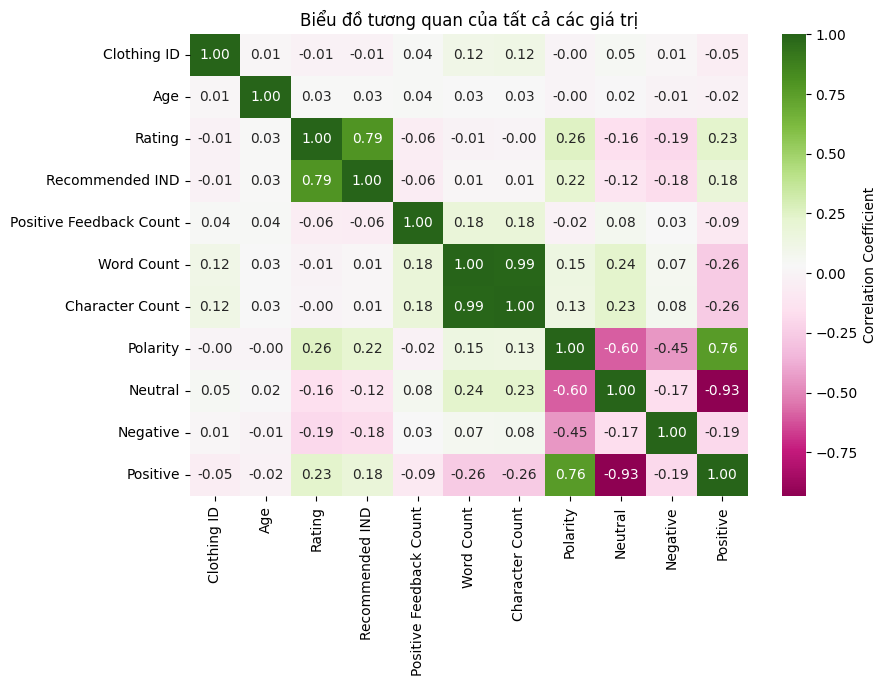

                         Clothing ID       Age    Rating  Recommended IND  \
Clothing ID                 1.000000  0.012074 -0.013399        -0.013548   
Age                         0.012074  1.000000  0.034136         0.034083   
Rating                     -0.013399  0.034136  1.000000         0.793043   
Recommended IND            -0.013548  0.034083  0.793043         1.000000   
Positive Feedback Count     0.041811  0.041234 -0.057933        -0.060443   
Word Count                  0.115417  0.027194 -0.007021         0.012178   
Character Count             0.116632  0.029225 -0.002610         0.013511   
Polarity                   -0.002399 -0.001640  0.258532         0.220119   
Neutral                     0.048393  0.019991 -0.162821        -0.117078   
Negative                    0.014368 -0.011303 -0.191480        -0.178674   
Positive                   -0.053344 -0.015837  0.230974         0.180834   

                         Positive Feedback Count  Word Count  Character Cou

In [ ]:
def plot_correlation(data):
  df = data.copy()
  columns_to_drop = ['Title', 'Title_lemmatized', 'Review Text', 'Review Text_lemmatized',
                     'Sentiment', 'Class Name', 'Division Name', 'Department Name']
  df = df.drop(columns=columns_to_drop)
  f, ax = plt.subplots(figsize=[9,6])
  ax = sns.heatmap(df.corr(), annot=True, cmap='PiYG', fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
  ax.set_title("Biểu đồ tương quan của tất cả các giá trị")
  plt.show()
  print(df.corr())

plot_correlation(df_norm)

**Nhận xét**

- Tuổi (Age) và Rating: Không có mối tương quan đáng kể giữa tuổi và xếp hạng sản phẩm (Rating), với hệ số tương quan là chỉ 0.034. Điều này ngụ ý rằng đánh giá của người dùng không phụ thuộc vào độ tuổi của họ.
- Rating và Recommended IND: Có một mối tương quan mạnh mẽ (hệ số tương quan là 0.793) giữa xếp hạng sản phẩm và việc khuyến nghị sản phẩm (Recommended IND). Điều này cho thấy rằng các đánh giá tích cực thường đi kèm với việc khuyến nghị sản phẩm.
- Positive Feedback Count và Rating: Có một mối tương quan âm nhưng không mạnh mẽ giữa số lượng phản hồi tích cực và xếp hạng sản phẩm, với hệ số tương quan là -0.057. Điều này có thể ngụ ý rằng các đánh giá tích cực không nhất thiết phản ánh sự hài lòng chung từ người dùng.
- Word Count và Character Count: Có một mối tương quan rất mạnh (hệ số tương quan lớn hơn 0.98) giữa số lượng từ và số lượng ký tự trong các đánh giá. Điều này là hiển nhiên vì số từ và số ký tự thường đi đôi với nhau trong văn bản.
- Neutral, Negative, Positive và Polarity: Các yếu tố liên quan đến cảm xúc trong đánh giá (Neutral, Negative, Positive) và động lực của chúng (Polarity) có mối tương quan khá cao với nhau. Điều này cho thấy các người dùng thường thể hiện ý kiến cảm xúc một cách đồng đều trong các đánh giá của họ.
- Tăng cường việc khuyến nghị sản phẩm để thúc đẩy đánh giá tích cực từ người dùng.
- Tập trung vào việc thu thập phản hồi để hiểu rõ hơn về ý kiến của khách hàng và điều chỉnh sản phẩm/phục vụ một cách phù hợp.
- Duy trì và nâng cao chất lượng sản phẩm và dịch vụ dựa trên thông tin phản hồi từ khách hàng.

# Phần 4. Khai phá dữ liệu

## 4.1 Phương pháp N Gram

### 4.1.1* Các hàm có liên quan đến phương pháp NGram

In [102]:
def tokenize_with_progress(column):
    progress_bar = tqdm(total=len(column), desc="Tokenizing", position=0)
    def tokenize(column):
        tokens = word_tokenize(column)
        return [w for w in tokens if w.isalpha()]
    def process_row(row):
        progress_bar.update(1)
        return tokenize(row)
    result = column.apply(process_row)
    progress_bar.close()
    return result

def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

def combine_words(word_list):
    all_words = []
    for word in word_list: all_words += word
    return all_words

def count_topwords(all_words, n):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending =False)
    word_count_sorted
    return word_count_sorted[:n]

def plot_ngam(df, col, n):
  reviews = df[col]
  reviews_words = combine_words(reviews)
  reviews_topword_count = count_topwords(reviews_words, n)
  plt.figure(figsize= (18,10))
  sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )
  plt.xticks(rotation=90)
  plt.show()
  print(reviews_topword_count)

def plot_tree_map_ngram(df, col, n):
  reviews = df[col]
  reviews_words = combine_words(reviews)
  reviews_topword_count = count_topwords(reviews_words, n)
  fig = px.treemap( reviews_topword_count, path=['words'], values='word_count')
  fig.update_layout(title_text="", title_x=0.5, title_font=dict(size=20))
  fig.update_traces(textinfo="label+value")
  fig.show()
  sorted_df = reviews_topword_count.sort_values(by='word_count', ascending=False)
  sorted_df_ids = sorted_df['words'].tolist()
  print(sorted_df.to_string())


### 4.1.2* Chuẩn bị dữ liệu cho NGram

In [7]:
df_norm['cleaned'] = df_norm['Title_lemmatized'].str.cat(df_norm['Review Text_lemmatized'], sep=' ')
df_norm['cleaned'] = df_norm['cleaned'].astype(str)
df_norm['cleaned_token'] = tokenize_with_progress(df_norm['cleaned'])
df_norm['unigram'] = df_norm['cleaned_token'].apply(lambda x: extract_ngrams(x, 1))
df_norm['bigram'] = df_norm['cleaned_token'].apply(lambda x: extract_ngrams(x, 2))
df_norm['trigram'] = df_norm['cleaned_token'].apply(lambda x: extract_ngrams(x, 3))

Tokenizing: 100%|██████████| 19428/19428 [00:07<00:00, 2606.00it/s]


### 4.1.3+ Hiển thị 50 Unigram

In [103]:
plot_tree_map_ngram(df_norm, 'unigram', 50)

       words  word_count
3      dress       11348
24      love       11165
9       size        9414
63      look        8091
55     color        6613
114      fit        6010
104      ism        4994
7      order        4292
135   beauti        4009
36      wear        3781
23       buy        3609
15   comfort        3316
31   flatter        3211
204     cute        3096
99       run        3056
194    think        2907
169      get        2743
32     shirt        2738
5       work        2645
116     feel        2636
251  sweater        2559
74     littl        2534
72       tri        2519
95       bit        2418
120   fabric        2353
44    pretti        2299
110   materi        2254
35    length        2205
47     skirt        2094
67        go        1987
8      petit        1935
165    waist        1874
57     style        1857
126   review        1853
13    medium        1823
94      long        1797
279      cut        1788
65     store        1787
177      way        1783


**Nhận Xét**

- Các Từ Phổ Biến: Có một số từ phổ biến xuất hiện trong các đánh giá như "dress", "love", "size", "look", "color", "fit", và "order". Điều này cho thấy rằng các khách hàng thường nhắc đến các yếu tố như kiểu dáng, màu sắc, kích cỡ và sự vừa vặn của sản phẩm.
- Sự Hài Lòng và Phản Hồi Tích Cực: Các từ như "love", "beautiful", "cute", và "comfort" xuất hiện nhiều, ngụ ý rằng có sự hài lòng và phản hồi tích cực từ phía khách hàng đối với các sản phẩm.
- Yếu Tố Thiết Kế và Chất Lượng: Các từ như "fabric", "quality", "design", và "material" được đề cập đến, ngụ ý rằng khách hàng quan tâm đến thiết kế và chất lượng của sản phẩm.
- Kích Thước và Vừa Vặn: "Size", "fit", và "petit" là những từ phổ biến, cho thấy sự quan tâm đến việc sản phẩm phải vừa vặn và phù hợp với kích thước của mỗi khách hàng.
- Phản Hồi về Dịch Vụ và Trải Nghiệm: Từ như "order", "store", và "return" cũng được đề cập, ngụ ý rằng khách hàng quan tâm đến quá trình đặt hàng, trải nghiệm mua sắm và chính sách đổi trả của doanh nghiệp.

### 4.1.4+ Hiển thị 50 Bigram

In [104]:
plot_tree_map_ngram(df_norm, 'bigram', 50)

                 words  word_count
136         love dress        1046
142         order size         836
28           love love         681
1065     fit perfectli         569
1244          size fit         542
1057          run larg         540
832        dress dress         530
69          love color         512
247          size size         466
1953          fit size         392
1292        dress love         386
6099      beauti dress         379
1530          run size         369
340         dress look         346
2197          buy size         329
1546           ism lab         320
2409         buy color         305
7          order petit         292
739       absolut love         277
599          tri store         276
1545          size ism         274
2041        size order         271
606        size medium         268
8           petit size         262
46          love shirt         262
3236  highli recommend         260
138          run littl         256
2332      love sweat

**Nhận Xét**

- Sự Yêu Thích và Phản Hồi Tích Cực: Các cụm từ như "love dress", "love love", "absolutely love", và "fall in love" xuất hiện nhiều, ngụ ý rằng có sự hài lòng và phản hồi tích cực từ phía khách hàng đối với các sản phẩm.
- Kích Thước và Vừa Vặn: Cụm từ "order size", "fit perfectly", "size fit", "size run", "run large", và "size medium" xuất hiện nhiều, cho thấy khách hàng quan tâm đến việc sản phẩm phải vừa vặn và phù hợp với kích thước của họ.
- Thiết Kế và Màu Sắc: Các cụm từ như "beautiful dress", "dress look", "dress fit", và "color beautiful" cũng được đề cập, ngụ ý rằng khách hàng quan tâm đến thiết kế và màu sắc của sản phẩm.
- Đề Xuất và Đánh Giá Tích Cực: Cụm từ "highly recommend" xuất hiện, cho thấy khách hàng có xu hướng đề xuất sản phẩm và gửi những đánh giá tích cực.

### 4.1.4+ Hiển thị 50 Trigram

In [105]:
plot_tree_map_ngram(df_norm, 'trigram', 50)

                       words  word_count
28            love love love         196
2270        dress love dress         135
1665      size fit perfectli         126
1664          order size fit          79
6989         love love dress          67
5308    medium fit perfectli          52
4567           run larg size          52
16328         dress run larg          51
5118         size order size          48
7666        look well person          47
7204        love dress dress          46
7203      absolut love dress          45
22014          refer ism lab          44
10850        size medium fit          43
26609        dress buy dress          42
2073      get lot compliment          42
5709         fall love dress          41
11528     beauti dress dress          39
1958         order size size          39
3982           ism lab order          39
16103        love dress love          37
7015           size size fit          36
12257     dress dress beauti          36
7           orde

**Nhận xét:**

- Sự Yêu Thích và Phản Hồi Tích Cực: Các cụm từ như "love love love", "absolutely love dress", và "fall in love dress" xuất hiện nhiều, ngụ ý rằng có sự hài lòng và phản hồi tích cực từ phía khách hàng đối với sản phẩm.
- Vừa Vặn và Kích Thước: Cụm từ "size fit perfectly", "order size fit", và "run large size" xuất hiện, cho thấy khách hàng quan tâm đến việc sản phẩm phải vừa vặn và phù hợp với kích thước của họ.
- Thiết Kế và Màu Sắc: Các cụm từ như "dress love dress", "beauti dress dress", và "love dress color" cũng được đề cập, ngụ ý rằng khách hàng quan tâm đến thiết kế và màu sắc của sản phẩm.
- Đề Xuất và Đánh Giá Tích Cực: Cụm từ "highly recommend dress", "get lot compliments", và "love way look" xuất hiện, cho thấy khách hàng có xu hướng đề xuất sản phẩm và gửi những đánh giá tích cực.

## 4.2 Phương Pháp Word Cloud

### 4.2.1* Các hàm có liên quan đến phương pháp WordCloud

In [106]:
def create_wordcloud(data, col, n):
  WordCloud_recommended = WordCloud(max_words=500,
                                    random_state=30,
                                    collocations=True).generate(str((data[col])))

  plt.figure(figsize=(15, 8))
  plt.imshow(WordCloud_recommended, interpolation='bilinear')
  #plt.title('WordCloud of the Recommended Reviews', fontsize=20)
  plt.axis("off")
  plt.show()

  FreqOfWords = data[col].str.split(expand=True).stack().value_counts()
  FreqOfWords_top200 = FreqOfWords[:n]

  fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
  fig.update_layout(title_text='Top Frequent {} Words'.format(n), title_x=0.5, title_font=dict(size=20))
  fig.update_traces(textinfo="label+value")
  fig.show()

  print("Danh sách các từ:")
  print(FreqOfWords_top200.to_string())

### 4.2.2+ WordCloud toàn bộ tập dữ liệu

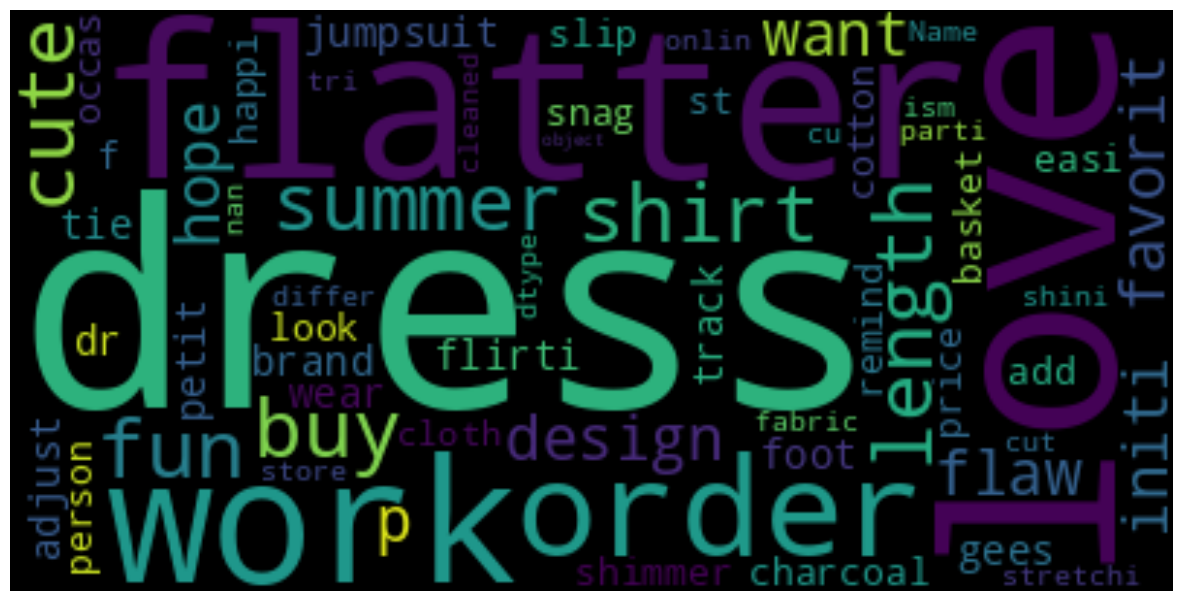

Danh sách các từ:
dress      11348
love       11165
size        9414
look        8091
color       6613
fit         6010
ism         4994
order       4292
beauti      4009
wear        3781
buy         3609
comfort     3316
flatter     3211
cute        3096
run         3056
think       2907
get         2743
shirt       2738
work        2645
feel        2636
sweater     2559
littl       2534
tri         2519
bit         2418
fabric      2353
pretti      2299
materi      2254
length      2205
skirt       2094
go          1987
petit       1935
waist       1874
style       1857
review      1853
medium      1823
long        1797
cut         1788
store       1787
way         1783
fall        1754
larg        1732
design      1708
summer      1678
purchas     1661
qualiti     1660
want        1575
sleev       1431
return      1429
person      1318
well        1297


In [108]:
create_wordcloud(df_norm, 'cleaned', 50)

**Nhận Xét**

- Từ Liên Quan Đến Sản Phẩm: Các từ như "dress", "size", "fit", "color", "fabric" xuất hiện nhiều, cho thấy sự quan tâm của khách hàng đối với các yếu tố liên quan đến sản phẩm như kiểu dáng, kích thước, màu sắc và chất liệu.
- Từ Liên Quan Đến Trải Nghiệm: Các từ như "comfort", "wear", "feel" cũng được đề cập, ngụ ý rằng khách hàng quan tâm đến trải nghiệm khi sử dụng sản phẩm, bao gồm sự thoải mái, cảm giác khi mặc và sự hài lòng với sản phẩm.
- Từ Liên Quan Đến Phản Hồi và Đánh Giá: Các từ như "review", "return", "recommend" xuất hiện, cho thấy sự quan trọng của phản hồi và đánh giá từ phía khách hàng đối với doanh nghiệp.
- Từ Liên Quan Đến Mục Đích Sử Dụng: Các từ như "work", "summer" cũng được đề cập, ngụ ý rằng khách hàng quan tâm đến việc sử dụng sản phẩm trong các mùa và tình huống cụ thể.

# Phần 5. Kết Luận Cuối Bài

*1. Phân tích và kết luận trên đã cung cấp cho doanh nghiệp một cái nhìn tổng quan về dữ liệu bán hàng và đánh giá của khách hàng, từ đó giúp họ hiểu rõ hơn về hành vi mua hàng và tương tác của khách hàng với các sản phẩm của họ. Dưới đây là một số tư vấn cụ thể mà doanh nghiệp có thể thực hiện dựa trên phân tích này:*

- Đánh giá chất lượng và phản hồi của sản phẩm: Dựa trên kết quả phân tích, chủ doanh nghiệp cần tiến hành một đánh giá chi tiết về các sản phẩm có ID vượt quá 730. Việc này có thể bao gồm kiểm tra chất lượng sản phẩm, xem xét các phản hồi từ khách hàng để xác định các vấn đề cụ thể và đưa ra giải pháp cải thiện. Ví dụ, nếu sản phẩm nhận được phản hồi tiêu cực về chất lượng, cần thực hiện kiểm tra chất lượng đầu vào và quy trình sản xuất để cải thiện chất lượng sản phẩm.

- Tối ưu hóa chiến lược quảng bá và khuyến mãi: Doanh nghiệp cần tập trung vào việc triển khai các chiến lược quảng bá và khuyến mãi cho các sản phẩm có ID nhỏ hơn 730 để thu hút khách hàng mới và tăng doanh số bán hàng. Cụ thể, họ có thể sử dụng dữ liệu phản hồi tích cực từ khách hàng để tạo ra các chiến lược quảng cáo hiệu quả và các chương trình khuyến mãi có thể thu hút sự chú ý từ đối tượng khách hàng mục tiêu.

- Quản lý tồn kho một cách hiệu quả: Dựa trên thông tin về số lượng và phản hồi của sản phẩm, doanh nghiệp cần xem xét việc quản lý tồn kho một cách cẩn thận. Họ cần tối ưu hóa quy trình nhập hàng và kiểm soát lượng tồn kho của các sản phẩm dựa trên dữ liệu phản hồi và xu hướng mua hàng từ khách hàng.

- Mở rộng danh mục sản phẩm: Dựa trên các phản hồi tích cực từ khách hàng, doanh nghiệp có thể cân nhắc việc nhập hàng các sản phẩm mới và đa dạng hóa danh mục sản phẩm của họ. Điều này có thể giúp họ thu hút được một đối tượng khách hàng rộng lớn hơn và tăng cường sự đa dạng trong sản phẩm của mình.


*2. Phân tích về độ tuổi của khách hàng giúp doanh nghiệp hiểu rõ hơn về đối tượng khách hàng của mình và từ đó có thể điều chỉnh chiến lược kinh doanh một cách hiệu quả. Dưới đây là một số tư vấn cụ thể dựa trên phân tích này:*

- Đa dạng hóa sản phẩm và dịch vụ: Dựa trên phân tích về độ tuổi của khách hàng, doanh nghiệp có thể tạo ra các sản phẩm và dịch vụ phù hợp với mọi nhóm tuổi. Ví dụ, nếu phát hiện rằng có một số lượng lớn khách hàng thuộc nhóm tuổi trung niên, họ có thể tập trung vào việc phát triển sản phẩm và dịch vụ đáp ứng nhu cầu và sở thích của nhóm này.

- Tùy chỉnh chiến lược tiếp thị: Doanh nghiệp có thể tạo ra các chiến lược tiếp thị linh hoạt và đa dạng để tiếp cận và tương tác với mọi nhóm tuổi khách hàng. Ví dụ, họ có thể sử dụng các kênh truyền thông xã hội khác nhau hoặc các chiến dịch quảng cáo địa phương để tiếp cận các nhóm tuổi khác nhau.

- Nghiên cứu thêm về đặc điểm của các nhóm tuổi: Doanh nghiệp có thể thực hiện nghiên cứu thêm về các nhóm tuổi khác nhau để hiểu rõ hơn về nhu cầu và mong muốn của họ. Dựa trên thông tin này, họ có thể tối ưu hóa sản phẩm và dịch vụ cũng như chiến lược tiếp thị.

- Phát triển sản phẩm và dịch vụ dựa trên thông tin phản hồi từ khách hàng: Sử dụng thông tin phản hồi từ khách hàng để cải thiện và phát triển các sản phẩm và dịch vụ. Ví dụ, nếu nhận được phản hồi tích cực từ một nhóm tuổi cụ thể, doanh nghiệp có thể tạo ra các phiên bản sản phẩm mới hoặc cải thiện dịch vụ để đáp ứng nhu cầu của họ.

- Tóm lại, phân tích độ tuổi của khách hàng cung cấp thông tin quan trọng giúp doanh nghiệp hiểu rõ hơn về thị trường của mình và có thể điều chỉnh chiến lược kinh doanh một cách linh hoạt và hiệu quả.


*3. Phân tích về điểm số đánh giá từ khách hàng là một công cụ quan trọng giúp doanh nghiệp hiểu được cách mà sản phẩm của họ được đánh giá và tiếp nhận bởi thị trường. Dựa trên những nhận xét và kết luận từ phân tích này, doanh nghiệp có thể thực hiện các hành động cụ thể như sau:*

- Tiếp tục duy trì chất lượng sản phẩm: Doanh nghiệp nên tiếp tục đầu tư vào nâng cao chất lượng sản phẩm để duy trì mức độ hài lòng cao từ phía khách hàng. Dữ liệu đã chỉ ra rằng đa số các mẫu đều nhận được điểm số cao, vì vậy việc duy trì chất lượng sản phẩm là yếu tố chính để giữ vững sự thành công.

- Tăng cường thu thập ý kiến từ khách hàng: Mặc dù điểm số trung bình cao, nhưng việc tiếp tục thu thập ý kiến phản hồi từ khách hàng là rất quan trọng. Doanh nghiệp có thể sử dụng các công cụ như khảo sát, ý kiến phản hồi trực tiếp từ khách hàng để hiểu rõ hơn về nhu cầu và mong muốn của họ.

- Chú trọng vào việc xây dựng thương hiệu và danh tiếng: Được đánh giá cao có thể giúp doanh nghiệp xây dựng một thương hiệu mạnh mẽ và danh tiếng tích cực. Họ có thể sử dụng dữ liệu điểm số đánh giá từ khách hàng để tạo ra các chiến lược xây dựng thương hiệu hiệu quả.

- Phát triển chiến lược tiếp thị dựa trên phản hồi từ khách hàng: Doanh nghiệp có thể sử dụng dữ liệu điểm số đánh giá từ khách hàng để phát triển chiến lược tiếp thị hiệu quả. Ví dụ, họ có thể sử dụng những đánh giá tích cực như một phần của chiến lược quảng cáo để tăng cường hình ảnh và uy tín của họ trên thị trường.

- Tóm lại, phân tích về điểm số đánh giá từ khách hàng không chỉ cung cấp thông tin về hiệu suất sản phẩm mà còn giúp doanh nghiệp hiểu rõ hơn về nhu cầu của khách hàng và cách tối ưu hóa chiến lược kinh doanh của mình để đạt được sự thành công trên thị trường.




*4. Phân tích về mức độ đề xuất sản phẩm từ phía người dùng là một tài nguyên quý giá giúp doanh nghiệp hiểu được cảm nhận và hành vi của khách hàng đối với sản phẩm của họ. Dựa trên nhận xét và kết luận từ phân tích này, doanh nghiệp có thể thực hiện các hành động cụ thể như sau:*

- Tối ưu hóa sản phẩm và dịch vụ: Sự ủng hộ và khuyến nghị từ người dùng đối với sản phẩm là một tín hiệu tích cực, đồng nghĩa với việc sản phẩm đang đáp ứng được nhu cầu của khách hàng. Doanh nghiệp có thể tiếp tục tối ưu hóa sản phẩm và dịch vụ để duy trì và nâng cao sự hài lòng của khách hàng, đồng thời tăng cường mối quan hệ và lòng trung thành của họ.

- Tận dụng phản hồi tích cực từ khách hàng: Việc sử dụng những đánh giá và phản hồi tích cực từ khách hàng để cải thiện chiến lược tiếp thị và phát triển sản phẩm là rất quan trọng. Doanh nghiệp có thể sử dụng thông tin này để điều chỉnh và tối ưu hóa chiến lược kinh doanh của mình, từ đó tạo ra một trải nghiệm tốt hơn cho khách hàng.

- Xây dựng một cộng đồng hỗ trợ: Khuyến khích sự tương tác và chia sẻ từ phía cộng đồng người dùng để tạo ra một môi trường hỗ trợ và thúc đẩy sự phát triển của thương hiệu. Điều này có thể được thực hiện thông qua việc xây dựng cộng đồng trực tuyến, sử dụng các nền tảng mạng xã hội và diễn đàn để khuyến khích người dùng thảo luận và chia sẻ kinh nghiệm của họ với sản phẩm.

- Giữ vững và mở rộng thị trường: Sự ủng hộ và khuyến nghị từ phía người dùng có thể giúp doanh nghiệp giữ vững và mở rộng thị trường của mình. Điều này có thể được thực hiện thông qua việc sử dụng phản hồi tích cực để xây dựng và tăng cường hình ảnh và uy tín của thương hiệu trên thị trường.

- Tóm lại, phân tích về mức độ đề xuất sản phẩm từ phía người dùng cung cấp thông tin quý giá giúp doanh nghiệp hiểu rõ hơn về lòng trung thành của khách hàng và cách tối ưu hóa chiến lược kinh doanh của mình để đạt được sự thành công trên thị trường.



*5. Phân tích về số lượng feedback tích cực từ khách hàng cung cấp thông tin quan trọng về mức độ hài lòng và sự đánh giá của họ về sản phẩm của doanh nghiệp. Dựa trên nhận xét và kết luận từ phân tích này, doanh nghiệp có thể thực hiện các hành động cụ thể như sau:*

- Tăng cường thu thập phản hồi từ khách hàng: Cần tạo ra các kênh thuận lợi để khách hàng có thể dễ dàng đưa ra phản hồi và đánh giá về sản phẩm. Việc thu thập phản hồi đa dạng và chi tiết sẽ cung cấp thông tin quý giá để doanh nghiệp hiểu rõ hơn về những yếu điểm cần cải thiện và những điểm mạnh cần tôn trọng.

- Tối ưu hóa sản phẩm và dịch vụ: Dựa trên phản hồi từ khách hàng, doanh nghiệp có thể tinh chỉnh và cải thiện sản phẩm và dịch vụ của mình để đáp ứng được mong đợi và yêu cầu của khách hàng. Việc này sẽ giúp tăng cường trải nghiệm của khách hàng và xây dựng lòng trung thành từ họ.

- Xử lý các trường hợp ngoại lệ một cách cẩn thận: Đối với các trường hợp có số lượng feedback tích cực rất cao, cần phân tích kỹ lưỡng để hiểu nguyên nhân và xác định liệu có phải là kết quả của các chiến lược tiếp thị hoặc sản phẩm chất lượng cao hay không. Việc xử lý các trường hợp ngoại lệ một cách cẩn thận sẽ giúp doanh nghiệp tối ưu hóa hiệu quả tiếp thị và quản lý phản hồi từ khách hàng.

- Tối ưu hóa chiến lược tiếp thị dựa trên phản hồi khách hàng: Sử dụng phản hồi từ khách hàng để tinh chỉnh và tối ưu hóa chiến lược tiếp thị, từ việc phát triển nội dung marketing đến việc xây dựng các chiến dịch quảng cáo hiệu quả. Việc này sẽ giúp doanh nghiệp tiếp cận và tương tác với khách hàng một cách chính xác và hiệu quả.

- Tóm lại, phân tích về số lượng feedback tích cực từ khách hàng cung cấp thông tin quý giá giúp doanh nghiệp hiểu rõ hơn về nhu cầu và mong muốn của khách hàng, từ đó tối ưu hóa sản phẩm, dịch vụ và chiến lược tiếp thị để tăng cường sự hài lòng và trung thành của khách hàng.


*6. Phân tích về phân bố của "Division Name" cung cấp thông tin quan trọng giúp doanh nghiệp hiểu rõ hơn về sự phân chia sản phẩm của mình và tương tác với thị trường. Dựa trên nhận xét và kết luận từ phân tích này, doanh nghiệp có thể thực hiện các hành động cụ thể như sau:*

- Tùy chỉnh chiến lược tiếp thị: Dựa trên tỷ lệ phân bố của "Division Name", doanh nghiệp có thể tùy chỉnh chiến lược tiếp thị của mình để đảm bảo sự nhận biết và tiếp cận từ đông đảo khách hàng. Ví dụ, nếu "General" và "General Petite" chiếm tỉ lệ cao nhất, doanh nghiệp có thể tập trung vào các chiến dịch tiếp thị phổ biến hơn để thu hút sự chú ý của một lượng lớn khách hàng.

- Tối ưu hóa sản phẩm và dịch vụ: Dựa trên phân loại "Division Name", doanh nghiệp có thể đa dạng hóa sản phẩm và dịch vụ để phù hợp với sở thích và nhu cầu của từng nhóm khách hàng. Ví dụ, nếu "Initmates" có tỉ lệ thấp hơn, doanh nghiệp có thể tập trung vào phát triển và quảng bá các sản phẩm trong phân khúc này để tăng cường doanh số.

- Nghiên cứu thêm về yêu cầu và sở thích của từng nhóm: Để tối ưu hóa chiến lược kinh doanh, doanh nghiệp cần tiến hành nghiên cứu sâu hơn về yêu cầu và sở thích của từng nhóm khách hàng trong mỗi phân loại "Division Name". Điều này giúp doanh nghiệp đáp ứng nhu cầu cụ thể của từng nhóm mục tiêu một cách hiệu quả.

- Tăng cường phản hồi từ khách hàng: Doanh nghiệp cũng có thể tăng cường phản hồi từ khách hàng để hiểu rõ hơn về cảm nhận và mong muốn của họ đối với các sản phẩm và dịch vụ trong từng phân loại "Division Name". Việc này giúp doanh nghiệp điều chỉnh và cải thiện sản phẩm và dịch vụ để tối ưu hóa trải nghiệm của khách hàng.

- Tóm lại, phân tích về phân bố của "Division Name" giúp doanh nghiệp định hình và điều chỉnh chiến lược kinh doanh một cách hiệu quả, từ đó tối ưu hóa doanh số bán hàng và tăng cường sự hài lòng của khách hàng.



*7. Phân tích về phân bố sản phẩm trong các phòng ban ("Department Name") cung cấp thông tin quan trọng giúp doanh nghiệp hiểu rõ hơn về sự đa dạng và phân chia sản phẩm của mình. Dựa trên nhận xét và kết luận từ phân tích này, doanh nghiệp có thể thực hiện các hành động cụ thể như sau:*

- Chú trọng vào các phân loại sản phẩm phổ biến nhất: Với "Tops" và "Dresses" chiếm tỉ lệ cao nhất, doanh nghiệp có thể chú trọng vào phát triển và quảng bá các sản phẩm trong các phân loại này. Công ty có thể tăng cường tổ chức các chiến dịch tiếp thị và quảng cáo để thu hút sự chú ý từ một lượng lớn khách hàng.

- Đa dạng hóa sản phẩm trong từng phòng ban: Để thu hút một đối tượng khách hàng rộng lớn, doanh nghiệp nên đa dạng hóa sản phẩm trong từng phòng ban. Việc này giúp đáp ứng nhu cầu và sở thích đa dạng của khách hàng, từ đó tối ưu hóa doanh số bán hàng và tăng cường doanh thu.

- Tập trung vào phát triển các phân khúc tiềm năng: Mặc dù tỉ lệ của "Intimate" và "Jackets" không cao bằng nhưng có tiềm năng phát triển, doanh nghiệp nên tập trung vào phát triển sản phẩm trong các phân khúc này. Việc nghiên cứu và đáp ứng nhu cầu và xu hướng của khách hàng trong các phân khúc này có thể mang lại lợi ích lớn đối với doanh nghiệp.

- Tối ưu hóa chiến lược tiếp thị dựa trên phân loại sản phẩm: Doanh nghiệp có thể tối ưu hóa chiến lược tiếp thị dựa trên phân loại sản phẩm, từ việc tạo ra nội dung tiếp thị đa dạng đến việc chọn kênh tiếp cận khách hàng phù hợp với từng loại sản phẩm. Điều này giúp tăng cường hiệu quả của chiến lược tiếp thị và thu hút được nhiều khách hàng tiềm năng hơn.

- Tóm lại, phân tích về phân bố sản phẩm trong các phòng ban ("Department Name") giúp doanh nghiệp tối ưu hóa chiến lược kinh doanh và tiếp thị, từ đó tăng cường doanh số bán hàng và nâng cao sự hài lòng của khách hàng.



*8. Phân tích về phân bố sản phẩm theo "Class Name" cung cấp thông tin quan trọng giúp doanh nghiệp hiểu rõ hơn về cấu trúc sản phẩm của mình và từ đó đưa ra các chiến lược phù hợp. Dựa trên nhận xét và kết luận từ phân tích này, doanh nghiệp có thể thực hiện các hành động cụ thể như sau:*

- Tập trung vào các lớp sản phẩm phổ biến: Do lớp sản phẩm như Dresses, Knits, và Blouses chiếm tỉ lệ cao trong phân bố, doanh nghiệp có thể tập trung vào phát triển và quảng bá các sản phẩm trong các lớp này. Điều này giúp tối ưu hóa doanh số bán hàng và thu hút sự chú ý từ một lượng lớn khách hàng.

- Nghiên cứu và phát triển các lớp sản phẩm ít phổ biến hơn: Mặc dù các lớp sản phẩm như Legwear, Intimates, và Layering có tỉ lệ thấp hơn, nhưng việc nghiên cứu và phát triển các sản phẩm trong các lớp này cũng mang lại cơ hội tiềm năng cho doanh nghiệp. Có thể mở rộng dòng sản phẩm trong các lớp này để tăng cường sự đa dạng và đáp ứng nhu cầu của khách hàng.

- Tối ưu hóa chiến lược tiếp thị dựa trên các lớp sản phẩm: Doanh nghiệp có thể tối ưu hóa chiến lược tiếp thị dựa trên các lớp sản phẩm, từ việc tạo ra nội dung tiếp thị đa dạng đến việc chọn kênh tiếp cận khách hàng phù hợp với từng loại sản phẩm. Điều này giúp tăng cường hiệu quả của chiến lược tiếp thị và thu hút được nhiều khách hàng tiềm năng hơn.

- Quản lý hàng tồn kho và dự đoán nhu cầu: Hiểu rõ phân bố của "Class Name" cũng giúp doanh nghiệp quản lý hàng tồn kho và dự đoán nhu cầu của khách hàng. Điều này giúp giảm thiểu lượng hàng tồn kho không cần thiết và tối ưu hóa việc cung cấp hàng hóa, từ đó tối ưu hóa quá trình sản xuất và tiết kiệm chi phí.

- Tóm lại, phân tích về phân bố sản phẩm theo "Class Name" giúp doanh nghiệp tối ưu hóa chiến lược kinh doanh và tiếp thị, từ đó tăng cường doanh số bán hàng và nâng cao sự hài lòng của khách hàng.




*9. Phân tích cảm xúc người dùng cung cấp cho doanh nghiệp một cái nhìn tổng quan về tình hình phản hồi từ khách hàng và một số hướng dẫn cụ thể để cải thiện trải nghiệm của khách hàng và tăng cường sự hài lòng của họ. Dựa trên những phân tích này, doanh nghiệp có thể thực hiện các hành động sau:*

- Tập trung vào cải thiện trải nghiệm của khách hàng không hài lòng: Với số lượng phản hồi tiêu cực từ nhóm không khuyến nghị cao hơn, doanh nghiệp cần tập trung vào cải thiện trải nghiệm của nhóm này để giảm số lượng phản hồi tiêu cực và tăng sự hài lòng.

- Dùng phản hồi tích cực để duy trì và nâng cao chất lượng dịch vụ: Doanh nghiệp cần duy trì và nâng cao chất lượng dịch vụ để duy trì sự hài lòng của khách hàng khuyến nghị và tăng cường sự ủng hộ từ nhóm này.

- Theo dõi và xử lý các phản hồi tiêu cực một cách kịp thời: Cần tiếp tục theo dõi và xử lý các phản hồi tiêu cực một cách kịp thời để cải thiện trải nghiệm của khách hàng và giảm thiểu số lượng phản hồi tiêu cực trong tương lai.

- Phân tích các sản phẩm được đánh giá tích cực cao: Cần tiếp tục theo dõi và phân tích các sản phẩm được đánh giá tích cực cao để hiểu rõ hơn về những yếu tố nào làm cho chúng phổ biến và được yêu thích bởi khách hàng. Dựa trên thông tin này, doanh nghiệp có thể xem xét việc tăng cường sản xuất hoặc cung cấp các sản phẩm này để đáp ứng nhu cầu của thị trường và tăng doanh số bán hàng.

- Đánh giá và phân tích các sản phẩm có lượt Polarity trung bình cao và thấp: Cần đánh giá và phân tích các sản phẩm có lượt Polarity trung bình cao và thấp để hiểu rõ hơn về sự phản hồi từ khách hàng và đưa ra các biện pháp cải thiện hoặc tối ưu hóa sản phẩm.

- Tóm lại, phân tích này cung cấp cho doanh nghiệp những hướng dẫn cụ thể để cải thiện trải nghiệm của khách hàng, tăng cường sự hài lòng và tăng doanh số bán hàng thông qua việc duy trì và nâng cao chất lượng dịch vụ, xử lý các phản hồi tiêu cực một cách kịp thời và tối ưu hóa sản phẩm dựa trên sự phản hồi từ khách hàng.



*10. Phân tích ngram về các từ phổ biến trong phản hồi khách hàng cung cấp cái nhìn sâu sắc về các yếu tố quan trọng đối với sự hài lòng của khách hàng và chất lượng sản phẩm. Dựa trên kết quả phân tích này, doanh nghiệp có thể thực hiện các hành động sau:*

- Tối ưu hóa thiết kế và chất lượng sản phẩm: Với sự quan tâm đến các từ như "fabric", "quality", "design", và "material", doanh nghiệp có thể tập trung vào cải thiện thiết kế và chất lượng của sản phẩm để đáp ứng mong đợi của khách hàng.

- Tập trung vào việc cải thiện trải nghiệm mua sắm và dịch vụ: Các từ như "order", "store", và "return" chỉ ra rằng khách hàng quan tâm đến trải nghiệm mua sắm và dịch vụ của doanh nghiệp. Doanh nghiệp có thể tối ưu hóa các quy trình đặt hàng, chính sách đổi trả và trải nghiệm mua sắm để tăng sự hài lòng của khách hàng.

- Theo dõi và tận dụng phản hồi tích cực: Các cụm từ như "love dress" và "highly recommend" là dấu hiệu của sự hài lòng và đề xuất tích cực từ khách hàng. Doanh nghiệp có thể sử dụng những phản hồi này để tạo ra chiến lược tiếp thị hiệu quả và tăng cường sự tin cậy của thương hiệu.

- Quản lý kích thước và vừa vặn sản phẩm: Với sự quan tâm đến các từ như "size", "fit", và "petit", doanh nghiệp cần đảm bảo rằng sản phẩm được cung cấp phù hợp với kích thước và vừa vặn với mọi khách hàng.

- Tìm hiểu về xu hướng và yêu cầu của khách hàng: Phân tích các cụm từ như "get lot compliments" và "love way look" giúp doanh nghiệp hiểu rõ hơn về những yếu tố nào khiến cho sản phẩm được yêu thích và được đánh giá cao bởi khách hàng, từ đó tạo ra các sản phẩm mới phù hợp với nhu cầu thị trường.

- Tóm lại, phân tích ngram cung cấp cho doanh nghiệp thông tin quý báu về ý kiến và mong muốn của khách hàng, từ đó giúp doanh nghiệp tối ưu hóa sản phẩm, dịch vụ và chiến lược tiếp thị để tăng cường sự hài lòng và mức độ tin cậy của thương hiệu.



*11. Phân tích wordcloud cung cấp cái nhìn tổng quan về các từ quan trọng và phổ biến trong phản hồi của khách hàng, từ đó giúp doanh nghiệp hiểu rõ hơn về mong đợi và nhu cầu của khách hàng. Dựa trên kết quả phân tích này, doanh nghiệp có thể thực hiện các hành động sau:*

- Tối ưu hóa sản phẩm: Các từ như "size", "fit", "color", "fabric", "comfort", "wear" chỉ ra rằng khách hàng quan tâm đến các yếu tố liên quan đến sản phẩm, bao gồm kích thước, kiểu dáng, màu sắc và chất liệu. Doanh nghiệp có thể sử dụng thông tin này để cải thiện và tối ưu hóa sản phẩm để đáp ứng mong đợi của khách hàng.

- Tăng cường trải nghiệm người dùng: Các từ như "comfort", "wear", "feel" chỉ ra rằng trải nghiệm khi sử dụng sản phẩm là một yếu tố quan trọng đối với khách hàng. Doanh nghiệp có thể tập trung vào cải thiện trải nghiệm người dùng, bao gồm sự thoải mái khi sử dụng sản phẩm và cảm giác khi mặc.

- Quản lý phản hồi và đánh giá: Các từ như "review", "return", "recommend" chỉ ra rằng phản hồi và đánh giá từ phía khách hàng đóng vai trò quan trọng đối với doanh nghiệp. Doanh nghiệp có thể tận dụng phản hồi để cải thiện sản phẩm và dịch vụ của mình, đồng thời tạo ra các chính sách đổi trả linh hoạt để tăng cường sự hài lòng của khách hàng.

- Hiểu rõ mục đích sử dụng: Các từ như "work", "summer" cho thấy khách hàng quan tâm đến việc sử dụng sản phẩm trong các mùa và tình huống cụ thể. Doanh nghiệp có thể tạo ra các sản phẩm phù hợp với nhu cầu và mục đích sử dụng của khách hàng trong các tình huống khác nhau.

- Tóm lại, phân tích wordcloud cung cấp thông tin quan trọng về các yếu tố quan trọng đối với sự hài lòng của khách hàng và chất lượng sản phẩm. Doanh nghiệp có thể sử dụng thông tin này để cải thiện sản phẩm, tăng cường trải nghiệm người dùng và quản lý phản hồi khách hàng một cách hiệu quả.